<h1><center><font size=10 color="green">Project 3 - Personal Loan Campaign</center></font></h1>
<h1><center>Nilesh Kulkarni</center></h1>

# 1. Given Problem Statement


<h1><b><font size=3>Context</font></b></h1>

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.


<h1><b><font size=3>Objective</font></b></h1>

To predict whether a liability customer will buy a personal loan or not.
Which variables are most significant.
Which segment of customers should be targeted more.

<h1><b><font size=3>Data Dictionary</font></b></h1>

* ID: Customer ID
* Age: Customer’s age in completed years
* Experience: #years of professional experience
* Income: Annual income of the customer (in thousand dollars)
* ZIP Code: Home Address ZIP code.
* Family: the Family size of the customer
* CCAvg: Average spending on credit cards per month (in thousand dollars)
* Education: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* Mortgage: Value of house mortgage if any. (in thousand dollars)
* Personal_Loan: Did this customer accept the personal loan offered in the last campaign?
* Securities_Account: Does the customer have securities account with the bank?
* CD_Account: Does the customer have a certificate of deposit (CD) account with the bank?
* Online: Do customers use internet banking facilities?
* CreditCard: Does the customer use a credit card issued by any other Bank (excluding All life Bank)?

# 2. Frame Problem

Problem statement for the Data Scientist is to understand characteristics of the customer and factors that influence customers to avail personal loan from the Bank.

Towards that, the expectation is to create a Machine Learning Model that predicts whether customer will avail personal loan or not (Yes or No). Based on the model and its independent features, business can be advised on the target customers as well as parameters to leverage to pitch personal loans to customers.

Dependent Feature in this case is - Personal_Loan, that can take value of 0 (Customer will NOT avail loan) or 1 (Customer will avail loan). 

As its a categorical feature that can take 2 values, this is a <b><font color="blue">Binary Classification problem</b></font>. 

We will use below approach -
1. <b><font color="blue">Logistic Regression</b></font> - Create Logistic Regression models, evaluate them on the chosen metric and choose the best model.

2. <b><font color="blue">Decision Tree (CART)</b></font> Create Decision Tree models using various ways, evaluate them on the chosen metric and choose the best model.

3. Choose the best model out of the 2 models

4. Visualize and interpret the model

5. Create Final model with only required features

6. Recommendations


# 3. Identify Model Evaluation Metrics


Bank wants to 'convert' as many customers to avail loan as possible, by identifying and targeting potential customers who have a higher probability of purchasing the loan.

For the Classification confusion matrix, there are 2 types of errors possible - 

Type I - False Positives. Model predicts that customer will avail Personal Loan (Personal_Loan = 1), but customer actually does not. This will waste Bank's resources in marketing activities (reaching out the customer, sending mail etc.). As mentioned in the problem statement, bank wants to do targted marketing to to potential customers with high probability of converting into loan customer. Hence, minimizing false positives is important.

Type II - False Negatives. Model predicts that customer will NOT avail personal loan, but customer actually does. This will be a potential opportunity loss. Obviously, bank wants to minimize this opportunity loss as well.

Possible metrics are -

Accuracy: Accuracy is calculated as the total number of two correct predictions (TP + TN) divided by the total number of a dataset (P + N).
      
      ACC = TP + TN / ( TP+TN+FP+FN)

Precision: Precision is calculated as the number of correct positive predictions (TP) divided by the total number of positive predictions (TP + FP).
      
      PREC = TP / (TP + FP)

Recall: Recall or Sensitivity or True Positive Rate (TPR)  is calculated as the number of correct positive predictions (TP) divided by the total number of positives (P).
      
      Recall = TP / (TP + FN)

F1-Score: Harmonic mean of precision and recall. It takes both false positive and false negatives into account. F1 score gives the same weightage to recall and precision. Therefore, it performs well on an imbalanced dataset.
      
      F1 = 2 * (PREC * RECALL) / (PREC + RECALL)

<b><font color="blue">Primary Metric(F1-Score)</b></font> - We will want to minimize both the errors, to strike a balance between Recall and Precision. Hence we will use F1-Score as our secondary metric. Better F1-Score will ensure that both False Positives as well as False Negatives are minimized. 

Other Metrics - For reference, we will still report Accuracy, Recall and Precsion as well.

# 4. Reusable Custom Functions

In [1]:
# Function to create confusion matrix for TEST
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [2]:
# Function to calculate recall score
def get_recall_score(model):
    '''
    model : classifier to predict values of X

    '''
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    print("Recall on TRAIN set : ",metrics.recall_score(y_train,pred_train))
    print("Recall on TEST set : ",metrics.recall_score(y_test,pred_test))

In [3]:
# Function to calculate accuracy score
def get_accuracy_score(model):
    '''
    model : classifier to predict values of X

    '''
    #pred_train = model.predict(X_train)
    #pred_test = model.predict(X_test)
    print('Accuracy on TRAIN set:' , model.score(X_train, y_train))
    print('Accuracy on TEST set:' , model.score(X_test, y_test))

In [4]:
# Function to calculate f1 score
def get_f1_score(model):
    '''
    model : classifier to predict values of X

    '''
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    print("F1 on TRAIN set : ",metrics.f1_score(y_train,pred_train))
    print("F1 on TEST set : ",metrics.f1_score(y_test,pred_test))

In [5]:
##  Function to calculate precision score
def get_precision_score(model):
    '''
    model : classifier to predict values of X

    '''
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    print("Precision on TRAIN set : ",metrics.precision_score(y_train,pred_train))
    print("Precision on TEST set : ",metrics.precision_score(y_test,pred_test))

In [6]:
# defining a function to plot the confusion_matrix of a classification model built using sklearn
def confusion_matrix_sklearn_with_threshold(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix, based on the threshold specified, with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    pred_prob = model.predict_proba(predictors)[:, 1]
    pred_thres = pred_prob > threshold
    y_pred = np.round(pred_thres)

    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [7]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn

def model_performance_classification_sklearn_with_threshold(model, predictors, target, threshold=0.5):
    """
    Function to compute different metrics, based on the threshold specified, to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # predicting using the independent variables
    pred_prob = model.predict_proba(predictors)[:, 1]
    pred_thres = pred_prob > threshold
    pred = np.round(pred_thres)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf


# 5. Import Required libraries

In [8]:
# Import libraries, comment out ones that are not needed for this project

# this will help in making the Python code more structured automatically (good coding practice)
#%load_ext nb_black#

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd
import datetime as dt

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Command to tell Python to actually display the graphs
%matplotlib inline

# To split the data into train and test
from sklearn.model_selection import train_test_split

# To build linear regression_model
#from sklearn.linear_model import LinearRegression

# To check model performance for Linear Regression
#from sklearn.metrics import mean_squared_error , mean_absolute_error, r2_score

# For Feature Scaling
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# For boxcox
from scipy.stats import boxcox 
from sklearn.preprocessing import PowerTransformer

# To build Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To build Logistic Regression

from sklearn.linear_model import LogisticRegression

# For Decision Tree Hyperparameter Tuning, Pre-pruning
from sklearn.model_selection import GridSearchCV

# Import Metrics
from sklearn import metrics

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
    make_scorer
)

In [9]:
#prevent SettingWithCopyWarning message from appearing
# had to be used as Jupyter notebook execution showed warnings that are not seen in Google Colab

pd.options.mode.chained_assignment = None

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# Restrict the float value to 2 decimal places
pd.set_option('display.float_format', lambda x: '%.4f' % x)

# 6. Import Dataset

In [10]:
# Mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
# Import the dataset as-is
# Created a copy of the dataset so that original dataset is retained as-is for reference in case needed

#This line was used with Google Colab
df=pd.read_csv('/content/drive/My Drive/AI-ML/Module3_Classification/PROJECT-3/Loan_Modelling.csv')

df_orig_copy=df.copy()

In [12]:
 # Review sample 10 rows to confrm that data is loaded correctly 
df.sample(10, random_state=1)

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  \
2764  2765   31           5      84    91320       1 2.9000          3   
4767  4768   35           9      45    90639       3 0.9000          1   
3814  3815   34           9      35    94304       3 1.3000          1   
3499  3500   49          23     114    94550       1 0.3000          1   
2735  2736   36          12      70    92131       3 2.6000          2   
3922  3923   31           4      20    95616       4 1.5000          2   
2701  2702   50          26      55    94305       1 1.6000          2   
1179  1180   36          11      98    90291       3 1.2000          3   
932    933   51          27     112    94720       3 1.8000          2   
792    793   41          16      98    93117       1 4.0000          3   

      Mortgage  Personal_Loan  Securities_Account  CD_Account  Online  \
2764       105              0                   0           0       0   
4767       101              0                   1           0       0   
3814         0              0                   0           0       0   
3499       286              0                   0           0       1   
2735       165              0                   0           0       1   
3922         0              0                   0           0       1   
2701         0              0                   0           0       1   
1179         0              0                   1           0       0   
932          0              0                   1           1       1   
792          0              0                   0           0       0   

      CreditCard  
2764           1  
4767           0  
3814           0  
3499           0  
2735           0  
3922           0  
2701           0  
1179           1  
932            1  
792            1

In [13]:
# Review last 5 rows to confirm that data is loaded correctly
df.tail()

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  \
4995  4996   29           3      40    92697       1 1.9000          3   
4996  4997   30           4      15    92037       4 0.4000          1   
4997  4998   63          39      24    93023       2 0.3000          3   
4998  4999   65          40      49    90034       3 0.5000          2   
4999  5000   28           4      83    92612       3 0.8000          1   

      Mortgage  Personal_Loan  Securities_Account  CD_Account  Online  \
4995         0              0                   0           0       1   
4996        85              0                   0           0       1   
4997         0              0                   0           0       0   
4998         0              0                   0           0       1   
4999         0              0                   0           0       1   

      CreditCard  
4995           0  
4996           0  
4997           0  
4998           0  
4999           1

Dataset is imported successfully.

# 7. Perform Basic Data Checks

Basic data checks are done on the Total dataset. This is to check if any data manipulations can be done, without causing any data leakge. 

In [14]:
# Check shape of the data
print(" Rows:", df.shape[0], '\n', "Columns:" , df.shape[1])

 Rows: 5000 
 Columns: 14


In [15]:
# Check for duplicate rows

df.duplicated().sum()

0

In [16]:
# Check basic structure of the dataset

df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


Data types look ok on most part except - 
1. All features are numeric, so OneHotEncoding will not be required
2. ZIPCode can be converted into Category or Object type

In [17]:
# Check for missing values

df.isnull().sum().sort_values(ascending=False)

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

No Missing values! Thats great!!

In [18]:
df.describe(include='all')

ID       Age  Experience    Income    ZIPCode    Family  \
count 5000.0000 5000.0000   5000.0000 5000.0000  5000.0000 5000.0000   
mean  2500.5000   45.3384     20.1046   73.7742 93169.2570    2.3964   
std   1443.5200   11.4632     11.4680   46.0337  1759.4551    1.1477   
min      1.0000   23.0000     -3.0000    8.0000 90005.0000    1.0000   
25%   1250.7500   35.0000     10.0000   39.0000 91911.0000    1.0000   
50%   2500.5000   45.0000     20.0000   64.0000 93437.0000    2.0000   
75%   3750.2500   55.0000     30.0000   98.0000 94608.0000    3.0000   
max   5000.0000   67.0000     43.0000  224.0000 96651.0000    4.0000   

          CCAvg  Education  Mortgage  Personal_Loan  Securities_Account  \
count 5000.0000  5000.0000 5000.0000      5000.0000           5000.0000   
mean     1.9379     1.8810   56.4988         0.0960              0.1044   
std      1.7477     0.8399  101.7138         0.2946              0.3058   
min      0.0000     1.0000    0.0000         0.0000              0.0000   
25%      0.7000     1.0000    0.0000         0.0000              0.0000   
50%      1.5000     2.0000    0.0000         0.0000              0.0000   
75%      2.5000     3.0000  101.0000         0.0000              0.0000   
max     10.0000     3.0000  635.0000         1.0000              1.0000   

       CD_Account    Online  CreditCard  
count   5000.0000 5000.0000   5000.0000  
mean       0.0604    0.5968      0.2940  
std        0.2383    0.4906      0.4556  
min        0.0000    0.0000      0.0000  
25%        0.0000    0.0000      0.0000  
50%        0.0000    1.0000      0.0000  
75%        0.0000    1.0000      1.0000  
max        1.0000    1.0000      1.0000

In [19]:
# Remove features that certainly do not add value to the model training
# Remove Feature ID, Total Number of Features remaining will then be 13

df.drop('ID', axis=1, inplace=True)

In [20]:
# Check shape of the data AFTER dropping features and records that are not needed

print(" Total Dataset \n Rows:", df.shape[0], '\n', "Columns:" , df.shape[1])

 Total Dataset 
 Rows: 5000 
 Columns: 13


In [21]:
# Check Unique values for all columns

for column in df.columns:
    #print(df[i].value_counts(normalize=True))
     print(f'For {column}, there are {df[column].nunique()} values in the main dataset \n')
     print(f'For {column}, there are {df[column].unique()} values in the main dataset\n')
     print("-" * 50)

For Age, there are 45 values in the main dataset 

For Age, there are [25 45 39 35 37 53 50 34 65 29 48 59 67 60 38 42 46 55 56 57 44 36 43 40
 30 31 51 32 61 41 28 49 47 62 58 54 33 27 66 24 52 26 64 63 23] values in the main dataset

--------------------------------------------------
For Experience, there are 47 values in the main dataset 

For Experience, there are [ 1 19 15  9  8 13 27 24 10 39  5 23 32 41 30 14 18 21 28 31 11 16 20 35
  6 25  7 12 26 37 17  2 36 29  3 22 -1 34  0 38 40 33  4 -2 42 -3 43] values in the main dataset

--------------------------------------------------
For Income, there are 162 values in the main dataset 

For Income, there are [ 49  34  11 100  45  29  72  22  81 180 105 114  40 112 130 193  21  25
  63  62  43 152  83 158  48 119  35  41  18  50 121  71 141  80  84  60
 132 104  52 194   8 131 190  44 139  93 188  39 125  32  20 115  69  85
 135  12 133  19  82 109  42  78  51 113 118  64 161  94  15  74  30  38
   9  92  61  73  70 149  98 128  31 

In [22]:
# Check Unique values for discrete features, except for numeric continuous features like Age, Experience, CCAvg, Mortgage

Temp_Columns_List = ['ZIPCode', 'Family', 'Education', 'Personal_Loan', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard']
      
for column in Temp_Columns_List:
     print(df[column].value_counts())
     print("-" * 50)

94720    169
94305    127
95616    116
90095     71
93106     57
        ... 
96145      1
94087      1
91024      1
93077      1
94598      1
Name: ZIPCode, Length: 467, dtype: int64
--------------------------------------------------
1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64
--------------------------------------------------
1    2096
3    1501
2    1403
Name: Education, dtype: int64
--------------------------------------------------
0    4520
1     480
Name: Personal_Loan, dtype: int64
--------------------------------------------------
0    4478
1     522
Name: Securities_Account, dtype: int64
--------------------------------------------------
0    4698
1     302
Name: CD_Account, dtype: int64
--------------------------------------------------
1    2984
0    2016
Name: Online, dtype: int64
--------------------------------------------------
0    3530
1    1470
Name: CreditCard, dtype: int64
--------------------------------------------------


In [23]:
# Convert ZIPCode into object datatype

df['ZIPCode'] = df['ZIPCode'].astype('str')

In [24]:
# Confirm the datatype conversion

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   ZIPCode             5000 non-null   object 
 4   Family              5000 non-null   int64  
 5   CCAvg               5000 non-null   float64
 6   Education           5000 non-null   int64  
 7   Mortgage            5000 non-null   int64  
 8   Personal_Loan       5000 non-null   int64  
 9   Securities_Account  5000 non-null   int64  
 10  CD_Account          5000 non-null   int64  
 11  Online              5000 non-null   int64  
 12  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(11), object(1)
memory usage: 507.9+ KB


In [25]:
# Check top 10 ZIPCode values by counts

df['ZIPCode'].value_counts().head(10).index

#for records where Personal_Loan == 1
#df[df['Personal_Loan'] == 1]['ZIPCode'].value_counts().head(10).index

Index(['94720', '94305', '95616', '90095', '93106', '93943', '92037', '91320',
       '91711', '94025'],
      dtype='object')

In [26]:
# Function to update ZIPCode to 'Others' if its not in top 10 ZIPCode by counts

def update_zipcode(val):
    """Function to convert Mileage records from Km/Kg to kmpl."""
    if val not in ['94720', '94305', '95616', '90095', '93106', '93943', '92037', '91320','91711', '94025']:
      val ='Others'
    else:
      val
    return val

In [27]:
# Convert ZIPCode values to Others, except for Top 10 ZIPCode values

df['ZIPCode']=df['ZIPCode'].apply(lambda x: update_zipcode(x)) 

In [28]:
df['ZIPCode'].value_counts()

Others    4195
94720      169
94305      127
95616      116
90095       71
93106       57
93943       54
92037       54
91320       53
91711       52
94025       52
Name: ZIPCode, dtype: int64

Observations on the dataset

1. No missing values or duplicate rows, thats good!

2. Numeric discrete features are - 'ZIPCode', 'Family', 'Education', 'Personal_Loan', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard'

3. Numeric continuous features are - 'Age', 'Experience', 'Income', 'CCAvg',   'Mortgage'

4. Features
  
  * ID - Looks like Serial Number of the record, we will not need this
  * Age - Age ranges from 23 to 67, average age is about 45	
  * Experience - Minimum experience is -3, which is incorrect and will have to be treated. 
  * Income - Range is high, 8,000 to 224,000, 75% at 98,000. This probably is legit as age varies as well. But this will have outliers and may have to be looked into.
  * ZIPCode - As ZIPCode is an integer, statistical summary does not show meaningful information. 
  * Family - Nothing exceptional, size varies from 1 to 4
  * CCAvg - Average spending on credit cards per month seems to be high for some, max is $10,000
  * Education - Alerady OneHotEncoded feature, need to check value counts
  * Mortgage - Value of house mortgage. 50% do not have any mortgage! 
  * Personal_Loan - This is a Response Feature. Has values 0 or 1, need to check value counts
  * Securities_Account - Indicator feature, need to check value counts
  * CD_Account - Indicator feature, need to check value counts
  * Online - Indicator feature, need to check value counts
  * CreditCard - Indicator feature, need to check value counts

5. ZIPCode - Needed to be converted into 'object' feature. There were too many values (labels) as well. Except for top 10, all others are replaced with 'Others'. This waym when One Hot Encoded, we will not have too many features.

6. Experience - This has negative values, which is incorrect. We will treat these appropriately later.

# 8. Perform Exploratory Data Analysis (EDA)

Purpose of this analysis is find more details about individual features and its characteristics. 

Analysis includes - 
1. Checking the distribution and Univariate analysis
2. Multivariate analysis
3. Note observations / insights

## 8a. EDA - Univariate Analysis

Purpose of this analysis is find more details about individual feature and its characteristics

### 8a.1. Age

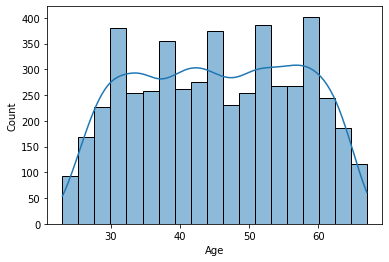

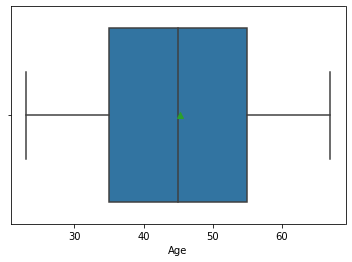

In [29]:
# Use histplots to see distribution for Age

sns.histplot(data=df,x='Age', kde=True)
plt.show()

sns.boxplot(data=df,x='Age', showmeans=True)
plt.show()

Observations for Age
1. Looks evenly distributed, no outliers

### 8a.2. Experience

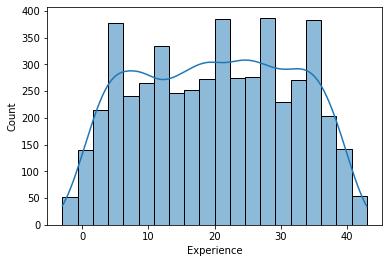

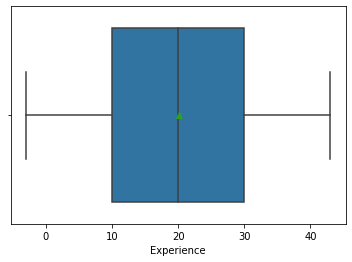

In [30]:
# Use histplots to see distribution for Age

sns.histplot(data=df,x='Experience', kde=True)
plt.show()

sns.boxplot(data=df,x='Experience', showmeans=True)
plt.show()

Observations for Experience

1. Looks evenly distributed, no outliers

### 8a.3. Income

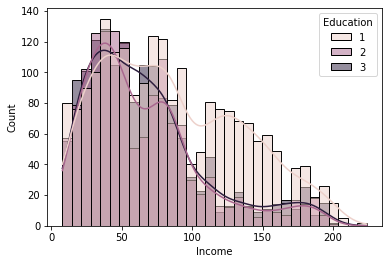

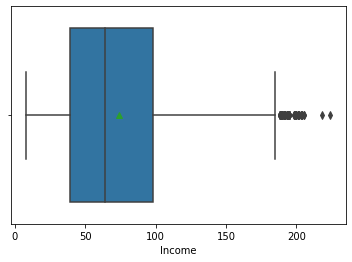

In [31]:
# Use histplots to see distribution for Mortgage

sns.histplot(data=df,x='Income', hue='Education',  kde=True)
plt.show()

sns.boxplot(data=df,x='Income', showmeans=True)
plt.show()

Observations for Income

1. Left skewed distribution, need to be checked if normalization or other scaling is needed / will benefit
2. Upper outliers exist, need to be checked more during outlier treatment
3. Surprisingly, upper level incomes are more for education level 1 (Undergrad), than other 2 which are supposedly more educated.

### 8a.4. ZIPCode

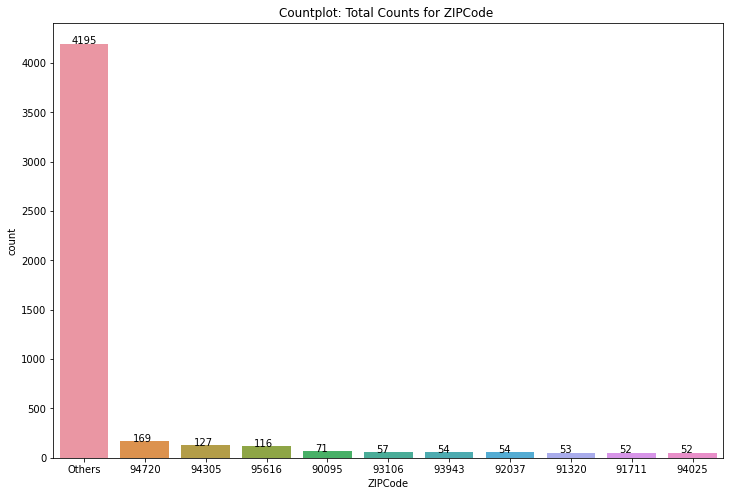

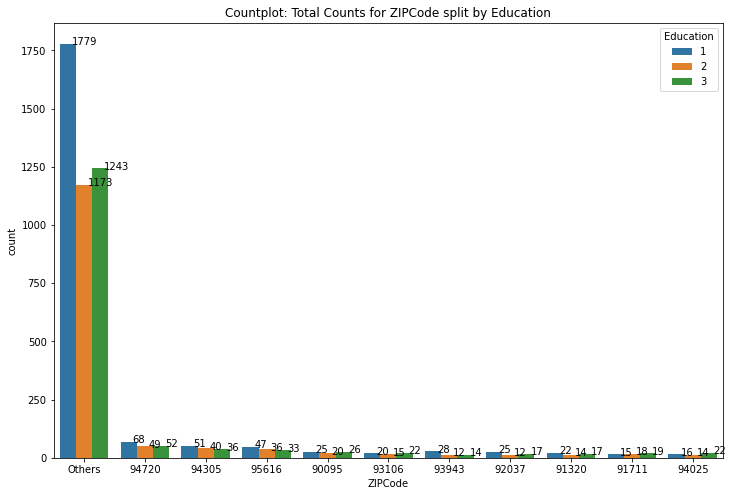

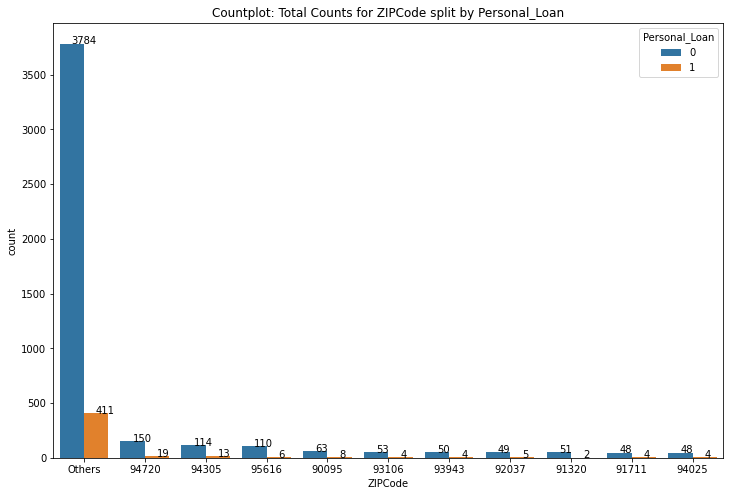

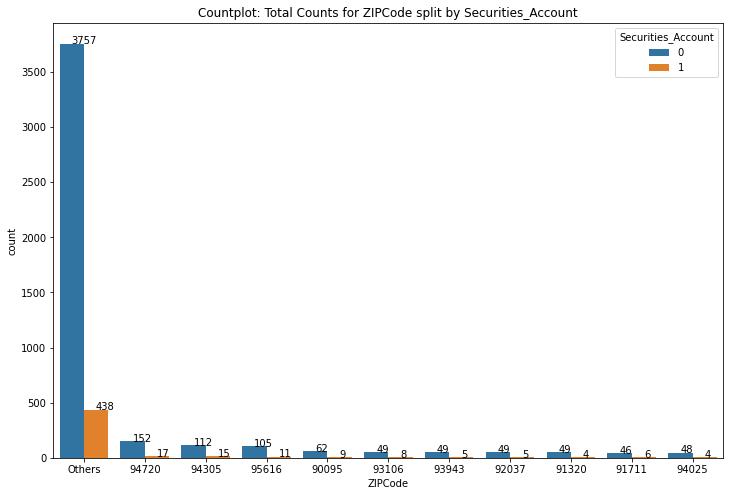

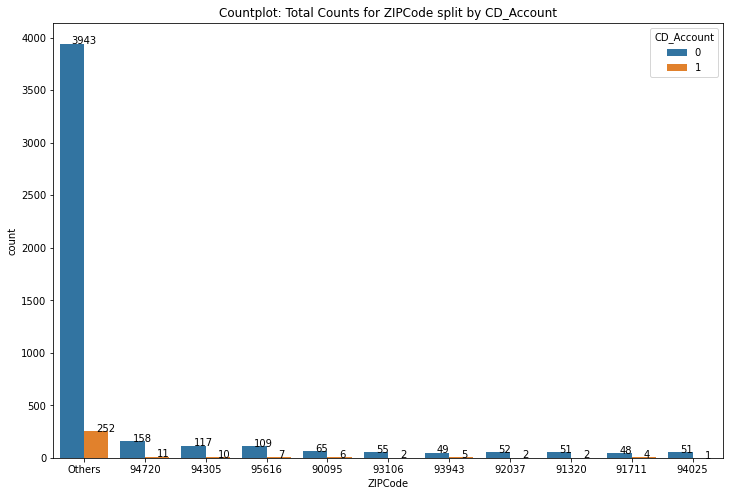

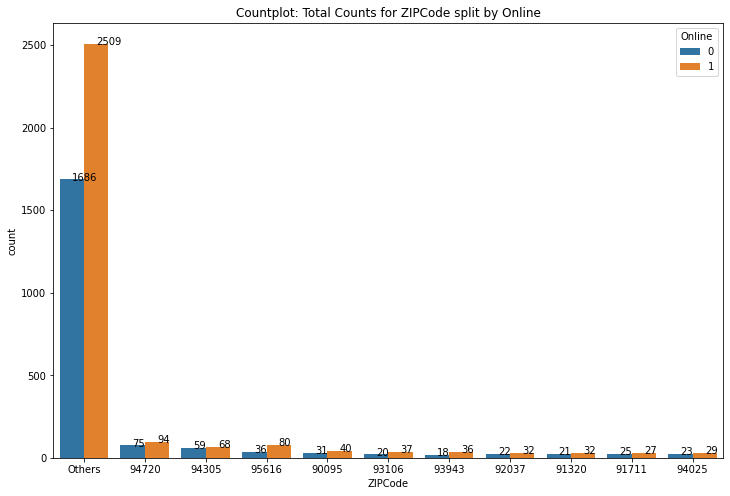

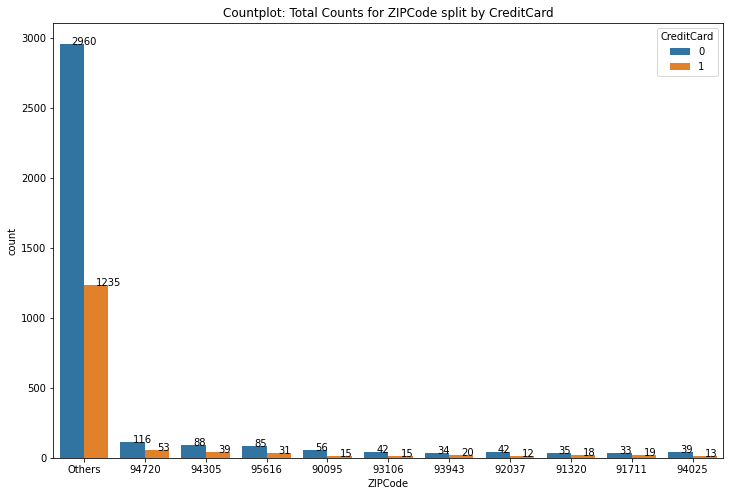

In [32]:
# Use Countplot to see the distribution of ZIPCode

Temp_v='ZIPCode'

plt.figure(figsize=(12,8))
plt.title(f'Countplot: Total Counts for {Temp_v} ')
plt.xlabel(Temp_v)
ax = sns.countplot(data=df,x=Temp_v, order=df[Temp_v].value_counts().index);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()-5))
plt.show()

plt.figure(figsize=(12,8))
plt.title(f'Countplot: Total Counts for {Temp_v} split by Education')
plt.xlabel(Temp_v)
ax = sns.countplot(data=df,x=Temp_v, hue='Education', order=df[Temp_v].value_counts().index);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()-5))
plt.show()

plt.figure(figsize=(12,8))
plt.title(f'Countplot: Total Counts for {Temp_v} split by Personal_Loan')
plt.xlabel(Temp_v)
ax = sns.countplot(data=df,x=Temp_v, hue='Personal_Loan', order=df[Temp_v].value_counts().index);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()-5))
plt.show()

plt.figure(figsize=(12,8))
plt.title(f'Countplot: Total Counts for {Temp_v} split by Securities_Account')
plt.xlabel(Temp_v)
ax = sns.countplot(data=df,x=Temp_v, hue = 'Securities_Account', order=df[Temp_v].value_counts().index);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()-5))
plt.show()

plt.figure(figsize=(12,8))
plt.title(f'Countplot: Total Counts for {Temp_v} split by CD_Account')
plt.xlabel(Temp_v)
ax = sns.countplot(data=df,x=Temp_v, hue = 'CD_Account', order=df[Temp_v].value_counts().index);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()-5))
plt.show()

plt.figure(figsize=(12,8))
plt.title(f'Countplot: Total Counts for {Temp_v} split by Online')
plt.xlabel(Temp_v)
ax = sns.countplot(data=df,x=Temp_v, hue = 'Online', order=df[Temp_v].value_counts().index);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()-5))
plt.show()

plt.figure(figsize=(12,8))
plt.title(f'Countplot: Total Counts for {Temp_v} split by CreditCard')
plt.xlabel(Temp_v)
ax = sns.countplot(data=df,x=Temp_v, hue = 'CreditCard', order=df[Temp_v].value_counts().index);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()-5))
plt.show()


Observations for ZIPCode

1. 467 different ZIPCode values are present.
2. After creating a new label 'Others', that has the highest number of records.
3. When looked at splitting by CreditCard, Online, CD_Account etc., pattern is the same for all zip codes.

### 8a.5. Family

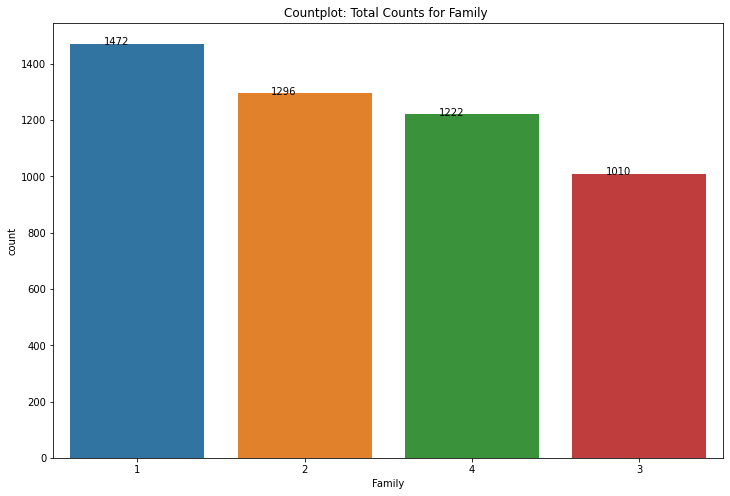

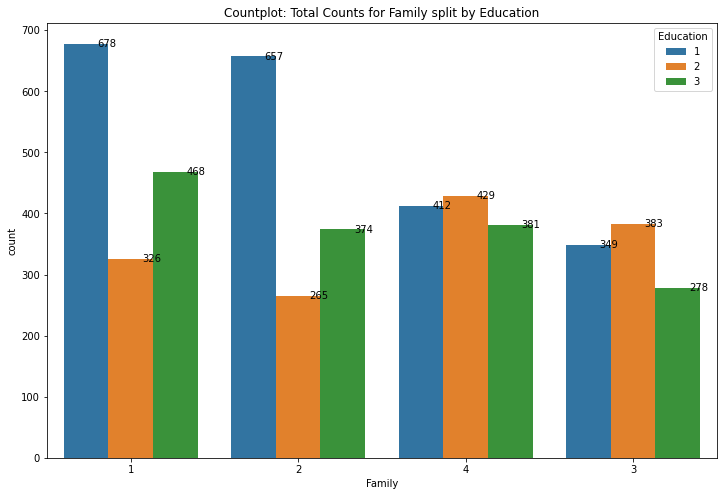

In [33]:
# Use Countplot to see the distribution of Family

Temp_v='Family'

plt.figure(figsize=(12,8))
plt.title(f'Countplot: Total Counts for {Temp_v} ')
plt.xlabel(Temp_v)
ax = sns.countplot(data=df,x=Temp_v, order=df[Temp_v].value_counts().index);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()-5))
plt.show()

plt.figure(figsize=(12,8))
plt.title(f'Countplot: Total Counts for {Temp_v} split by Education')
plt.xlabel(Temp_v)
ax = sns.countplot(data=df,x=Temp_v, hue='Education', order=df[Temp_v].value_counts().index);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()-5))
plt.show()

Observations for Family

1. Single people are the largest group, followed by family of 2
2. Education levels of people in families of 3 & 4 are more even, there are almost equal number of Undergrand, Graduate and Advanced education.

### 8a.6. CCAvg

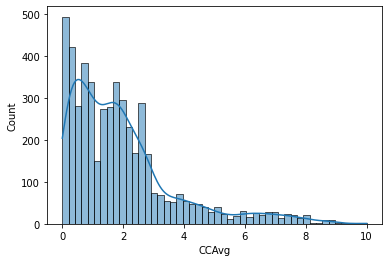

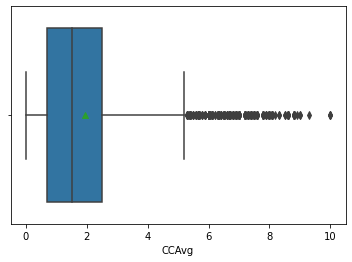

In [34]:
# Use histplots to see distribution for CCAvg

sns.histplot(data=df,x='CCAvg', kde=True)
plt.show()

sns.boxplot(data=df,x='CCAvg', showmeans=True)
plt.show()

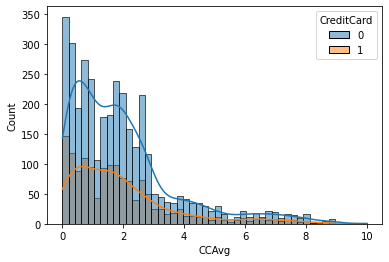

In [35]:
sns.histplot(data=df,x='CCAvg', kde=True, hue='CreditCard')
plt.show()

Observations for CCAvg

1. Left skewed distribution,  need to be checked if normalization or other scaling is needed / will benefit
2. Upper outliers exist, need to be checked more during outlier treatment
3. Customers spending sizable on credit card but use other bank's credit card  potential customers for the bank, for marketing credit card

### 8a.7. Education

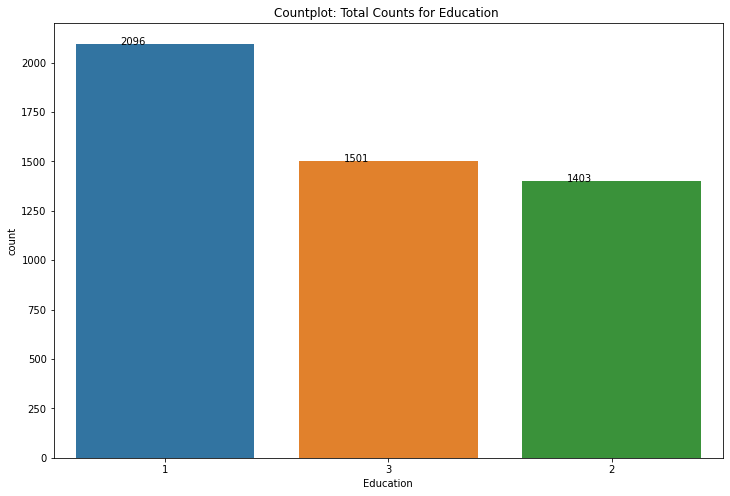

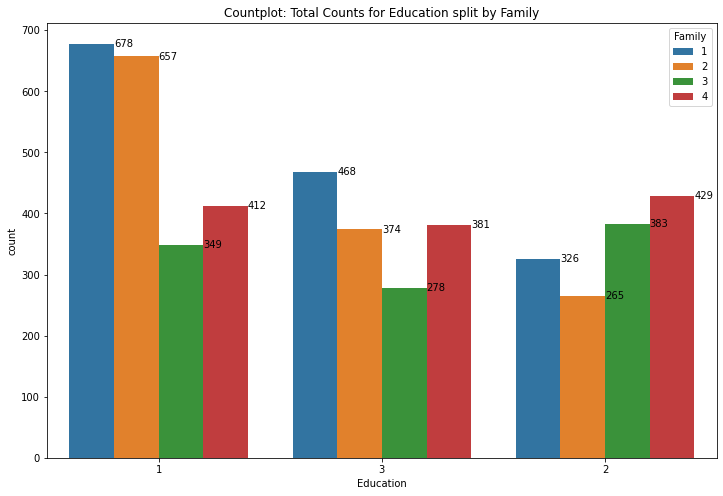

In [36]:
# Use Countplot to see the distribution of Education

Temp_v='Education'

plt.figure(figsize=(12,8))
plt.title(f'Countplot: Total Counts for {Temp_v} ')
plt.xlabel(Temp_v)
ax = sns.countplot(data=df,x=Temp_v, order=df[Temp_v].value_counts().index);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()-5))
plt.show()

plt.figure(figsize=(12,8))
plt.title(f'Countplot: Total Counts for {Temp_v} split by Family')
plt.xlabel(Temp_v)
ax = sns.countplot(data=df,x=Temp_v, hue='Family', order=df[Temp_v].value_counts().index);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()-5))
plt.show()

Observations for Education

1. Biggest group is Undergrad. Graduates and Professional are quite close in numbers
2. Family of 3 or 4 seem to have more proportion of people with Graduation education.

### 8a.8. Mortgage

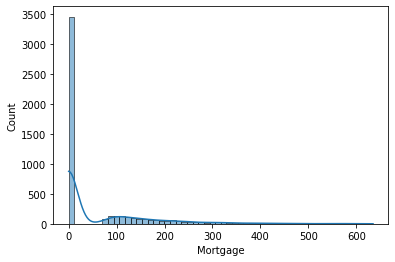

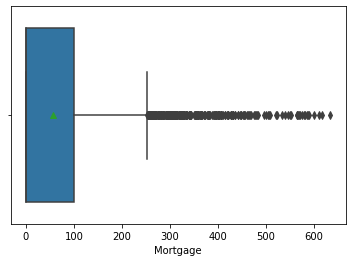

In [37]:
# Use histplots to see distribution for Mortgage

sns.histplot(data=df,x='Mortgage', kde=True)
plt.show()

sns.boxplot(data=df,x='Mortgage', showmeans=True)
plt.show()

Observations for Mortgage

1. Significant number of people with 0 mortgage, good for them!
2. Distribution is skewed abd several upper outliers due to that.


### 8a.9. Personal_Loan

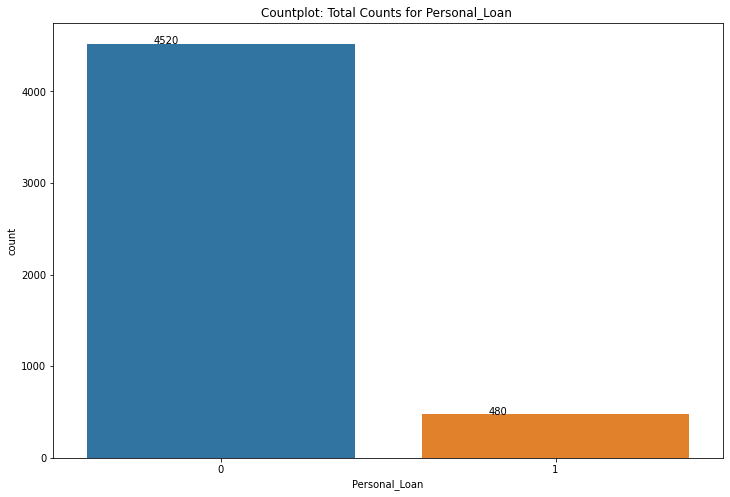

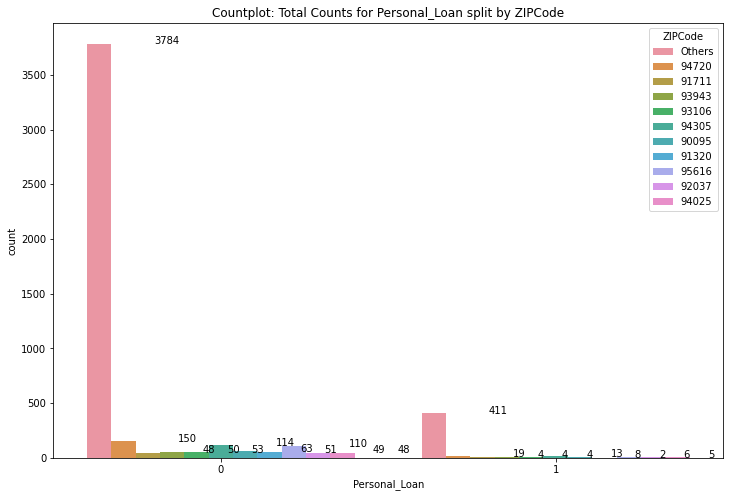

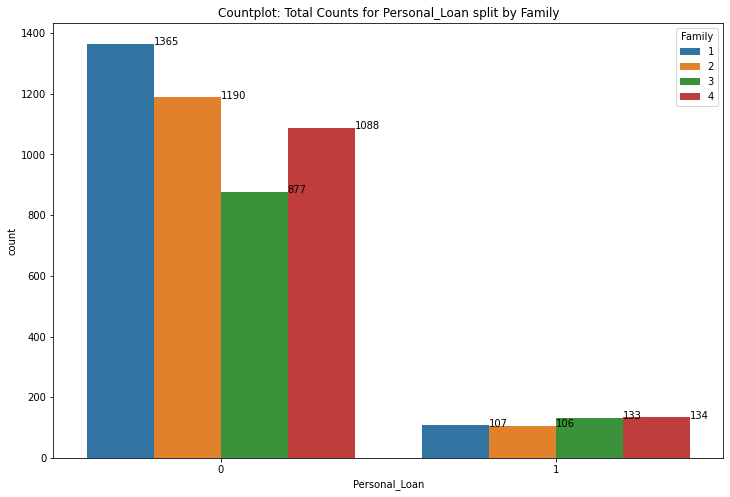

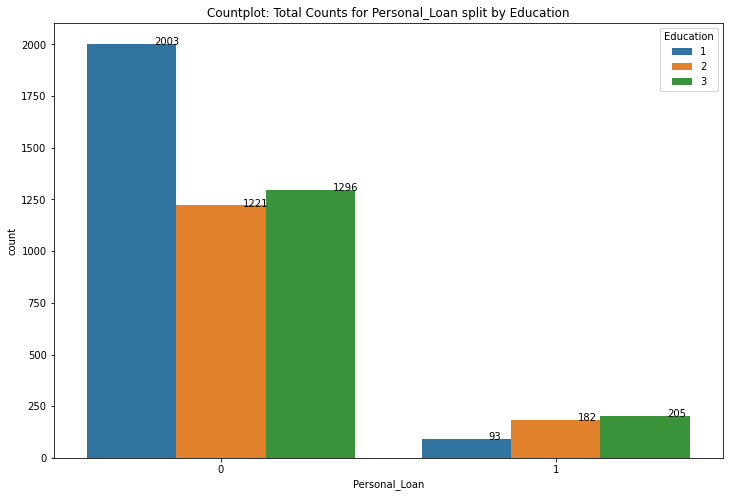

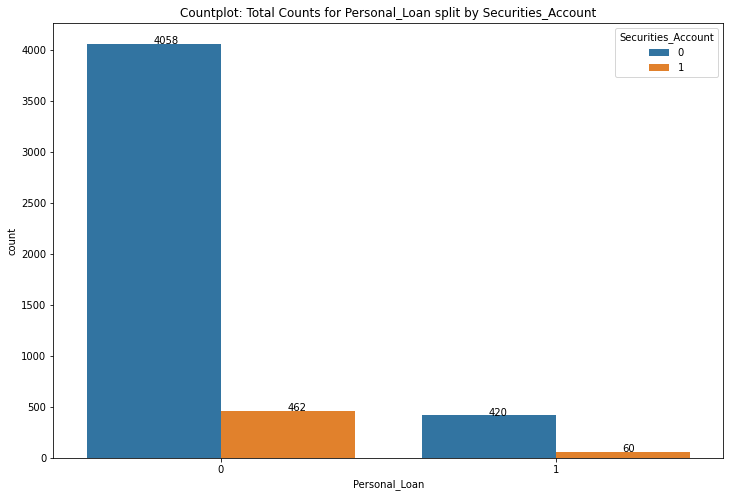

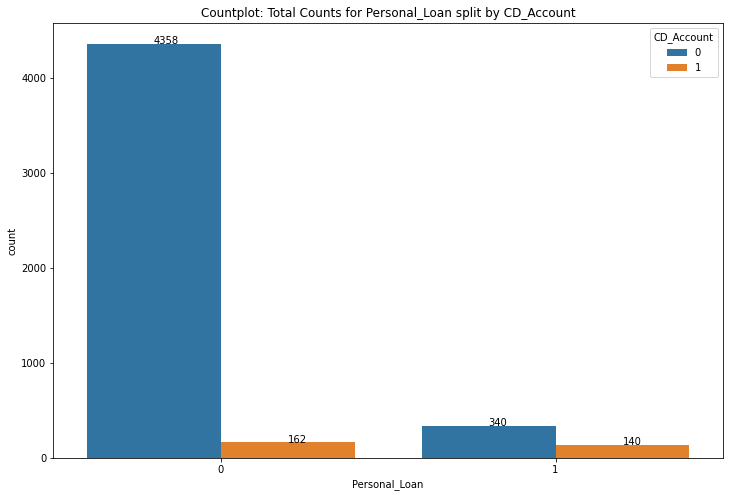

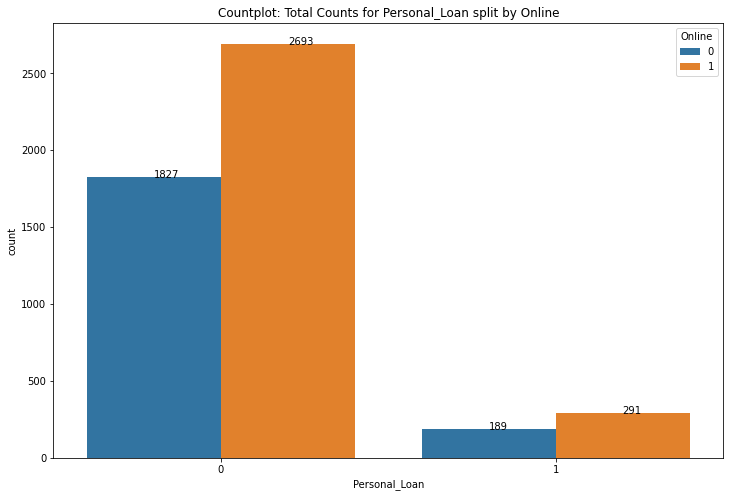

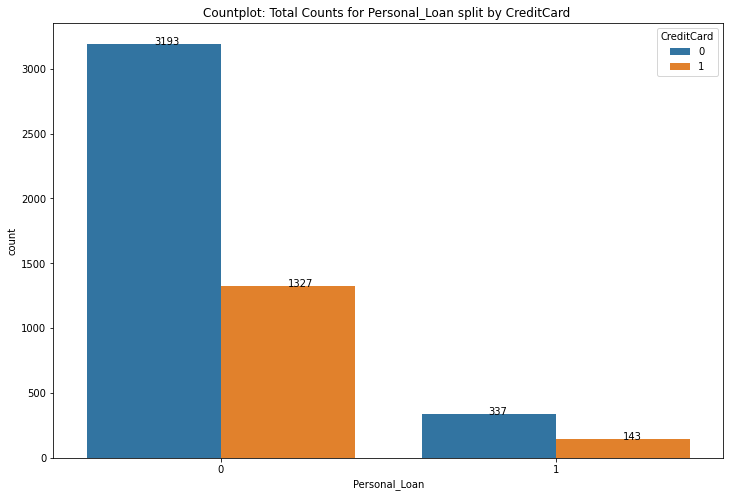

In [38]:
# Use Countplot to see the distribution of Personal_Loan

Temp_v = 'Personal_Loan'

plt.figure(figsize=(12,8))
plt.title(f'Countplot: Total Counts for {Temp_v} ')
plt.xlabel(Temp_v)
ax = sns.countplot(data=df,x=Temp_v, order=df[Temp_v].value_counts().index);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()-5))
plt.show()

plt.figure(figsize=(12,8))
plt.title(f'Countplot: Total Counts for {Temp_v} split by ZIPCode')
plt.xlabel(Temp_v)
ax = sns.countplot(data=df,x=Temp_v, hue='ZIPCode', order=df[Temp_v].value_counts().index);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()-5))
plt.show()

plt.figure(figsize=(12,8))
plt.title(f'Countplot: Total Counts for {Temp_v} split by Family')
plt.xlabel(Temp_v)
ax = sns.countplot(data=df,x=Temp_v, hue='Family', order=df[Temp_v].value_counts().index);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()-5))
plt.show()

plt.figure(figsize=(12,8))
plt.title(f'Countplot: Total Counts for {Temp_v} split by Education')
plt.xlabel(Temp_v)
ax = sns.countplot(data=df,x=Temp_v, hue='Education', order=df[Temp_v].value_counts().index);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()-5))
plt.show()

plt.figure(figsize=(12,8))
plt.title(f'Countplot: Total Counts for {Temp_v} split by Securities_Account')
plt.xlabel(Temp_v)
ax = sns.countplot(data=df,x=Temp_v, hue='Securities_Account', order=df[Temp_v].value_counts().index);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()-5))
plt.show()

plt.figure(figsize=(12,8))
plt.title(f'Countplot: Total Counts for {Temp_v} split by CD_Account')
plt.xlabel(Temp_v)
ax = sns.countplot(data=df,x=Temp_v, hue='CD_Account', order=df[Temp_v].value_counts().index);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()-5))
plt.show()

plt.figure(figsize=(12,8))
plt.title(f'Countplot: Total Counts for {Temp_v} split by Online')
plt.xlabel(Temp_v)
ax = sns.countplot(data=df,x=Temp_v, hue='Online', order=df[Temp_v].value_counts().index);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()-5))
plt.show()

plt.figure(figsize=(12,8))
plt.title(f'Countplot: Total Counts for {Temp_v} split by CreditCard ')
plt.xlabel(Temp_v)
ax = sns.countplot(data=df,x=Temp_v, hue='CreditCard', order=df[Temp_v].value_counts().index);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()-5))
plt.show()

Observations for Personal_Loan

1. 90% customers do not have personal loan from the bank. 
2. Family size does not seem to show any pattern. All family size customers have availed loan
3. Of those who availed the loan, Graduates and Advanced educated people are more than double than Undergrads
4. Of those who availed the loan, significant number of people do NOT use internet banking. Even overall, there is significant number of people not using Online banking. Probably, bank should promote Online banking more and / or investigate why people do not prefer online banking. May be some potential improvements needed.
5. Sizable customers that use other bank's credit card, almost 30%. This is another opportunity for business.

### 8a.10. Securities_Account

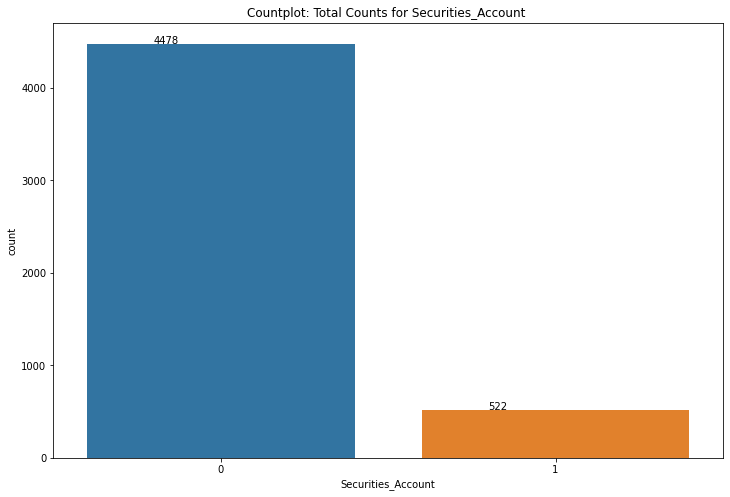

In [39]:
# Use Countplot to see the distribution of Securities_Account

Temp_v = 'Securities_Account'

plt.figure(figsize=(12,8))
plt.title(f'Countplot: Total Counts for {Temp_v} ')
plt.xlabel(Temp_v)
ax = sns.countplot(data=df,x=Temp_v, order=df[Temp_v].value_counts().index);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()-5))
plt.show()

Observations for Securities_Account

1. Majority customer do not have this account

### 8a.11. CD_Account

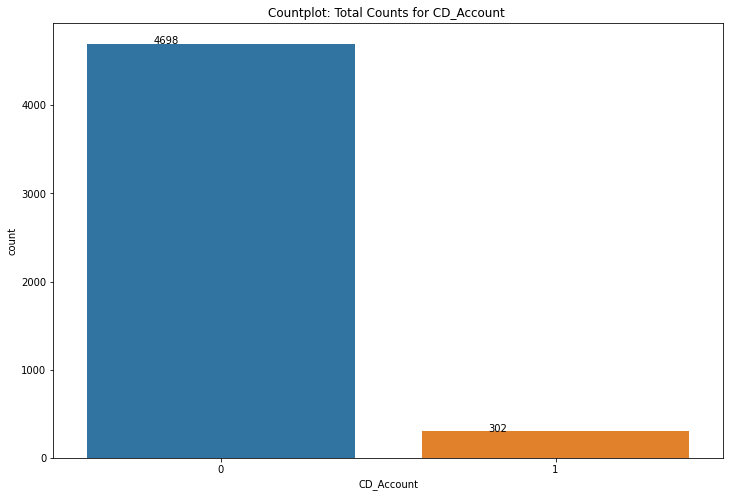

In [40]:
# Use Countplot to see the distribution of CD_Account

Temp_v = 'CD_Account'

plt.figure(figsize=(12,8))
plt.title(f'Countplot: Total Counts for {Temp_v} ')
plt.xlabel(Temp_v)
ax = sns.countplot(data=df,x=Temp_v, order=df[Temp_v].value_counts().index);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()-5))
plt.show()


Observations for CD_Account

1. Majority customer do not have this account

### 8a.12. Online

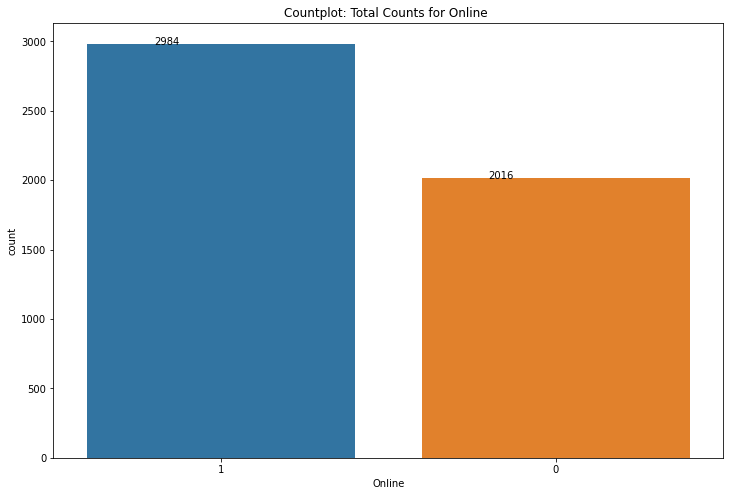

In [41]:
# Use Countplot to see the distribution of Online

Temp_v = 'Online'

plt.figure(figsize=(12,8))
plt.title(f'Countplot: Total Counts for {Temp_v} ')
plt.xlabel(Temp_v)
ax = sns.countplot(data=df,x=Temp_v, order=df[Temp_v].value_counts().index);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()-5))
plt.show()


Observations for Online

1. Significant proportion does NOT use internet banking. Need to investigate why.

### 8a.13. CreditCard

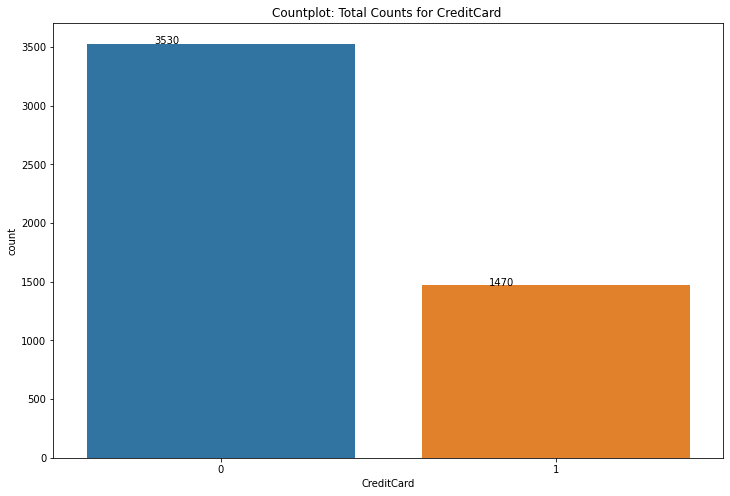

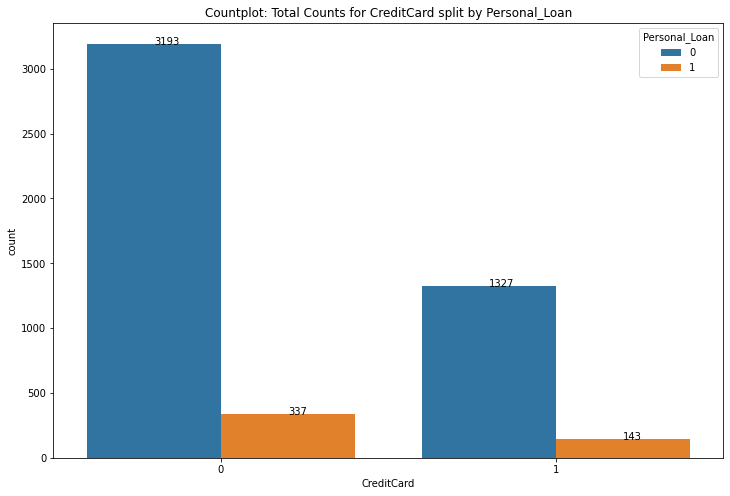

In [42]:
# Use Countplot to see the distribution of CreditCard 

Temp_v = 'CreditCard'

plt.figure(figsize=(12,8))
plt.title(f'Countplot: Total Counts for {Temp_v} ')
plt.xlabel(Temp_v)
ax = sns.countplot(data=df,x=Temp_v, order=df[Temp_v].value_counts().index);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()-5))
plt.show()


plt.figure(figsize=(12,8))
plt.title(f'Countplot: Total Counts for {Temp_v} split by Personal_Loan')
plt.xlabel(Temp_v)
ax = sns.countplot(data=df,x=Temp_v, hue='Personal_Loan', order=df[Temp_v].value_counts().index);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()-5))
plt.show()

Observations for CreditCard

1. Significant proportion does use other bank's credit card. They also do not have any personal loan as well.
2. Assuming that 0 values indicate that customer use bank's credit card, only a small portion have availed personal loan.

## 8b. EDA - Multivariate Analysis

Purpose of this analysis is to identify inter relationships between multiple features.

Main focus will be understaning relationships of several features with Price.

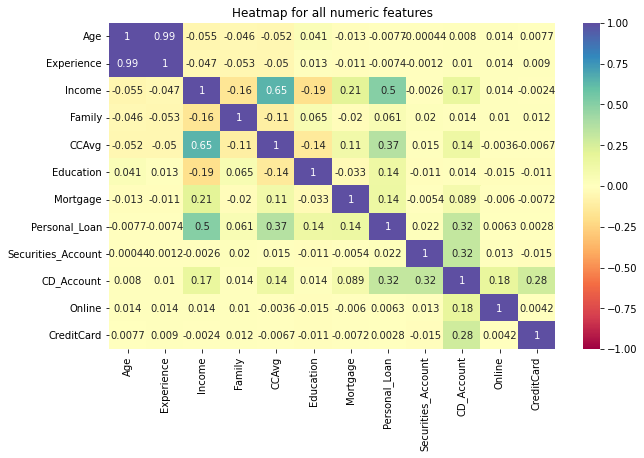

In [43]:
#Let's start with Heatmap to check relationships between all numeric features

plt.figure(figsize=(10,6))
plt.title('Heatmap for all numeric features')

sns.heatmap(df.corr(),annot=True,cmap='Spectral',vmin=-1,vmax=1)
plt.show()

Observations

1. Strong corelation (>= 0.7 absolute value) exists between below features - 

  a. Age and Experience - As expected
  
2. Moderately corelation (between 0.3 and 0.7 absolute value) exist between below features - 

  a. Income and CCAvg - More Income, more credit card spending

  b. Income and Personal_Loan - Needs to be checked further, this is of interest

  c. CCAvg and Personal_Loan - Needs to be checked further, this is of interest

  d. Personal_Loan and CD_Account - Needs to be checked further, this is of interest

  e. Securities_Account and CD_Account - More people having both accounts

3. No strong or moderate negative corelation observed.

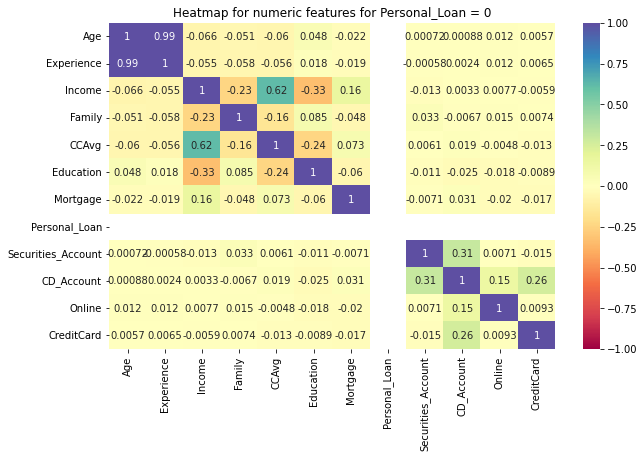

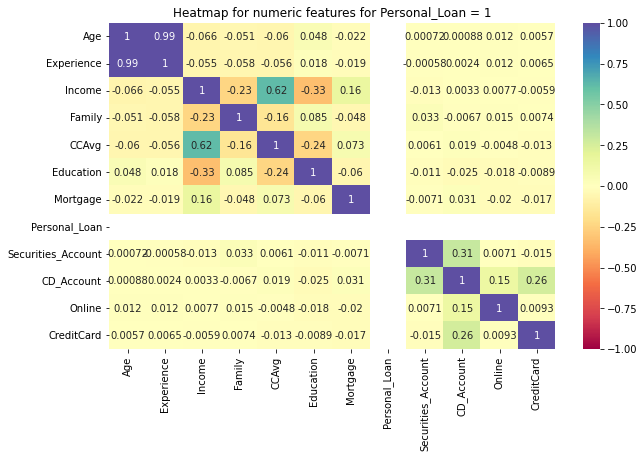

In [44]:
# Let's check Heatmap for numeric features, but for groups segregated by Personal_Loan

plt.figure(figsize=(10,6))
plt.title('Heatmap for numeric features for Personal_Loan = 0')
sns.heatmap(df[df['Personal_Loan'] == 0 ].corr(),annot=True,cmap='Spectral',vmin=-1,vmax=1)
plt.show()

plt.figure(figsize=(10,6))
plt.title('Heatmap for numeric features for Personal_Loan = 1')
sns.heatmap(df[df['Personal_Loan'] == 0 ].corr(),annot=True,cmap='Spectral',vmin=-1,vmax=1)
plt.show()

Althogh moderate, but Income and Education has a negative corelation, that's surprising!

Let's check relation between 2 features at a time.

Income and CCAvg

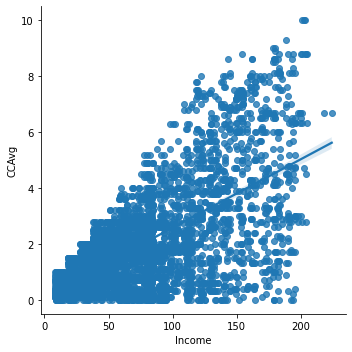

In [45]:
# Let's use Lmplot to see relations between 2 features - Income and CCAvg

sns.lmplot(data=df,x='Income', y='CCAvg');

As Income goes up, credit card spending goes up as well

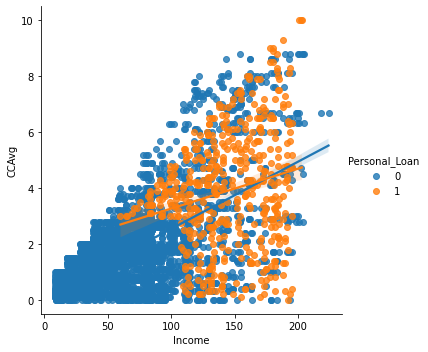

In [46]:
# Let's use Lmplot to see relations between 2 features - Income and CCAvg, split by Personal_Loan

sns.lmplot(data=df,x='Income', y='CCAvg', hue='Personal_Loan');

Not much difference in the people who have availed loan or not, for link between Income and CCAvg.

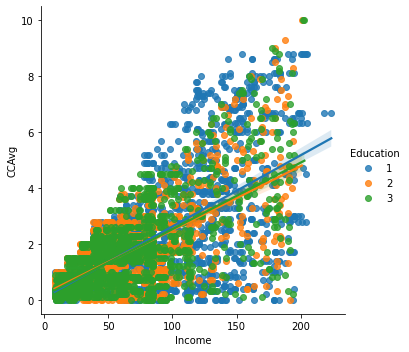

In [47]:
# Let's use Lmplot to see relations between 2 features - Income and CCAvg, split by Education

sns.lmplot(data=df,x='Income', y='CCAvg', hue='Education');

Not much difference in the people based on Education, for link between Income and CCAvg.

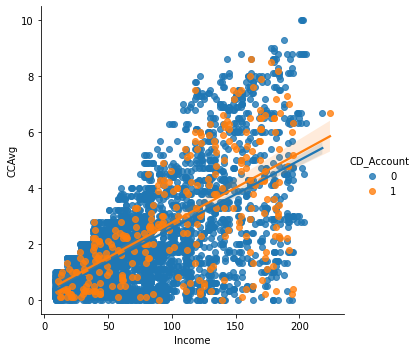

In [48]:
# Let's use Lmplot to see relations between 2 features - Income and CCAvg, split by CD_Account

sns.lmplot(data=df,x='Income', y='CCAvg', hue='CD_Account');

Not much difference in the people based on CD_Account, for link between Income and CCAvg.

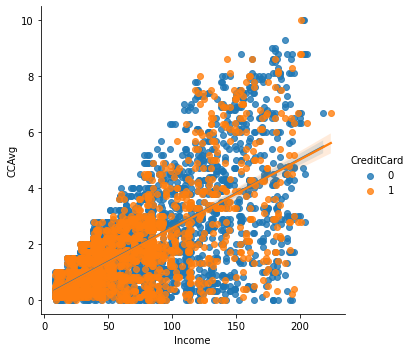

In [49]:
# Let's use Lmplot to see relations between 2 features - Income and CCAvg, split by CreditCard 

sns.lmplot(data=df,x='Income', y='CCAvg', hue='CreditCard');

Not much difference in the people based on CreditCard, for link between Income and CCAvg.

Income and Mortgage

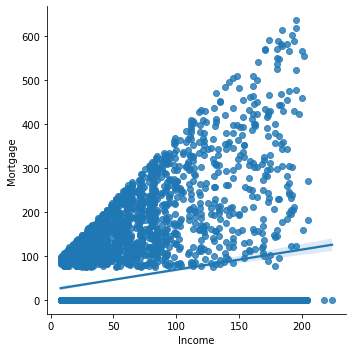

In [50]:
# Let's use Lmplot to see relations between 2 features - Income and Mortgage

sns.lmplot(data=df,x='Income', y='Mortgage');

Positive corelation between Income and Mortgage.

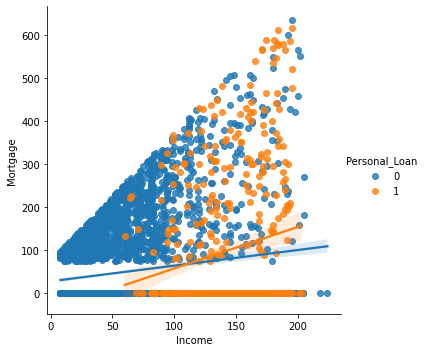

In [51]:
# Let's use Lmplot to see relations between 2 features - Income and Mortgage, split by Personal_Loan

sns.lmplot(data=df,x='Income', y='Mortgage', hue='Personal_Loan');

For people who have availed personal loan, relationship between Income and Mortgage is stronger than for people who have not availed the loan.

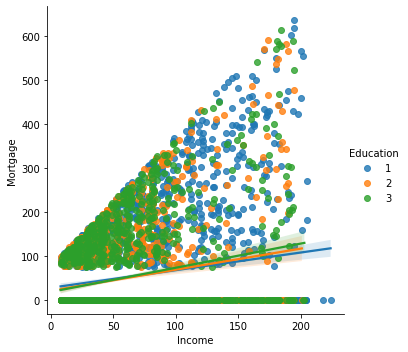

In [52]:
# Let's use Lmplot to see relations between 2 features - Income and Mortgage, split by Education

sns.lmplot(data=df,x='Income', y='Mortgage', hue='Education');

Not much difference in the relation between Income and Mortgage based on Education.

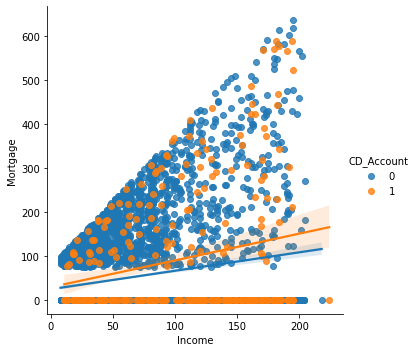

In [53]:
# Let's use Lmplot to see relations between 2 features - Income and Mortgage, split by CD_Account

sns.lmplot(data=df,x='Income', y='Mortgage', hue='CD_Account');

Not much difference in the relation between Income and Mortgage based on CD_Account.

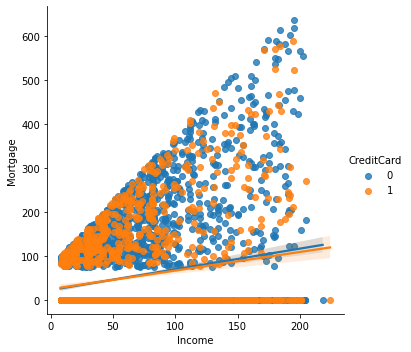

In [54]:
# Let's use Lmplot to see relations between 2 features - Income and Mortgage, split by CreditCard 

sns.lmplot(data=df,x='Income', y='Mortgage', hue='CreditCard');

Not much difference in the relation between Income and Mortgage based on CreditCard.

CCAvg and Mortgage

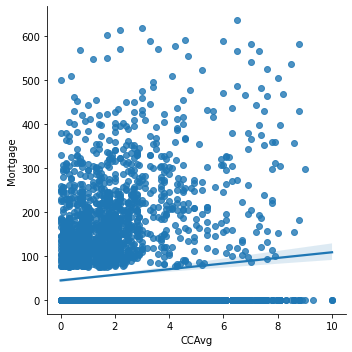

In [55]:
# Let's use Lmplot to see relations between 2 features - CCAvg and Mortgage 

sns.lmplot(data=df,x='CCAvg', y='Mortgage');

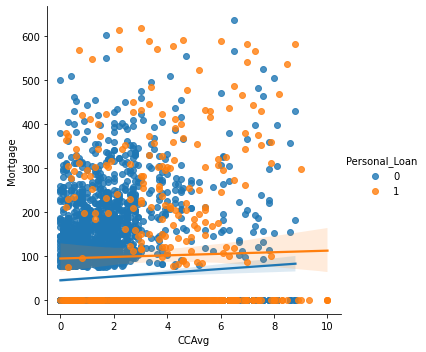

In [56]:
# Let's use Lmplot to see relations between 2 features - CCAvg and Mortgage, split by Personal_Loan

sns.lmplot(data=df,x='CCAvg', y='Mortgage', hue='Personal_Loan');

Minor positive corelation between CCAvg and Mortgage.

Let's check how Personal_Loan and some other key features are related.

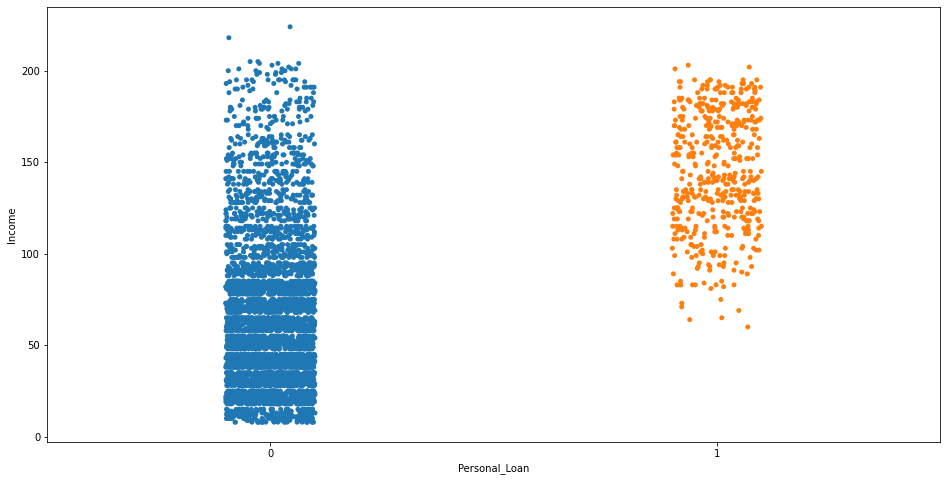

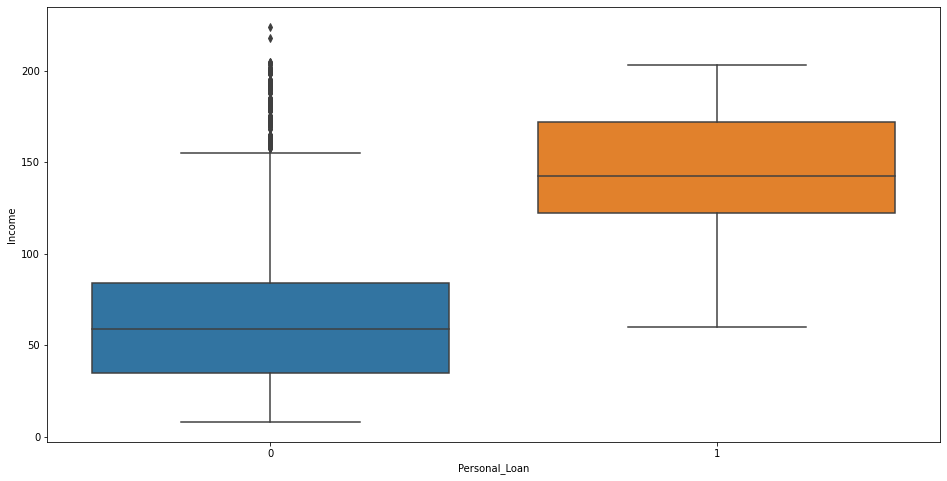

In [57]:
# Create stripplot for Personal_Loan and Income.  

plt.figure(figsize=(16,8))
sns.stripplot(data=df, x='Personal_Loan', y='Income');
plt.show()

plt.figure(figsize=(16,8))
sns.boxplot(data=df, x='Personal_Loan', y='Income')
plt.show()

Income levels of people who have availed personal loan are more. However, there are enough potential customers with higher incomes

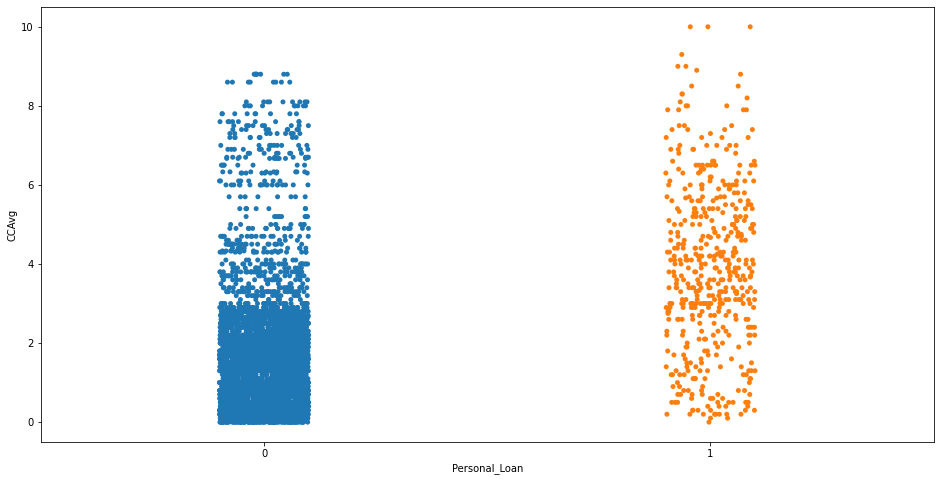

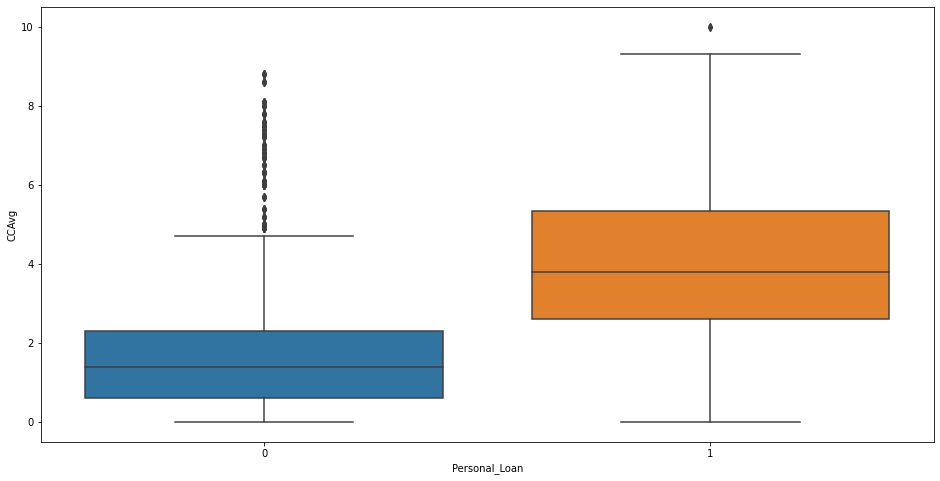

In [58]:
# Create stripplot for Personal_Loan and CCAVg.  

plt.figure(figsize=(16,8))
sns.stripplot(data=df, x='Personal_Loan', y= 'CCAvg');
plt.show()

plt.figure(figsize=(16,8))
sns.boxplot(data=df, x='Personal_Loan', y='CCAvg')
plt.show()

CCAvg levels are more for customers in Class 1 than for customers in Class 0

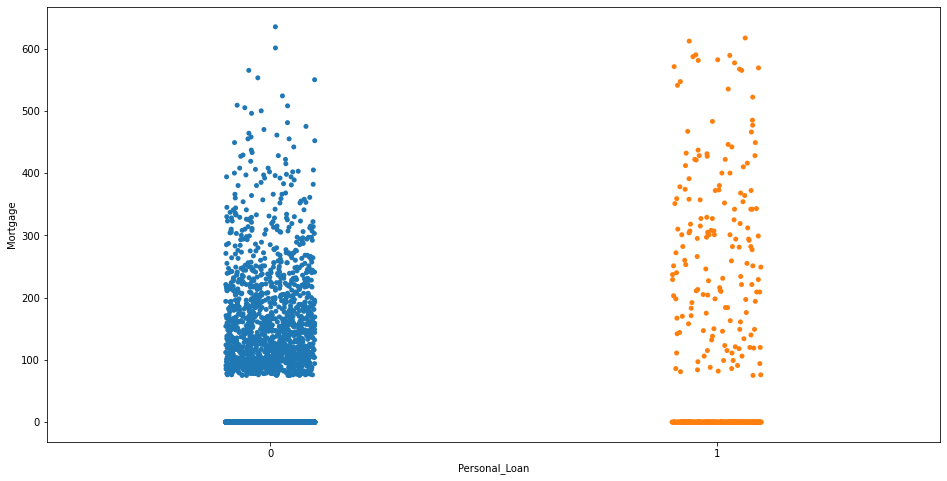

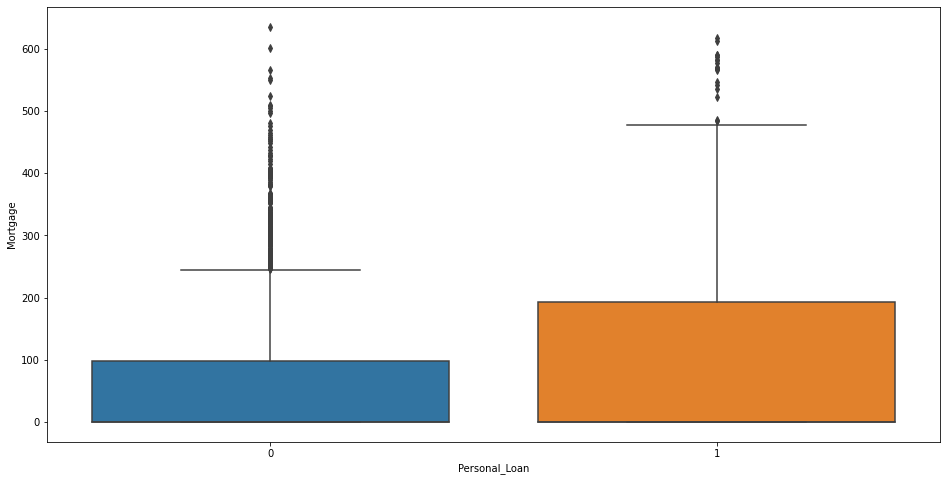

In [59]:
# Create stripplot for Personal_Loan and Mortgage.  

plt.figure(figsize=(16,8))
sns.stripplot(data=df, x='Personal_Loan', y= 'Mortgage');
plt.show()

plt.figure(figsize=(16,8))
sns.boxplot(data=df, x='Personal_Loan', y='Mortgage')
plt.show()

Significant range in Mortgage in customers in Class 0. 75th percentile for Class 1 is almost double than Class 0

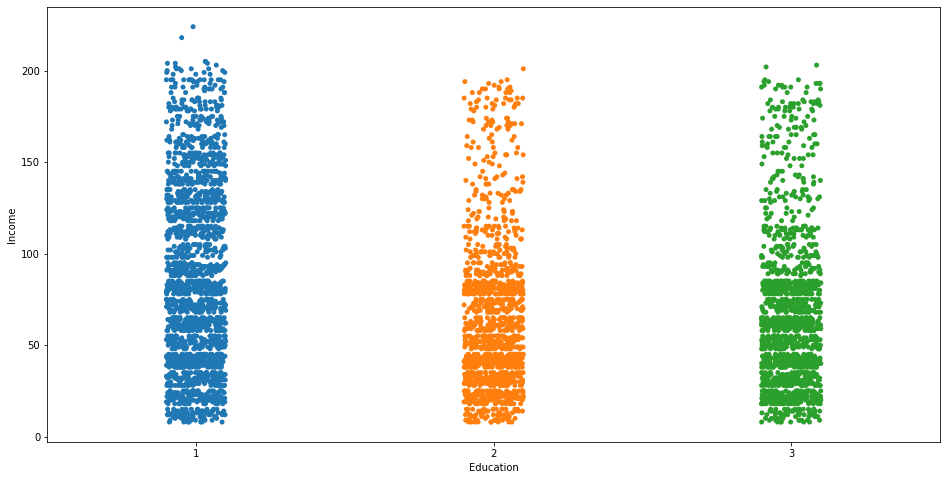

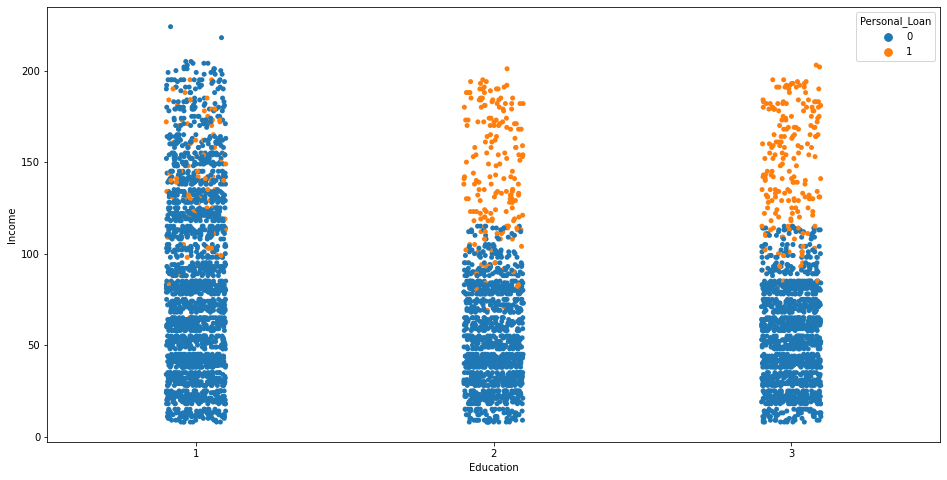

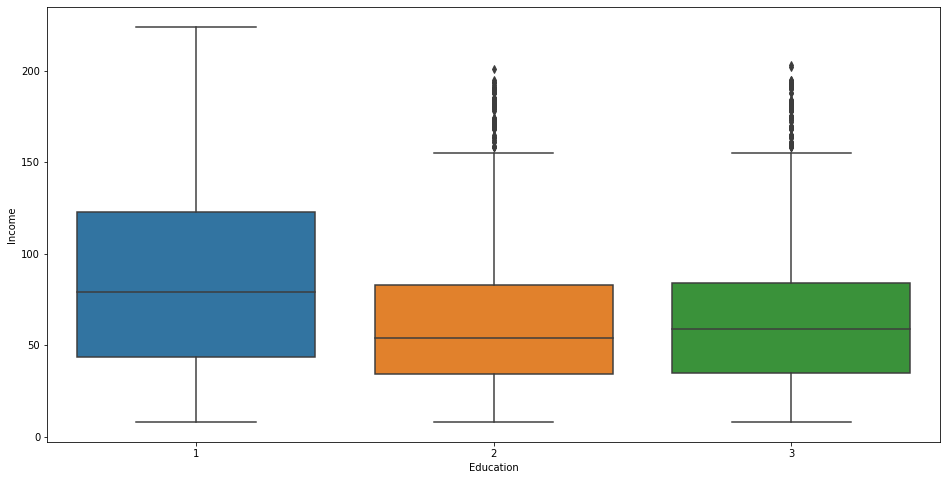

In [60]:
# Create stripplot for Education and Income.  

plt.figure(figsize=(16,8))
sns.stripplot(data=df, x='Education', y= 'Income');
plt.show()

plt.figure(figsize=(16,8))
sns.stripplot(data=df, x='Education', y= 'Income', hue='Personal_Loan');
plt.show()

plt.figure(figsize=(16,8))
sns.boxplot(data=df, x='Education', y='Income')
plt.show()

Undergrads are the potential customers. Income levels are more, but yet untapped. Most of the loan custmers seem to be grad or advanced

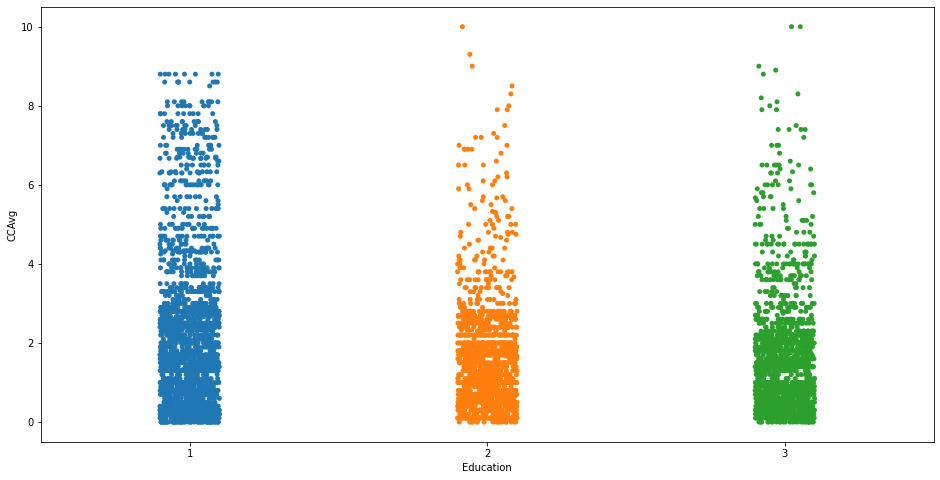

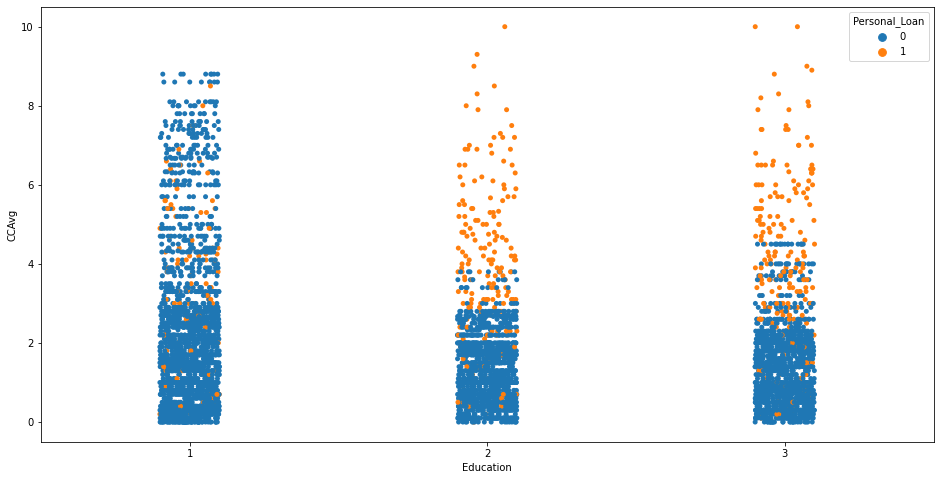

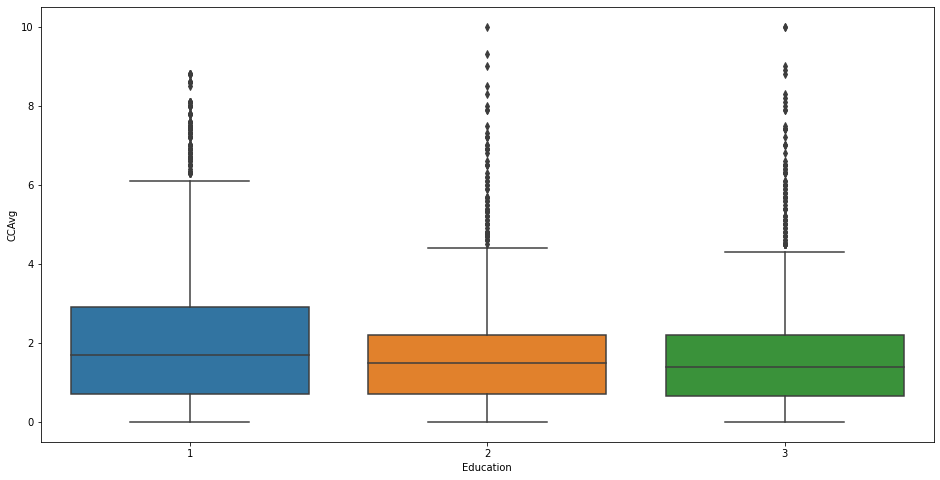

In [61]:
# Create stripplot for Education and CCAvg.  

plt.figure(figsize=(16,8))
sns.stripplot(data=df, x='Education', y= 'CCAvg');
plt.show()

plt.figure(figsize=(16,8))
sns.stripplot(data=df, x='Education', y= 'CCAvg', hue='Personal_Loan');
plt.show()

plt.figure(figsize=(16,8))
sns.boxplot(data=df, x='Education', y='CCAvg')
plt.show()

Looks like majority of the customers having personal loan are Graduate or Professional.

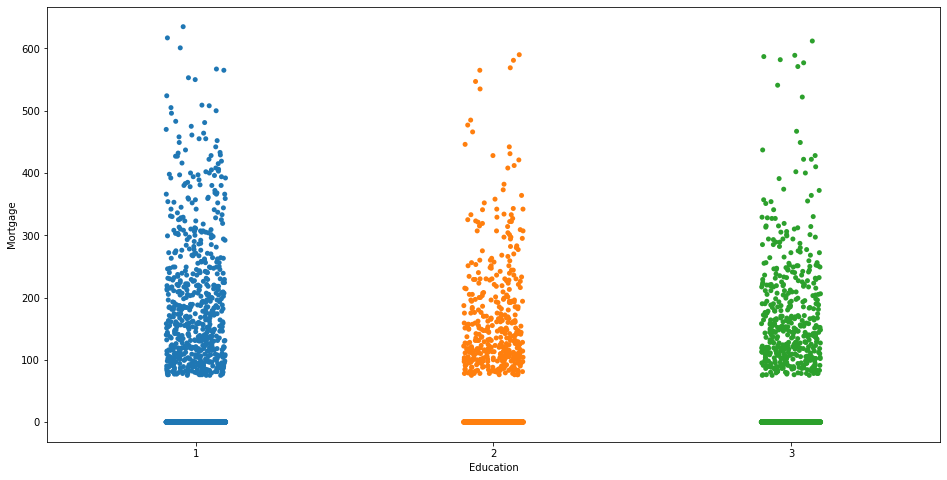

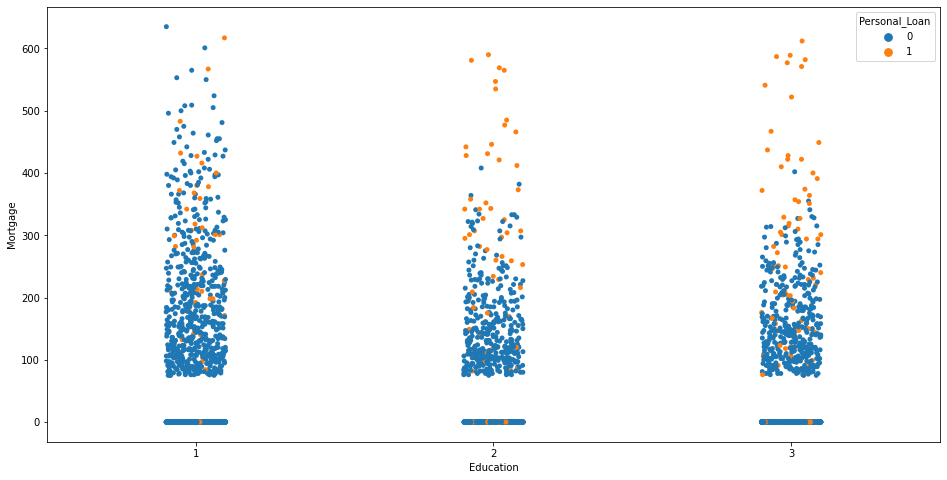

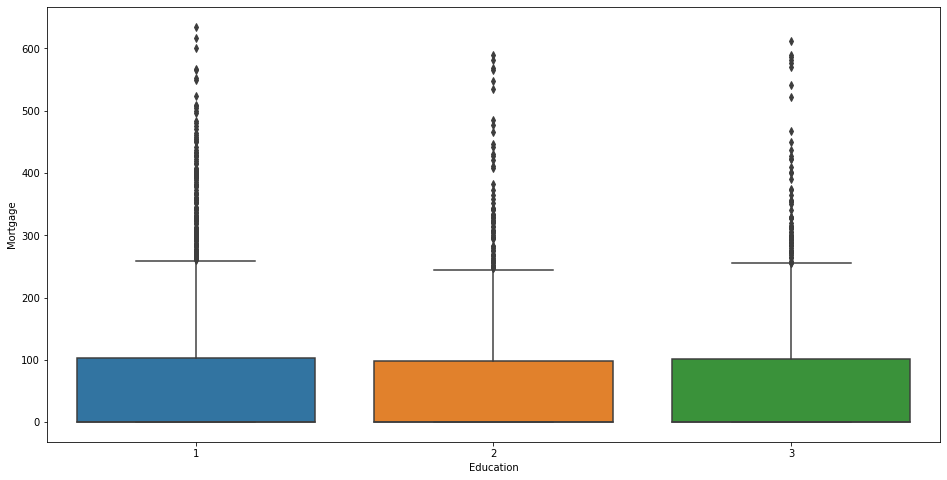

In [62]:
# Create stripplot for Education and Mortgage.  

plt.figure(figsize=(16,8))
sns.stripplot(data=df, x='Education', y= 'Mortgage');
plt.show()

plt.figure(figsize=(16,8))
sns.stripplot(data=df, x='Education', y= 'Mortgage', hue='Personal_Loan');
plt.show()

plt.figure(figsize=(16,8))
sns.boxplot(data=df, x='Education', y='Mortgage')
plt.show()

No specific observation

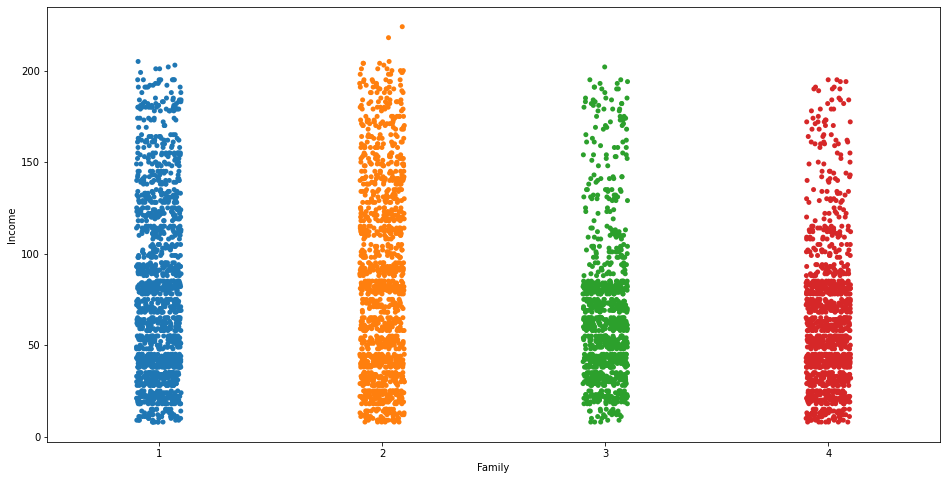

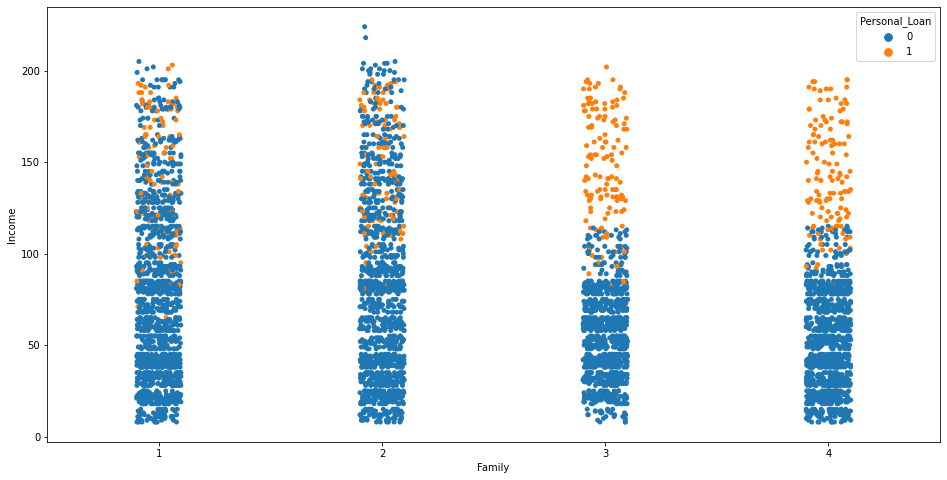

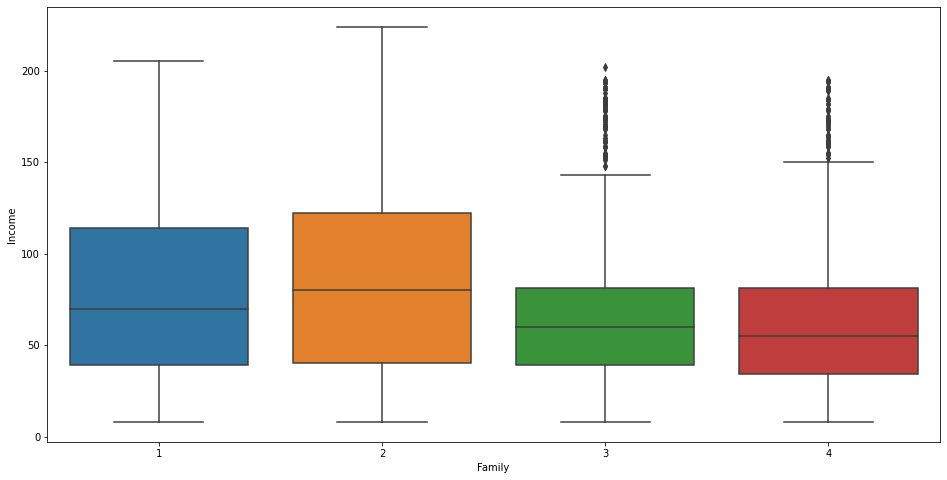

In [63]:
# Create stripplot for Family and Income.  

plt.figure(figsize=(16,8))
sns.stripplot(data=df, x='Family', y= 'Income');
plt.show()

plt.figure(figsize=(16,8))
sns.stripplot(data=df, x='Family', y= 'Income', hue='Personal_Loan');
plt.show()

plt.figure(figsize=(16,8))
sns.boxplot(data=df, x='Family', y='Income')
plt.show()

Comparatively, customers with family size of 3 or 4 have more proportin in customers having personal loan.

More Income variation in customers with family size 1 or 2.

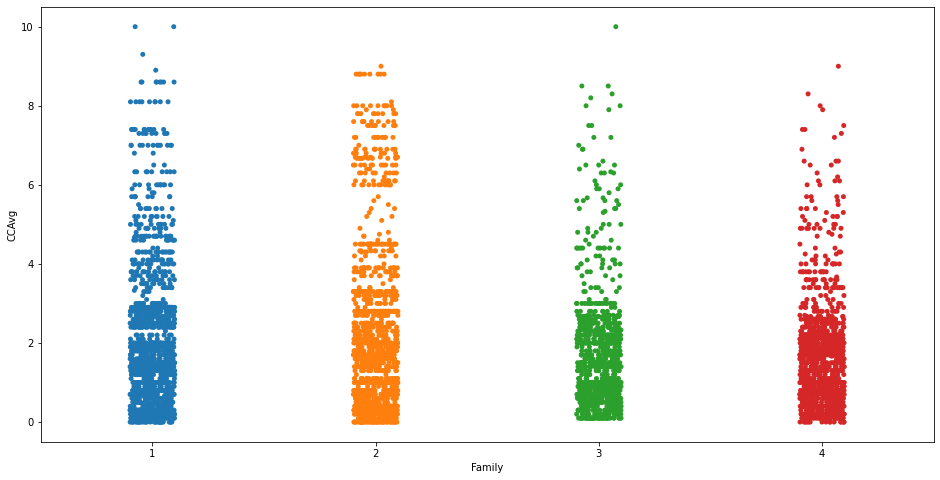

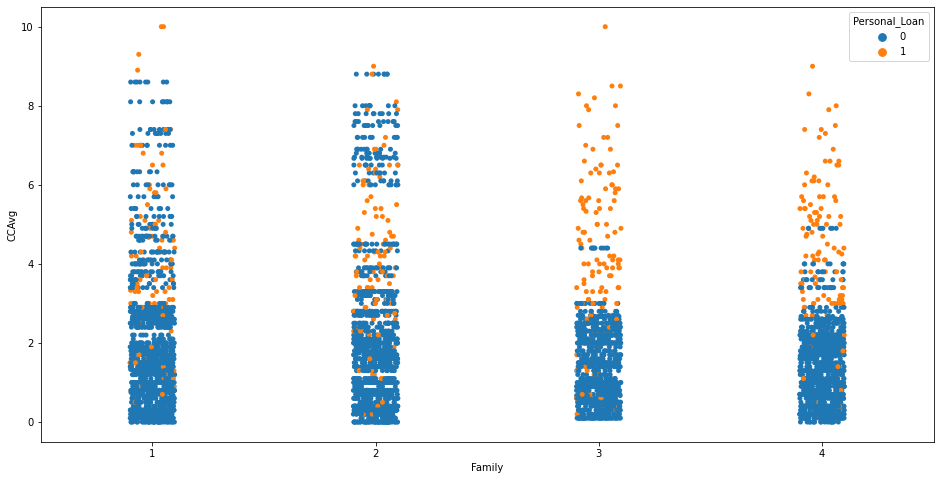

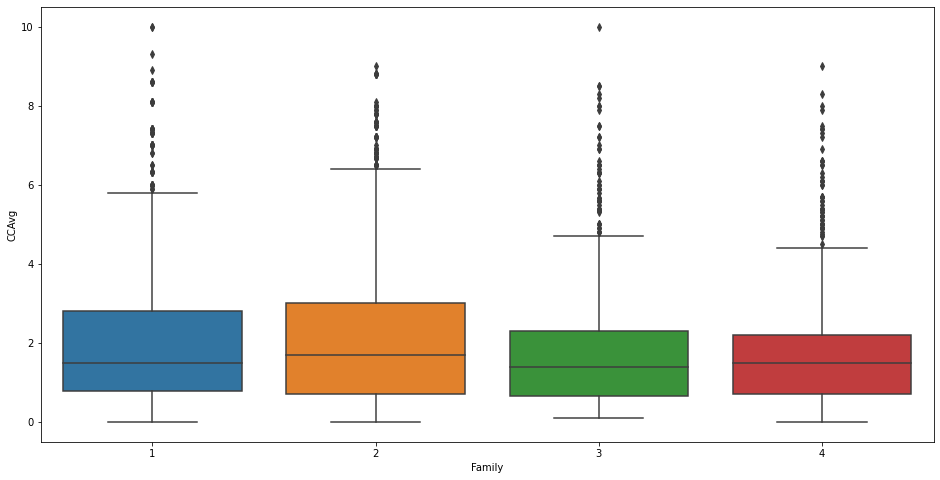

In [64]:
# Create stripplot for Family and CCAvg.  

plt.figure(figsize=(16,8))
sns.stripplot(data=df, x='Family', y= 'CCAvg');
plt.show()

plt.figure(figsize=(16,8))
sns.stripplot(data=df, x='Family', y= 'CCAvg', hue='Personal_Loan');
plt.show()

plt.figure(figsize=(16,8))
sns.boxplot(data=df, x='Family', y='CCAvg')
plt.show()

No significant differences or observations worth noting.

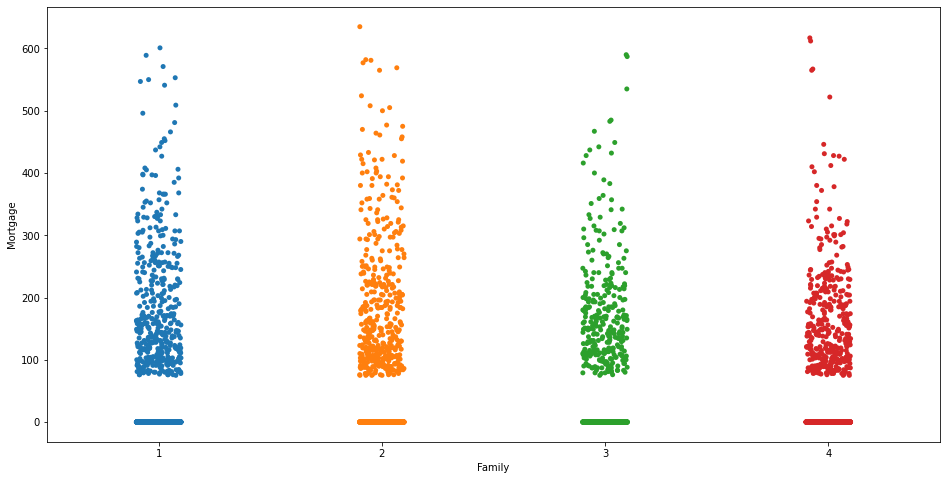

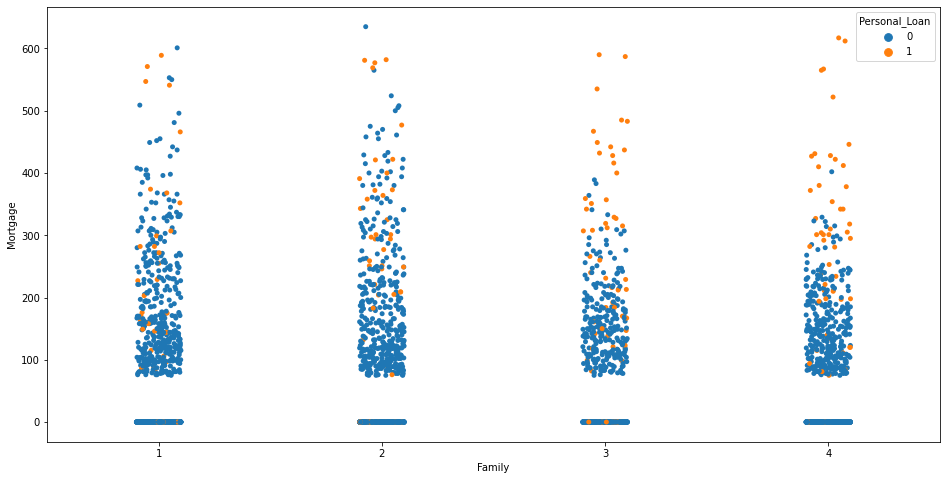

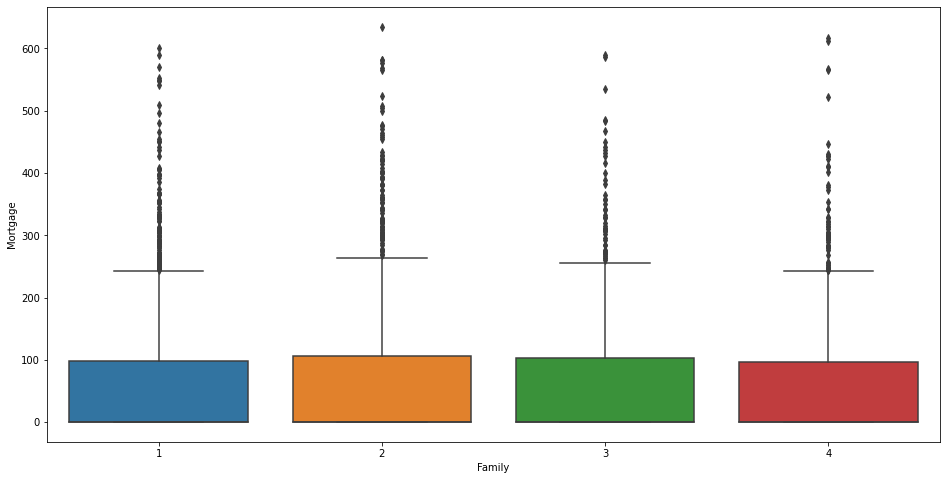

In [65]:
# Create stripplot for Family and Mortgage.  

plt.figure(figsize=(16,8))
sns.stripplot(data=df, x='Family', y= 'Mortgage');
plt.show()

plt.figure(figsize=(16,8))
sns.stripplot(data=df, x='Family', y= 'Mortgage', hue='Personal_Loan');
plt.show()

plt.figure(figsize=(16,8))
sns.boxplot(data=df, x='Family', y='Mortgage')
plt.show()

No specific observation

## 8c. EDA - Insights Summary

### Univariate Analysis

1. Although not Normal distribution, Age and Experience appears to be evenly distributed.
2. Left skewed distribution for Income, need to be checked if normalization or other scaling is needed / will benefit for model training.
Upper outliers exist, need to be checked more during outlier treatment
3. Surprisingly, education level 1 (Undergrad) customers have higher Income levels than customers with Graduation or Advanced Education.
4. Single people are the largest customer group, followed by family of 2.
5. Education levels of people in families of 3 & 4 are more even, there are almost equal number of Undergrand, Graduate and Advanced education.
6. Customers spending sizable on credit card but use other bank's credit card  are potential customers for the bank. Bank should market credit card in a better way.
7. Biggest customer group is Undergrad. Graduates and Professional are quite close in numbers.
8. Significant number of people with 0 mortgage, good for them! but Distribution is skewed abd several upper outliers due to that.
9. Over 90% customers do not have personal loan from the bank. 
10. Family size does not seem to show any pattern. All family size customers have availed loan
11. Of those who availed the loan, Graduates and Advanced educated people are more than double than Undergrads
12. Of those who availed the loan, significant number of people do NOT use internet banking. Even overall, there is significant number of people not using Online banking. Probably, bank should promote Online banking more and / or investigate why people do not prefer online banking. May be some potential improvements needed.
13. Sizable customers that use other bank's credit card, almost 30%. This is another opportunity for business.
14. Majority of the customers do NOT have Securities and CD account.
15.  Significant proportion does NOT use internet banking. Need to investigate why.
16. Significant proportion of customers use other bank's credit card. They also do not have any personal loan as well. Assuming that 0 values indicate that customer use bank's credit card, only a small portion have availed personal loan.
17. Outliers seen for Income, CCAvg and Mortgage

### Multivariate Analysis

1. Strong corelation (>= 0.7 absolute value) exists between below features - 

  a. Age and Experience - As expected

2. Moderate corelation (between 0.3 and 0.7 absolute value) exist between below features - 

  a. Income and CCAvg - More Income, more credit card spending

  b. Income and Personal_Loan - Needs to be checked further, this is of interest

  c. CCAvg and Personal_Loan - Needs to be checked further, this is of interest

  d. Personal_Loan and CD_Account - Needs to be checked further, this is of interest

  e. Securities_Account and CD_Account - More people having both accounts

3. No other strong or moderate negative corelation observed.

4. Althogh moderate, but Income and Education has a negative corelation, that's surprising!

5. As Income goes up, credit card spending goes up as well. ot much difference based on other factors like Education, CD_Account, Personal_Loan, CreditCard.

6. Positive corelation between Income and Mortgage.
For people who have availed personal loan, relationship between Income and Mortgage is stronger than for people who have not availed the loan. Not much difference in the relation between Income and Mortgage based on Education and other features.

7. Income levels of people who have availed personal loan are more. However, there are enough potential customers with higher incomes. 50% of the people in Class 0 have lower Income than minimum for people in Class 1.

8. CCAvg levels are more for customers in Class 1 than for customers in Class 0.

9. Significant range in Mortgage in customers in Class 0. 75th percentile for Class 1 is almost double than Class 0.

10. Undergrads are the potential customers. Income levels are more, but yet untapped. Most of the loan custmers seem to be grad or advanced.




No significant difference

# 9. Perform Data Pre-processing

This includes - 
1. Treat missing values
2. Treat outliers for numeric features
3. Feature Engineering if / as needed
4. Feature Scaling if / as needed

## 9a. Feature Treatment - Missing values

Purpose is to treat missing values, as appropriate.
Depending on the type of the feature, volume of missing records, pattern in missingness etc. one of below approaches can be taken - 
* Fill missing values with Mean or Median or Mode
* Remove rows with missing values

In [66]:
# Check for missing values

df.isnull().sum().sort_values(ascending=False)

Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

There are NO MISSING VALUES, so no treatment needed. 

However, Experience had negative values, let correct those.

In [67]:
# Number of records with negative experience

df[df['Experience'] < 0].count()

Age                   52
Experience            52
Income                52
ZIPCode               52
Family                52
CCAvg                 52
Education             52
Mortgage              52
Personal_Loan         52
Securities_Account    52
CD_Account            52
Online                52
CreditCard            52
dtype: int64

In [68]:
# Records with negative experience

df[df['Experience'] < 0]

Age  Experience  Income ZIPCode  Family  CCAvg  Education  Mortgage  \
89     25          -1     113  Others       4 2.3000          3         0   
226    24          -1      39  Others       2 1.7000          2         0   
315    24          -2      51  Others       3 0.3000          3         0   
451    28          -2      48  Others       2 1.7500          3        89   
524    24          -1      75  Others       4 0.2000          1         0   
536    25          -1      43  Others       3 2.4000          2       176   
540    25          -1     109  Others       4 2.3000          3       314   
576    25          -1      48  Others       3 0.3000          3         0   
583    24          -1      38  Others       2 1.7000          2         0   
597    24          -2     125  Others       2 7.2000          1         0   
649    25          -1      82  Others       4 2.1000          3         0   
670    23          -1      61  Others       4 2.6000          1       239   
686    24          -1      38  Others       4 0.6000          2         0   
793    24          -2     150   94720       2 2.0000          1         0   
889    24          -2      82  Others       2 1.6000          3         0   
909    23          -1     149  Others       1 6.3300          1       305   
1173   24          -1      35   94305       2 1.7000          2         0   
1428   25          -1      21  Others       4 0.4000          1        90   
1522   25          -1     101   94720       4 2.3000          3       256   
1905   25          -1     112  Others       2 2.0000          1       241   
2102   25          -1      81  Others       2 1.6000          3         0   
2430   23          -1      73  Others       4 2.6000          1         0   
2466   24          -2      80  Others       2 1.6000          3         0   
2545   25          -1      39   94720       3 2.4000          2         0   
2618   23          -3      55  Others       3 2.4000          2       145   
2717   23          -2      45  Others       4 0.6000          2         0   
2848   24          -1      78   94720       2 1.8000          2         0   
2876   24          -2      80  Others       2 1.6000          3       238   
2962   23          -2      81   91711       2 1.8000          2         0   
2980   25          -1      53   94305       3 2.4000          2         0   
3076   29          -1      62  Others       2 1.7500          3         0   
3130   23          -2      82  Others       2 1.8000          2         0   
3157   23          -1      13   94720       4 1.0000          1        84   
3279   26          -1      44  Others       1 2.0000          2         0   
3284   25          -1     101  Others       4 2.1000          3         0   
3292   25          -1      13   95616       4 0.4000          1         0   
3394   25          -1     113  Others       4 2.1000          3         0   
3425   23          -1      12  Others       4 1.0000          1        90   
3626   24          -3      28  Others       4 1.0000          3         0   
3796   24          -2      50  Others       3 2.4000          2         0   
3824   23          -1      12  Others       4 1.0000          1         0   
3887   24          -2     118  Others       2 7.2000          1         0   
3946   25          -1      40  Others       3 2.4000          2         0   
4015   25          -1     139   93106       2 2.0000          1         0   
4088   29          -1      71  Others       2 1.7500          3         0   
4116   24          -2     135  Others       2 7.2000          1         0   
4285   23          -3     149  Others       2 7.2000          1         0   
4411   23          -2      75  Others       2 1.8000          2         0   
4481   25          -2      35  Others       4 1.0000          3         0   
4514   24          -3      41  Others       4 1.0000          3         0   
4582   25          -1      69  Others       3 0.3000          3         0   
49

In [69]:
# Check maximum Age for records with negative experience 

df[df['Experience'] < 0]['Age'].max()

29

In [70]:
# Check maximum Age for records with experience <= 3

df[df['Experience'] <= 3]['Age'].max()

33

This seems to be fat fingured error. Ideally we would have checked with the SME and ensured that values are corrected. Typical treatment would have been either to remove records or replace these negative values with Mean or Median Experience.

Looking at the Age of these people, Mean or Median experience (20 years) will not be correct. 

Assuming that negative sign was put in by mistake, we will just remove that sign for this academic exercise.

In [71]:
df['Experience'] = abs(df['Experience'])

In [72]:
# Records with negative experience, none left now

df[df['Experience'] < 0]

Empty DataFrame
Columns: [Age, Experience, Income, ZIPCode, Family, CCAvg, Education, Mortgage, Personal_Loan, Securities_Account, CD_Account, Online, CreditCard]
Index: []

In [73]:
# Check Unique values for Experience again

print(df['Experience'].value_counts())


32    154
20    148
9     147
5     146
23    144
35    143
25    142
28    138
18    137
19    135
26    134
3     133
24    131
16    127
14    127
30    126
17    125
34    125
27    125
29    124
22    124
7     121
8     119
6     119
15    119
10    118
13    117
33    117
11    116
37    116
36    114
21    113
4     113
1     107
31    104
12    102
2     100
38     88
39     85
0      66
40     57
41     43
42      8
43      3
Name: Experience, dtype: int64


## 9b. Feature Treatment - Outliers

Based on the Univariate analysis, outliers need to be checked for below features - 
  * Income
  * CCAvg
  * Mortgage  

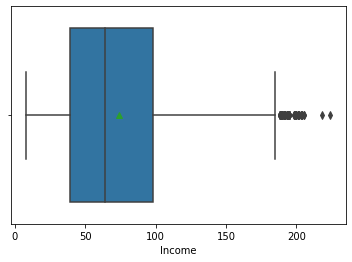

In [74]:
# Use boxplot to see distribution for Income, before outlier treatment

sns.boxplot(data=df,x='Income', showmeans=True)
plt.show()

In [75]:
# Calculate quantile and IQR values for Income

Temp_v = 'Income'
Temp_q1_Income = df[Temp_v].quantile(0.25)
Temp_q2_Income = df[Temp_v].quantile(0.5)
Temp_q3_Income = df[Temp_v].quantile(0.75)
Temp_iqr_Income = Temp_q3_Income-Temp_q1_Income

print('Median for' , Temp_v , 'is: ', Temp_q2_Income)
print('1st Quartile for' , Temp_v , 'is: ', Temp_q1_Income)
print('3rd Quartile for' , Temp_v,  'is: ', Temp_q3_Income)
print('IQR for' , Temp_v , 'is: ', Temp_iqr_Income, '\n')

Median for Income is:  64.0
1st Quartile for Income is:  39.0
3rd Quartile for Income is:  98.0
IQR for Income is:  59.0 



In [76]:
# Check on outliers

Temp_upper_whisker_Income = Temp_q3_Income + (1.5 * Temp_iqr_Income)

print('Upper Whisker for', Temp_v , 'is: ', Temp_upper_whisker_Income, '\n')
print('Records above Upper Whisker are \n')
df[df[Temp_v] > Temp_upper_whisker_Income].sort_values(by='Income', ascending=False)

Upper Whisker for Income is:  186.5 

Records above Upper Whisker are 



Age  Experience  Income ZIPCode  Family   CCAvg  Education  Mortgage  \
3896   48          24     224  Others       2  6.6700          1         0   
4993   45          21     218  Others       2  6.6700          1         0   
526    26           2     205   93106       1  6.3300          1       271   
2988   46          21     205  Others       2  8.8000          1       181   
4225   43          18     204  Others       2  8.8000          1         0   
677    46          21     204  Others       2  2.8000          1         0   
2278   30           4     204  Others       2  4.5000          1         0   
3804   47          22     203  Others       2  8.8000          1         0   
2101   35           5     203  Others       1 10.0000          3         0   
787    45          15     202  Others       3 10.0000          3         0   
3608   59          35     202   94025       1  4.7000          1       553   
4895   45          20     201  Others       2  2.8000          1         0   
2337   43          16     201  Others       1 10.0000          2         0   
2447   44          19     201  Others       2  8.8000          1         0   
1901   43          19     201   94305       2  6.6700          1         0   
1711   27           3     201  Others       1  6.3300          1       158   
1716   32           8     200  Others       2  6.5000          1       565   
459    35          10     200  Others       2  3.0000          1       458   
917    45          20     200  Others       2  8.8000          1         0   
4659   28           4     199  Others       1  6.3300          1         0   
3758   47          23     199   94720       2  6.6700          1         0   
4606   44          20     199  Others       2  6.6700          1         0   
1704   46          22     198  Others       2  6.6700          1         0   
2319   34           9     198  Others       2  3.0000          1       422   
3124   45          20     198  Others       2  2.8000          1         0   
4282   26           0     195  Others       3  6.3300          3         0   
740    52          27     195  Others       1  8.1000          1         0   
2753   54          27     195  Others       2  4.7500          2       477   
2934   37          13     195  Others       2  6.5000          1       635   
2956   62          38     195  Others       4  5.2000          3       522   
914    65          41     195   91711       3  0.4000          1         0   
4981   34           9     195  Others       2  3.0000          1       122   
3483   60          36     195  Others       1  4.7000          1         0   
4484   36          11     195  Others       2  3.0000          1         0   
1552   29           5     195  Others       1  4.3000          1         0   
1432   26           2     195  Others       1  6.3300          1         0   
1067   50          24     195  Others       1  1.7000          1         0   
1307   26           2     195  Others       1  6.3300          1         0   
303    49          25     195  Others       4  3.0000          1       617   
4122   56          30     195  Others       1  2.9000          1         0   
3543   37          11     194  Others       2  0.0000          1         0   
3568   30           4     194  Others       2  4.5000          1         0   
4670   52          26     194   94305       1  1.7000          1         0   
1824   49          23     194  Others       4  8.3000          2         0   
1277   45          20     194  Others       2  8.8000          1       428   
782    54          30     194  Others       3  6.0000          3       587   
4267   52          26     194  Others       2  5.7000          2         0   
47     37          12     194  Others       4  0.2000          3       211   
4574   35          11     193  Others       2  6.5000          1         0   
4156   37          12     193  Others       1  8.6000          1         0   
18     46          21     19

In [77]:
del Temp_v
del Temp_q1_Income
del Temp_q2_Income
del Temp_q3_Income
del Temp_iqr_Income
del Temp_upper_whisker_Income

Above records seem legit. Most have significant experience and education, so Income values do not appear to be incorrect. Maximum value is 224,000, so there are no values that are absurd. Not treating these values.

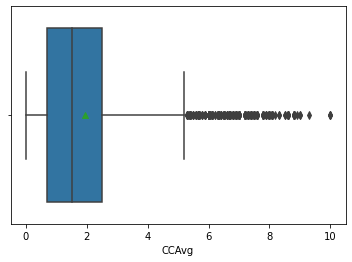

In [78]:
# Use boxplot to see distribution for CCAvg, before outlier treatment

sns.boxplot(data=df,x='CCAvg', showmeans=True)
plt.show()

In [79]:
# Calculate quantile and IQR values for CCAvg

Temp_v = 'CCAvg'
Temp_q1_CCAvg = df[Temp_v].quantile(0.25)
Temp_q2_CCAvg = df[Temp_v].quantile(0.5)
Temp_q3_CCAvg = df[Temp_v].quantile(0.75)
Temp_iqr_CCAvg = Temp_q3_CCAvg-Temp_q1_CCAvg

print('Median for' , Temp_v , 'is: ', Temp_q2_CCAvg)
print('1st Quartile for' , Temp_v , 'is: ', Temp_q1_CCAvg)
print('3rd Quartile for' , Temp_v,  'is: ', Temp_q3_CCAvg)
print('IQR for' , Temp_v , 'is: ', Temp_iqr_CCAvg, '\n')

Median for CCAvg is:  1.5
1st Quartile for CCAvg is:  0.7
3rd Quartile for CCAvg is:  2.5
IQR for CCAvg is:  1.8 



In [80]:
# Check on outliers for CCAvg

Temp_upper_whisker_CCAvg = Temp_q3_CCAvg + (1.5 * Temp_iqr_CCAvg)

print('Upper Whisker for', Temp_v , 'is: ', Temp_upper_whisker_CCAvg, '\n')
print('Records above Upper Whisker are \n')
df[df[Temp_v] > Temp_upper_whisker_CCAvg].sort_values(by='CCAvg', ascending=False)

Upper Whisker for CCAvg is:  5.2 

Records above Upper Whisker are 



Age  Experience  Income ZIPCode  Family   CCAvg  Education  Mortgage  \
2337   43          16     201  Others       1 10.0000          2         0   
787    45          15     202  Others       3 10.0000          3         0   
2101   35           5     203  Others       1 10.0000          3         0   
3943   61          36     188  Others       1  9.3000          2         0   
3822   63          33     178  Others       4  9.0000          3         0   
...   ...         ...     ...     ...     ...     ...        ...       ...   
3368   45          18     163   94720       3  5.3300          2         0   
1768   43          18     128  Others       4  5.3000          1        84   
4470   44          20     111  Others       2  5.3000          2         0   
4980   29           5     135  Others       3  5.3000          1         0   
351    28           4     155  Others       4  5.3000          2         0   

      Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  
2337              1                   0           0       0           1  
787               1                   0           0       0           0  
2101              1                   0           0       0           0  
3943              1                   0           0       0           0  
3822              1                   0           0       0           0  
...             ...                 ...         ...     ...         ...  
3368              1                   0           1       0           1  
1768              1                   0           0       0           0  
4470              1                   0           0       1           0  
4980              1                   0           1       1           1  
351               1                   0           0       1           0  

[324 rows x 13 columns]

In [81]:
del Temp_v
del Temp_q1_CCAvg
del Temp_q2_CCAvg
del Temp_q3_CCAvg
del Temp_iqr_CCAvg
del Temp_upper_whisker_CCAvg

Above records seem legit. Credit card spending of $10,000 is not uncommon, especially with higher incomes. Not treating these values.

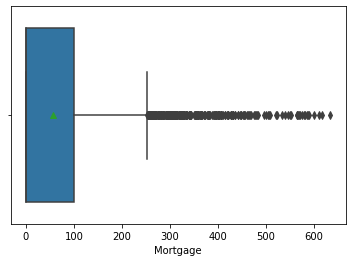

In [82]:
# Use boxplot to see distribution for Mortgage, before outlier treatment

sns.boxplot(data=df,x='Mortgage', showmeans=True)
plt.show()

In [83]:
# Calculate quantile and IQR values for Mortgage

Temp_v = 'Mortgage'
Temp_q1_Mortgage = df[Temp_v].quantile(0.25)
Temp_q2_Mortgage = df[Temp_v].quantile(0.5)
Temp_q3_Mortgage = df[Temp_v].quantile(0.75)
Temp_iqr_Mortgage = Temp_q3_Mortgage-Temp_q1_Mortgage

print('Median for' , Temp_v , 'is: ', Temp_q2_Mortgage)
print('1st Quartile for' , Temp_v , 'is: ', Temp_q1_Mortgage)
print('3rd Quartile for' , Temp_v,  'is: ', Temp_q3_Mortgage)
print('IQR for' , Temp_v , 'is: ', Temp_iqr_Mortgage, '\n')

Median for Mortgage is:  0.0
1st Quartile for Mortgage is:  0.0
3rd Quartile for Mortgage is:  101.0
IQR for Mortgage is:  101.0 



In [84]:
# Check on outliers for Mortgage

Temp_upper_whisker_Mortgage  = Temp_q3_Mortgage + (1.5 * Temp_iqr_Mortgage)

print('Upper Whisker for', Temp_v , 'is: ', Temp_upper_whisker_Mortgage, '\n')
print('Records above Upper Whisker are \n')
df[df[Temp_v] > Temp_upper_whisker_Mortgage].sort_values(by='Mortgage', ascending=False)

Upper Whisker for Mortgage is:  252.5 

Records above Upper Whisker are 



Age  Experience  Income ZIPCode  Family  CCAvg  Education  Mortgage  \
2934   37          13     195  Others       2 6.5000          1       635   
303    49          25     195  Others       4 3.0000          1       617   
4812   29           4     184  Others       4 2.2000          3       612   
1783   53          27     192   94720       1 1.7000          1       601   
4842   49          23     174  Others       3 4.6000          2       590   
...   ...         ...     ...     ...     ...    ...        ...       ...   
1522   25           1     101   94720       4 2.3000          3       256   
3950   38          14      62  Others       1 1.5000          3       255   
2159   61          35      99  Others       1 4.8000          3       255   
3138   36          11     103  Others       1 4.6000          1       255   
3948   37          12     123  Others       4 3.1000          2       253   

      Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  
2934              0                   0           0       1           0  
303               1                   0           0       0           0  
4812              1                   0           0       1           0  
1783              0                   0           0       1           0  
4842              1                   0           0       0           0  
...             ...                 ...         ...     ...         ...  
1522              0                   0           0       0           1  
3950              0                   0           0       1           0  
2159              1                   0           0       0           1  
3138              0                   0           0       1           0  
3948              1                   0           1       1           1  

[291 rows x 13 columns]

In [85]:
del Temp_v
del Temp_q1_Mortgage
del Temp_q2_Mortgage
del Temp_q3_Mortgage
del Temp_iqr_Mortgage
del Temp_upper_whisker_Mortgage

## 9c. Feature Engineering

Dummy Variable for ZIPCode


In [86]:
# Check shape of the data before One Hot Encoding

print(" Rows:", df.shape[0], '\n', "Columns:" , df.shape[1])

 Rows: 5000 
 Columns: 13


In [87]:
# One Hot Encoding of categorical features

df = pd.get_dummies(df, columns=['ZIPCode'], drop_first=True)



In [88]:
# Check shape of the data after One Hot Encoding

print(" Rows:", df.shape[0], '\n', "Columns:" , df.shape[1])

 Rows: 5000 
 Columns: 22


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   Family              5000 non-null   int64  
 4   CCAvg               5000 non-null   float64
 5   Education           5000 non-null   int64  
 6   Mortgage            5000 non-null   int64  
 7   Personal_Loan       5000 non-null   int64  
 8   Securities_Account  5000 non-null   int64  
 9   CD_Account          5000 non-null   int64  
 10  Online              5000 non-null   int64  
 11  CreditCard          5000 non-null   int64  
 12  ZIPCode_91320       5000 non-null   uint8  
 13  ZIPCode_91711       5000 non-null   uint8  
 14  ZIPCode_92037       5000 non-null   uint8  
 15  ZIPCode_93106       5000 non-null   uint8  
 16  ZIPCod

In [90]:
df.sample(10, random_state=1)

Age  Experience  Income  Family  CCAvg  Education  Mortgage  \
2764   31           5      84       1 2.9000          3       105   
4767   35           9      45       3 0.9000          1       101   
3814   34           9      35       3 1.3000          1         0   
3499   49          23     114       1 0.3000          1       286   
2735   36          12      70       3 2.6000          2       165   
3922   31           4      20       4 1.5000          2         0   
2701   50          26      55       1 1.6000          2         0   
1179   36          11      98       3 1.2000          3         0   
932    51          27     112       3 1.8000          2         0   
792    41          16      98       1 4.0000          3         0   

      Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  \
2764              0                   0           0       0           1   
4767              0                   1           0       0           0   
3814              0                   0           0       0           0   
3499              0                   0           0       1           0   
2735              0                   0           0       1           0   
3922              0                   0           0       1           0   
2701              0                   0           0       1           0   
1179              0                   1           0       0           1   
932               0                   1           1       1           1   
792               0                   0           0       0           1   

      ZIPCode_91320  ZIPCode_91711  ZIPCode_92037  ZIPCode_93106  \
2764              1              0              0              0   
4767              0              0              0              0   
3814              0              0              0              0   
3499              0              0              0              0   
2735              0              0              0              0   
3922              0              0              0              0   
2701              0              0              0              0   
1179              0              0              0              0   
932               0              0              0              0   
792               0              0              0              0   

      ZIPCode_93943  ZIPCode_94025  ZIPCode_94305  ZIPCode_94720  \
2764              0              0              0              0   
4767              0              0              0              0   
3814              0              0              0              0   
3499              0              0              0              0   
2735              0              0              0              0   
3922              0              0              0              0   
2701              0              0              1              0   
1179              0              0              0              0   
932               0              0              0              1   
792               0              0              0              0   

      ZIPCode_95616  ZIPCode_Others  
2764              0               0  
4767              0               1  
3814              0               1  
3499              0               1  
2735              0               1  
3922              1               0  
2701              0               0  
1179              0               1  
932               0               0  
792               0               1

## 9d. Feature Scaling

We will use Powertransformer to transform the data that's non-normal.

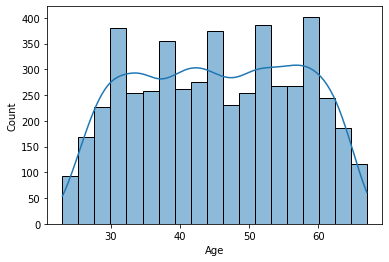

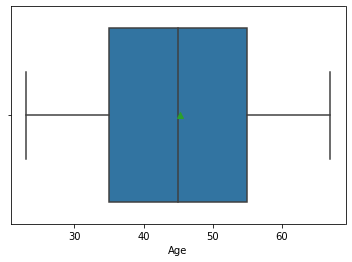

In [91]:
# Use histplots to see distribution for Age Before scaling

sns.histplot(data=df,x='Age', kde=True)
plt.show()

sns.boxplot(data=df,x='Age', showmeans=True)
plt.show()

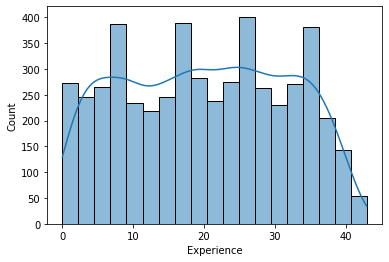

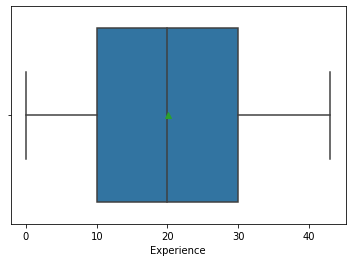

In [92]:
# Use histplots to see distribution for Experience

sns.histplot(data=df,x='Experience', kde=True)
plt.show()

sns.boxplot(data=df,x='Experience', showmeans=True)
plt.show()

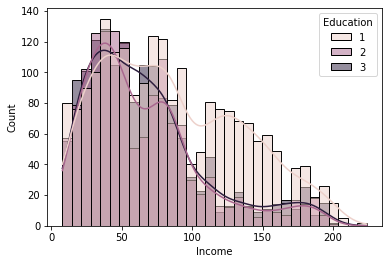

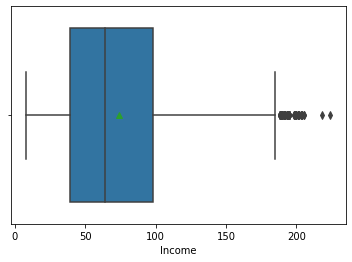

In [93]:
# Use histplots to see distribution for Mortgage

sns.histplot(data=df,x='Income', hue='Education',  kde=True)
plt.show()

sns.boxplot(data=df,x='Income', showmeans=True)
plt.show()

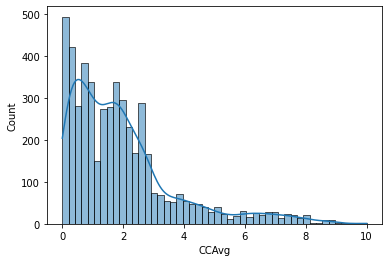

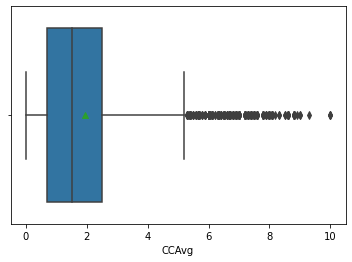

In [94]:
# Use histplots to see distribution for CCAvg

sns.histplot(data=df,x='CCAvg', kde=True)
plt.show()

sns.boxplot(data=df,x='CCAvg', showmeans=True)
plt.show()

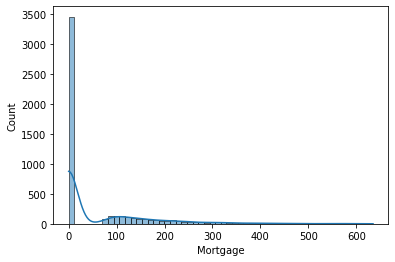

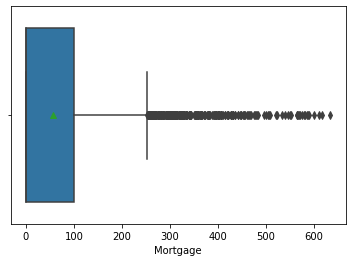

In [95]:
# Use histplots to see distribution for Mortgage

sns.histplot(data=df,x='Mortgage', kde=True)
plt.show()

sns.boxplot(data=df,x='Mortgage', showmeans=True)
plt.show()

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   Family              5000 non-null   int64  
 4   CCAvg               5000 non-null   float64
 5   Education           5000 non-null   int64  
 6   Mortgage            5000 non-null   int64  
 7   Personal_Loan       5000 non-null   int64  
 8   Securities_Account  5000 non-null   int64  
 9   CD_Account          5000 non-null   int64  
 10  Online              5000 non-null   int64  
 11  CreditCard          5000 non-null   int64  
 12  ZIPCode_91320       5000 non-null   uint8  
 13  ZIPCode_91711       5000 non-null   uint8  
 14  ZIPCode_92037       5000 non-null   uint8  
 15  ZIPCode_93106       5000 non-null   uint8  
 16  ZIPCod

In [97]:
# Transform numeric data with PowerTransformer. This includes Standardization as well
#PowerTransformer is used to make the data distribution more-Normal and standardize the result, centering the values on the mean value of 0 and a standard deviation of 1.0.

#Can't use BoxCox as all values are not positive
#pt = PowerTransformer(method='box-cox')


#Tried using this, however, did not make much difference in the results in terms of F1-Scores for the models
# We will use default yeo-johnson
#pt = PowerTransformer()

# df[['Age']] = pt.fit_transform(df[['Age']])
# df[['Experience']] = pt.fit_transform(df[['Experience']])
# df[['Income']] = pt.fit_transform(df[['Income']])
# df[['CCAvg']] = pt.fit_transform(df[['CCAvg']])
# df[['Mortgage']] = pt.fit_transform(df[['Mortgage']])

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   Family              5000 non-null   int64  
 4   CCAvg               5000 non-null   float64
 5   Education           5000 non-null   int64  
 6   Mortgage            5000 non-null   int64  
 7   Personal_Loan       5000 non-null   int64  
 8   Securities_Account  5000 non-null   int64  
 9   CD_Account          5000 non-null   int64  
 10  Online              5000 non-null   int64  
 11  CreditCard          5000 non-null   int64  
 12  ZIPCode_91320       5000 non-null   uint8  
 13  ZIPCode_91711       5000 non-null   uint8  
 14  ZIPCode_92037       5000 non-null   uint8  
 15  ZIPCode_93106       5000 non-null   uint8  
 16  ZIPCod

Note - Tried using this power transformation, however, did not make much difference in the results in terms of F1-Scores for the models. Hence, the code is commented

# 10. Prepare TRAIN and TEST datasets

Separate TRAIN and TEST datasets from TOTAL dataset in 70 / 30 proportion. 

In [99]:
# Let's separate data for TRAIN and TEST in the prportion of 70 / 30

df_train, df_test = train_test_split(df , test_size = 0.3, random_state= 10)

In [100]:
# Check sample records for TRAIN

df_train.sample(10, random_state=1)

Age  Experience  Income  Family  CCAvg  Education  Mortgage  \
1932   64          39      73       3 2.4000          1       185   
4880   56          32      79       3 2.6700          1         0   
4187   30           5     109       4 2.2000          2       103   
72     44          20     130       1 5.0000          1         0   
1452   54          28      52       4 2.5000          1         0   
711    62          37      83       3 1.8000          2       187   
4416   49          25       8       1 0.3000          1        97   
4305   26           1      54       2 1.6000          3         0   
1677   34          10      42       1 1.5000          2       131   
25     43          19      29       3 0.5000          1        97   

      Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  \
1932              0                   0           0       0           0   
4880              0                   0           0       1           0   
4187              0                   0           0       0           1   
72                0                   0           0       0           1   
1452              0                   0           0       1           0   
711               0                   1           0       0           0   
4416              0                   0           0       0           0   
4305              0                   1           0       0           0   
1677              0                   0           0       0           0   
25                0                   0           0       1           0   

      ZIPCode_91320  ZIPCode_91711  ZIPCode_92037  ZIPCode_93106  \
1932              0              0              0              0   
4880              0              0              1              0   
4187              0              0              0              0   
72                0              0              0              0   
1452              0              0              0              0   
711               0              0              0              0   
4416              0              0              0              0   
4305              0              0              0              0   
1677              0              0              0              0   
25                0              0              0              0   

      ZIPCode_93943  ZIPCode_94025  ZIPCode_94305  ZIPCode_94720  \
1932              0              0              0              0   
4880              0              0              0              0   
4187              0              0              1              0   
72                0              0              0              0   
1452              0              0              0              0   
711               0              0              0              0   
4416              0              0              0              1   
4305              0              0              0              0   
1677              0              0              0              0   
25                0              0              1              0   

      ZIPCode_95616  ZIPCode_Others  
1932              0               1  
4880              0               0  
4187              0               0  
72                0               1  
1452              0               1  
711               0               1  
4416              0               0  
4305              0               1  
1677              0               1  
25                0               0

In [101]:
# Check sample records for TEST

df_test.sample(10, random_state=1)

Age  Experience  Income  Family  CCAvg  Education  Mortgage  \
1303   29           5     112       2 2.0000          2       382   
2541   34           8     171       2 2.2000          2       569   
2952   33           8     182       1 8.6000          1         0   
2304   27           2     170       3 4.7000          1         0   
87     48          22      78       3 1.1000          1         0   
980    38          13     114       1 1.0000          3         0   
1174   36          10      42       4 1.2000          2         0   
1583   61          36     184       4 2.3000          2       342   
4257   43          17      48       3 2.2000          2         0   
4367   40          15     149       2 3.9000          1       319   

      Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  \
1303              0                   1           0       0           0   
2541              1                   0           0       1           0   
2952              0                   0           0       0           0   
2304              1                   0           0       1           0   
87                0                   0           0       1           0   
980               0                   0           0       1           1   
1174              0                   0           0       1           1   
1583              1                   0           1       1           1   
4257              0                   0           0       0           1   
4367              0                   0           0       1           1   

      ZIPCode_91320  ZIPCode_91711  ZIPCode_92037  ZIPCode_93106  \
1303              0              0              0              0   
2541              0              0              0              0   
2952              0              0              0              0   
2304              0              0              0              0   
87                0              0              0              0   
980               0              0              0              0   
1174              0              0              0              1   
1583              0              0              0              0   
4257              0              0              0              0   
4367              0              0              0              0   

      ZIPCode_93943  ZIPCode_94025  ZIPCode_94305  ZIPCode_94720  \
1303              0              0              0              1   
2541              0              0              0              0   
2952              0              0              0              0   
2304              0              0              0              0   
87                0              0              1              0   
980               0              0              0              0   
1174              0              0              0              0   
1583              0              0              0              0   
4257              0              0              0              0   
4367              0              0              0              0   

      ZIPCode_95616  ZIPCode_Others  
1303              0               0  
2541              0               1  
2952              0               1  
2304              0               1  
87                0               0  
980               0               1  
1174              0               0  
1583              0               1  
4257              0               1  
4367              0               1

In [102]:
# Shapes of TOTAL, TRAIN and TEST Datasets 

print(" TOTAL Dataset \n Rows:", df.shape[0], '\n', "Columns:" , df.shape[1], "\n")

print(" TRAIN Dataset \n Rows:", df_train.shape[0], '\n', "Columns:" , df_train.shape[1], "\n")

print(" TRAIN Dataset \n Rows:", df_test.shape[0], '\n', "Columns:" , df_test.shape[1], "\n")

 TOTAL Dataset 
 Rows: 5000 
 Columns: 22 

 TRAIN Dataset 
 Rows: 3500 
 Columns: 22 

 TRAIN Dataset 
 Rows: 1500 
 Columns: 22 



In [103]:
# Shapes of TOTAL, TRAIN and TEST Datasets for Personal_Loan values

print(" For TOTAL Dataset \n", df['Personal_Loan'].value_counts(), '\n')

print(" For TRAIN Dataset \n", df_train['Personal_Loan'].value_counts(), '\n')

print(" For TEST Dataset \n", df_test['Personal_Loan'].value_counts(), '\n')

 For TOTAL Dataset 
 0    4520
1     480
Name: Personal_Loan, dtype: int64 

 For TRAIN Dataset 
 0    3160
1     340
Name: Personal_Loan, dtype: int64 

 For TEST Dataset 
 0    1360
1     140
Name: Personal_Loan, dtype: int64 



In [104]:
# Printing the count of unique category feature values in TRAIN

Temp_cat_cols = ['Education','Securities_Account', 'CD_Account','Online','CreditCard']

print(f'Category features in TRAIN Dataset \n')
for column in Temp_cat_cols:
    print(f'For {column} - there are {df_train[column].nunique()} distinct values')
    print(f'Values are {df_train[column].unique()}')
    print("-" * 50)

Category features in TRAIN Dataset 

For Education - there are 3 distinct values
Values are [1 2 3]
--------------------------------------------------
For Securities_Account - there are 2 distinct values
Values are [0 1]
--------------------------------------------------
For CD_Account - there are 2 distinct values
Values are [0 1]
--------------------------------------------------
For Online - there are 2 distinct values
Values are [1 0]
--------------------------------------------------
For CreditCard - there are 2 distinct values
Values are [1 0]
--------------------------------------------------


In [105]:
# Printing the count of unique category feature values in TEST

print(f'Category features in TEST Dataset \n')
for column in Temp_cat_cols:
    print(f'For {column} - there are {df_test[column].nunique()} distinct values')
    print(f'Values are {df_test[column].unique()}')
    print("-" * 50)

Category features in TEST Dataset 

For Education - there are 3 distinct values
Values are [2 1 3]
--------------------------------------------------
For Securities_Account - there are 2 distinct values
Values are [0 1]
--------------------------------------------------
For CD_Account - there are 2 distinct values
Values are [0 1]
--------------------------------------------------
For Online - there are 2 distinct values
Values are [0 1]
--------------------------------------------------
For CreditCard - there are 2 distinct values
Values are [0 1]
--------------------------------------------------


In [106]:
# Separate dependent and independent features

# independant features
X_train = df_train.drop('Personal_Loan', axis=1)
X_test = df_test.drop('Personal_Loan', axis=1)

# Dependent variable
y_train = df_train['Personal_Loan']
y_test = df_test['Personal_Loan']

In [107]:
X_test.sample(5)


Age  Experience  Income  Family  CCAvg  Education  Mortgage  \
1783   53          27     192       1 1.7000          1       601   
4072   42          17      78       1 1.0000          3         0   
3381   39          15     143       1 3.5000          1         0   
3499   49          23     114       1 0.3000          1       286   
850    46          20      39       1 0.2000          1         0   

      Securities_Account  CD_Account  Online  CreditCard  ZIPCode_91320  \
1783                   0           0       1           0              0   
4072                   0           0       1           0              0   
3381                   0           0       1           1              0   
3499                   0           0       1           0              0   
850                    0           0       0           0              0   

      ZIPCode_91711  ZIPCode_92037  ZIPCode_93106  ZIPCode_93943  \
1783              0              0              0              0   
4072              0              0              0              0   
3381              1              0              0              0   
3499              0              0              0              0   
850               0              0              0              0   

      ZIPCode_94025  ZIPCode_94305  ZIPCode_94720  ZIPCode_95616  \
1783              0              0              1              0   
4072              0              0              0              0   
3381              0              0              0              0   
3499              0              0              0              0   
850               0              0              0              0   

      ZIPCode_Others  
1783               0  
4072               1  
3381               0  
3499               1  
850                1

In [108]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1500 entries, 245 to 1555
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 1500 non-null   int64  
 1   Experience          1500 non-null   int64  
 2   Income              1500 non-null   int64  
 3   Family              1500 non-null   int64  
 4   CCAvg               1500 non-null   float64
 5   Education           1500 non-null   int64  
 6   Mortgage            1500 non-null   int64  
 7   Securities_Account  1500 non-null   int64  
 8   CD_Account          1500 non-null   int64  
 9   Online              1500 non-null   int64  
 10  CreditCard          1500 non-null   int64  
 11  ZIPCode_91320       1500 non-null   uint8  
 12  ZIPCode_91711       1500 non-null   uint8  
 13  ZIPCode_92037       1500 non-null   uint8  
 14  ZIPCode_93106       1500 non-null   uint8  
 15  ZIPCode_93943       1500 non-null   uint8  
 16  ZIPC

In [109]:
del Temp_cat_cols

Number of distinct values for category-like features is equal in TRAIN and TEST. So no action is required. If there was a difference, we might have removed categories missing in TEST from TRAIN dataset as well.

TRAIN and TEST have proportionate records for Personal_Loan = 1.

TRAIN and TEST Datasets are ready now.

# 11. Build and Evaluate Logistic Regression Model

## 11a. Build the model

In [110]:
# Build logistic regression model

# Tried using both solvers below, newton-cg gave better results

lg = LogisticRegression(solver="newton-cg", random_state=1)

#lg = LogisticRegression(solver="liblinear", random_state=1)

lg.fit(X_train, y_train)

LogisticRegression(random_state=1, solver='newton-cg')

In [111]:
# let us check the coefficients and intercept of the model

coef_df = pd.DataFrame(
    np.append(lg.coef_, lg.intercept_),
    index=X_train.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)
coef_df.T

Age  Experience  Income  Family  CCAvg  Education  Mortgage  \
Coefficients -0.0104      0.0208  0.0552  0.6901 0.1061     1.6618    0.0002   

              Securities_Account  CD_Account  Online  CreditCard  \
Coefficients             -0.5259      3.2217 -0.6743     -0.9347   

              ZIPCode_91320  ZIPCode_91711  ZIPCode_92037  ZIPCode_93106  \
Coefficients        -0.3622         0.1384         0.2480         0.0730   

              ZIPCode_93943  ZIPCode_94025  ZIPCode_94305  ZIPCode_94720  \
Coefficients        -0.3175        -0.4693         0.5829         0.6108   

              ZIPCode_95616  ZIPCode_Others  Intercept  
Coefficients        -0.2297          0.1317   -13.2086

Coefficient Interpretations

Positive values for Experience, Income, Family, CCAvg, Education, CD_Account and few ZIPCode related features. Increase in these feature values will increase chances of person availing loan (Personal_Loan = 1).

Negative values for Age, Securities_Account, Online, CreditCard and few ZIPCode related features. Increase in these feature values will decrease chances of person availing loan (Personal_Loan = 1).


The coefficients of the logistic regression model are in terms of log(odd). 

To find the odds we have to take the exponential of the coefficients.
Therefore, odds = exp(b)

The percentage change in odds is given as odds = (exp(b) - 1) * 100

In [112]:
# converting coefficients to odds
odds = np.exp(lg.coef_[0])

# finding the percentage change
perc_change_odds = (np.exp(lg.coef_[0]) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=X_train.columns).T

Age  Experience  Income  Family   CCAvg  Education  Mortgage  \
Odds         0.9896      1.0210  1.0567  1.9939  1.1120     5.2689    1.0002   
Change_odd% -1.0367      2.0991  5.6742 99.3857 11.1988   426.8927    0.0152   

             Securities_Account  CD_Account   Online  CreditCard  \
Odds                     0.5910     25.0707   0.5095      0.3927   
Change_odd%            -40.9005   2407.0658 -49.0464    -60.7282   

             ZIPCode_91320  ZIPCode_91711  ZIPCode_92037  ZIPCode_93106  \
Odds                0.6961         1.1484         1.2815         1.0757   
Change_odd%       -30.3851        14.8386        28.1475         7.5735   

             ZIPCode_93943  ZIPCode_94025  ZIPCode_94305  ZIPCode_94720  \
Odds                0.7280         0.6254         1.7912         1.8420   
Change_odd%       -27.2016       -37.4563        79.1241        84.1963   

             ZIPCode_95616  ZIPCode_Others  
Odds                0.7947          1.1408  
Change_odd%       -20.5260         14.0765

Coefficient Interpretations

Income: Holding all other features constant a 1 unit change in Income will 
increase the odds of a person availing personal loan by 39 times or a 3822% increase in odds of a person availing loan.

CreditCard: Holding all other features constant a 1 unit change in CreditCard will decrease the odds of a person availing personal loan by 0.38 times or a 61% decrease in odds of a person availing loan.

All other features coefficients interpreted similarly.

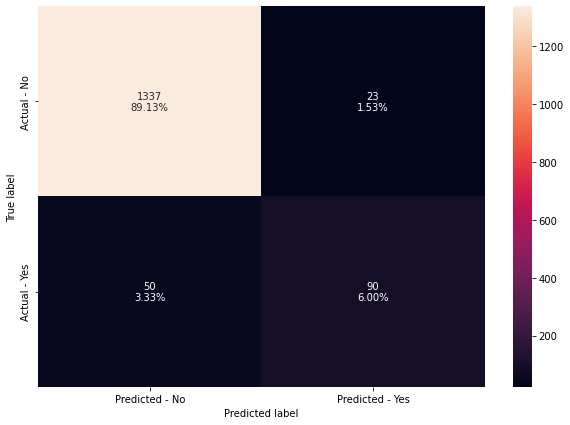

In [113]:
# Confusion Matrix for TEST

make_confusion_matrix(lg,y_test)

In [114]:
# Check model's performance for TRAIN

log_reg_model_train_perf = model_performance_classification_sklearn_with_threshold(
    lg, X_train, y_train
)

print("Training performance:")
log_reg_model_train_perf

Training performance:


Accuracy  Recall  Precision     F1
0    0.9500  0.6353     0.8090 0.7117

In [115]:
# Check model's performance for TEST

log_reg_model_test_perf = model_performance_classification_sklearn_with_threshold(
    lg, X_test, y_test
)

print("Test set performance:")
log_reg_model_test_perf

Test set performance:


Accuracy  Recall  Precision     F1
0    0.9513  0.6429     0.7965 0.7115

## 11b. Logistic Regression Model - Performance Evaluation and Improvements

### Use ROC-AUC (Area Under Curve) to find best threshold

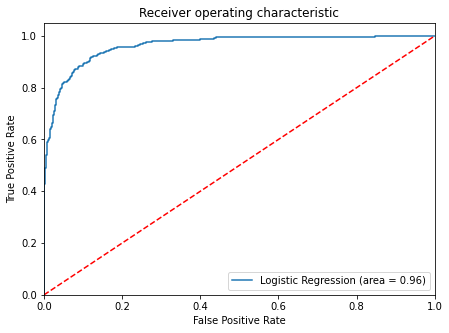

In [116]:
# This function provides AUC value for the TRAIN set. More AUC better the model
logit_roc_auc_train = roc_auc_score(y_train, lg.predict_proba(X_train)[:, 1])

# This gives values of TPR, FPR and various thresholds tried. 
#TPR = Same as Recall or Sensitivity. TP / (TP + FN). Number of correct positive predictions (TP) divided by the total number of positives (P)
#FPR = Specificity. TN / (TN + FP). Nnumber of correct negative predictions (TN) divided by the total number of negatives (N).
# Best curve or curve with highest AUC will have highest difference between TPR and FPR.
#This function will try various thresholds , calculate TPR and FPR for each and plot the curve

fpr, tpr, thresholds = roc_curve(y_train, lg.predict_proba(X_train)[:, 1])

plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

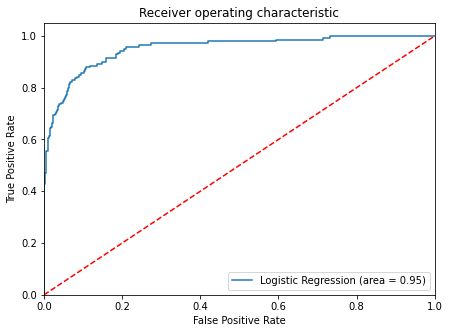

In [117]:
# This function roc_auc_score provides AUC value for the TEST set. More AUC better the model

logit_roc_auc_test = roc_auc_score(y_test, lg.predict_proba(X_test)[:, 1])

# This gives values of TPR, FPR and various thresholds tried. 
#TPR = Same as Recall or Sensitivity. TP / (TP + FN). Number of correct positive predictions (TP) divided by the total number of positives (P)
#FPR = FP / (TN + FP).  Number of incorrect positive predictions (FP) divided by the total number of negatives (N).
# Best curve or curve with highest AUC will have highest difference between TPR and FPR.
#This function will try various thresholds , calculate TPR and FPR for each and plot the curve

fpr, tpr, thresholds = roc_curve(y_test, lg.predict_proba(X_test)[:, 1])
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_test)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

AUC on TRAIN is 0.97, on TEST is 0.96. Model is not overfitting / underfitting and is generalized. Max possible value for AUC is 1, so this is a good model.

In [118]:
# Let's find Optimal threshold as per best AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low , difference is the highest
# roc_curve returns the dataframe of fpr, tpr, thresholds

fpr, tpr, thresholds = roc_curve(y_train, lg.predict_proba(X_train)[:, 1])

#find index value in the frame for a record where tpr - fpr is highest
optimal_idx = np.argmax(tpr - fpr)

#get threshold value corresponding to index value found above
optimal_threshold_auc_roc = thresholds[optimal_idx]

print(optimal_threshold_auc_roc)

0.08518707242075094


In [119]:
# checking model performance for this model on TRAIN

log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_sklearn_with_threshold(
    lg, X_train, y_train, threshold=optimal_threshold_auc_roc
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


Accuracy  Recall  Precision     F1
0    0.8829  0.9147     0.4494 0.6027

In [120]:
# checking model performance for this model on TEST
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_sklearn_with_threshold(
    lg, X_test, y_test, threshold=optimal_threshold_auc_roc
)
print("TEST set performance:")
log_reg_model_test_perf_threshold_auc_roc

TEST set performance:


Accuracy  Recall  Precision     F1
0    0.8580  0.8929     0.3870 0.5400

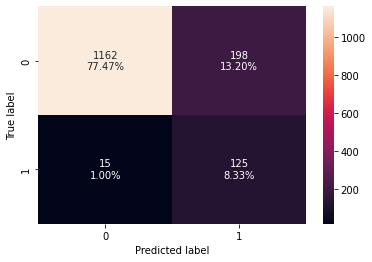

In [121]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(
    lg, X_test, y_test, threshold=optimal_threshold_auc_roc
)

Metrics comparisons for TEST dataset

On Model with default threshold (0.5) - ACC = 0.9573	RECALL = 0.6714	PREC = 0.8393	F1 = 0.7460

On Model with best threshold per ROC-AUC (0.09734156851603028) - ACC = 0.8733	RECALL = 0.9143	PREC = 0.4183	F1 = 0.5740

By reducing the threshold drastically from 0.5 to 0.0973, more customers will be reported as Class 1. This will improve Recall, but reduce Accuracy, Precision and F1.

### Use Precision-Recall curve to find best threshold

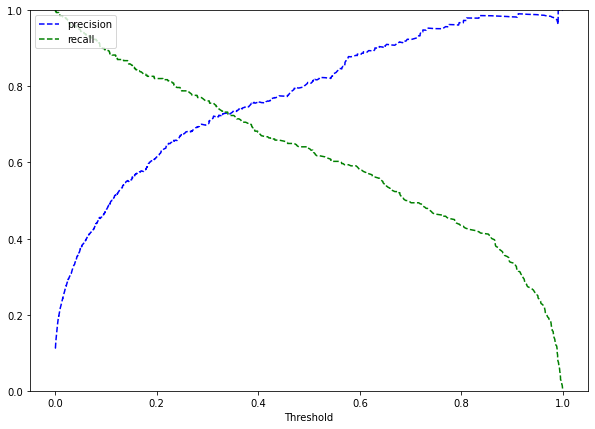

In [122]:
# This function gives values of Precision, Recall and various thresholds tried. 
#Precision is calculated as the number of correct positive predictions (TP) divided by the total number of positive predictions (TP + FP).

y_scores = lg.predict_proba(X_train)[:, 1]
prec, rec, tre = precision_recall_curve(y_train, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

In [123]:
# setting the threshold where pre and rec interect, to balance Precision and Recall
optimal_threshold_curve = 0.39

In [124]:
log_reg_model_train_perf_threshold_curve = model_performance_classification_sklearn_with_threshold(
    lg, X_train, y_train, threshold=optimal_threshold_curve
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve

Training performance:


Accuracy  Recall  Precision     F1
0    0.9486  0.6912     0.7581 0.7231

In [125]:
log_reg_model_test_perf_threshold_curve = model_performance_classification_sklearn_with_threshold(
    lg, X_test, y_test, threshold=optimal_threshold_curve
)
print("Test set performance:")
log_reg_model_test_perf_threshold_curve

Test set performance:


Accuracy  Recall  Precision     F1
0    0.9467  0.6929     0.7239 0.7080

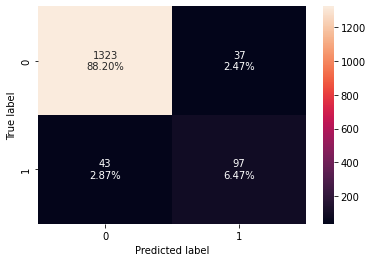

In [126]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(
    lg, X_test, y_test, threshold=optimal_threshold_curve
)

## 11c. Compare and Choose Best Logistic Regression Model

In [127]:
# Performance comparison on TRAIN

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression sklearn",
    "Logistic Regression-0.09 Threshold",
    "Logistic Regression-0.38 Threshold",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Logistic Regression sklearn  Logistic Regression-0.09 Threshold  \
Accuracy                        0.9500                              0.8829   
Recall                          0.6353                              0.9147   
Precision                       0.8090                              0.4494   
F1                              0.7117                              0.6027   

           Logistic Regression-0.38 Threshold  
Accuracy                               0.9486  
Recall                                 0.6912  
Precision                              0.7581  
F1                                     0.7231

In [128]:
# Performance comparison on TEST

models_test_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_curve.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression sklearn",
    "Logistic Regression-0.09 Threshold",
    "Logistic Regression-0.38 Threshold",
]
print("Test set performance comparison:")
models_test_comp_df



Test set performance comparison:


Logistic Regression sklearn  Logistic Regression-0.09 Threshold  \
Accuracy                        0.9513                              0.8580   
Recall                          0.6429                              0.8929   
Precision                       0.7965                              0.3870   
F1                              0.7115                              0.5400   

           Logistic Regression-0.38 Threshold  
Accuracy                               0.9467  
Recall                                 0.6929  
Precision                              0.7239  
F1                                     0.7080

Based on the above comparison, best Logistic Regression Model is one with Threshold = 0.38. This gives a model that is not overfitted. F1 Score on TEST dataset is closer to TRAIN dataset, but not over it.

# 12. Build and Evaluate Decision Tree Model


## 12a. Build Decision Tree

Build model using the DecisionTreeClassifier function.

Decision Tree with default options and all features

In [129]:
# Create default Decision Tree with default parameters

dtree_default = DecisionTreeClassifier(random_state=1)

# Fit the model with TRAIN data

dtree_default.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [130]:
# Some characteristics of the default model

print('Some characteristics of the default model: dtree_default')
print('Number of Features are : ', dtree_default.tree_.max_depth)
print('Max Depth is : ', dtree_default.tree_.max_depth)
print('Node Counts are :', dtree_default.tree_.node_count)
print('Leaf Node Counts are :', dtree_default.tree_.n_leaves)

Some characteristics of the default model: dtree_default
Number of Features are :  13
Max Depth is :  13
Node Counts are : 121
Leaf Node Counts are : 61


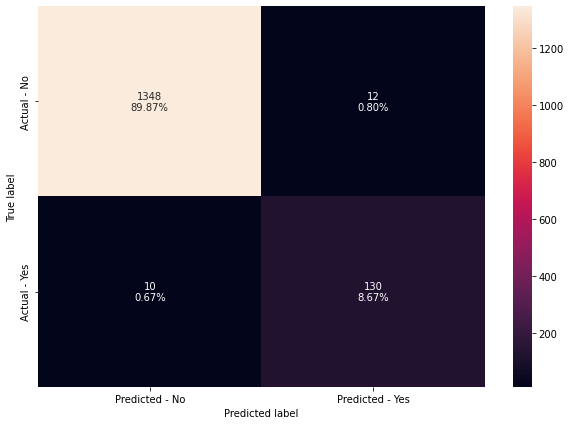

In [131]:
# Confusion Matrix for TEST

make_confusion_matrix(dtree_default,y_test)

In [132]:
# Print evaluation metrics from the model

print('Metrics for Default Model : dtree_default ')
print('Accuracy :')
get_accuracy_score(dtree_default)
print('*' *50, '\n')

print('Recall :')
get_recall_score(dtree_default)
print('*' *50, '\n')

print('Precision :')
get_precision_score(dtree_default)
print('*' *50, '\n')

print('F1 :')
get_f1_score(dtree_default)
print('*' *50, '\n')

Metrics for Default Model : dtree_default 
Accuracy :
Accuracy on TRAIN set: 1.0
Accuracy on TEST set: 0.9853333333333333
************************************************** 

Recall :
Recall on TRAIN set :  1.0
Recall on TEST set :  0.9285714285714286
************************************************** 

Precision :
Precision on TRAIN set :  1.0
Precision on TEST set :  0.9154929577464789
************************************************** 

F1 :
F1 on TRAIN set :  1.0
F1 on TEST set :  0.921985815602837
************************************************** 



In [133]:
# Compare models - default, with max depth, pre-pruned using Gridsearch and Post-pruned

print('Metrics for Default Model : dtree_default ')
comparison_frame = pd.DataFrame({'Metric':['Accuracy','Precision','Recall', 'F1'], 
                                 
                                 'TRAIN_Dataset':[dtree_default.score(X_train, y_train), 
                                                  metrics.precision_score(y_train,dtree_default.predict(X_train)), 
                                                  metrics.recall_score(y_train,dtree_default.predict(X_train)),
                                                  metrics.f1_score(y_train,dtree_default.predict(X_train))], 
                                                                  
                                 'TEST_Dataset':[dtree_default.score(X_test, y_test), 
                                                  metrics.precision_score(y_test,dtree_default.predict(X_test)), 
                                                  metrics.recall_score(y_test,dtree_default.predict(X_test)),
                                                  metrics.f1_score(y_test,dtree_default.predict(X_test))]
                                 }) 
#comparison_frame = pd.DataFrame({'Model':['Default decision tree model','Decision tree with restricted maximum depth','Decision treee with hyperparameter tuning',
 #                                        'Decision tree with post-pruning'], 'Train_Recall':[1,0.53,0.50,0.63], 'Test_Recall':[0.46,0.46,0.46,0.56]}) 
comparison_frame

Metrics for Default Model : dtree_default 


Metric  TRAIN_Dataset  TEST_Dataset
0   Accuracy         1.0000        0.9853
1  Precision         1.0000        0.9155
2     Recall         1.0000        0.9286
3         F1         1.0000        0.9220

In [134]:
feature_names = list(df.columns)
feature_names.remove ("Personal_Loan")
print(feature_names)

['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard', 'ZIPCode_91320', 'ZIPCode_91711', 'ZIPCode_92037', 'ZIPCode_93106', 'ZIPCode_93943', 'ZIPCode_94025', 'ZIPCode_94305', 'ZIPCode_94720', 'ZIPCode_95616', 'ZIPCode_Others']


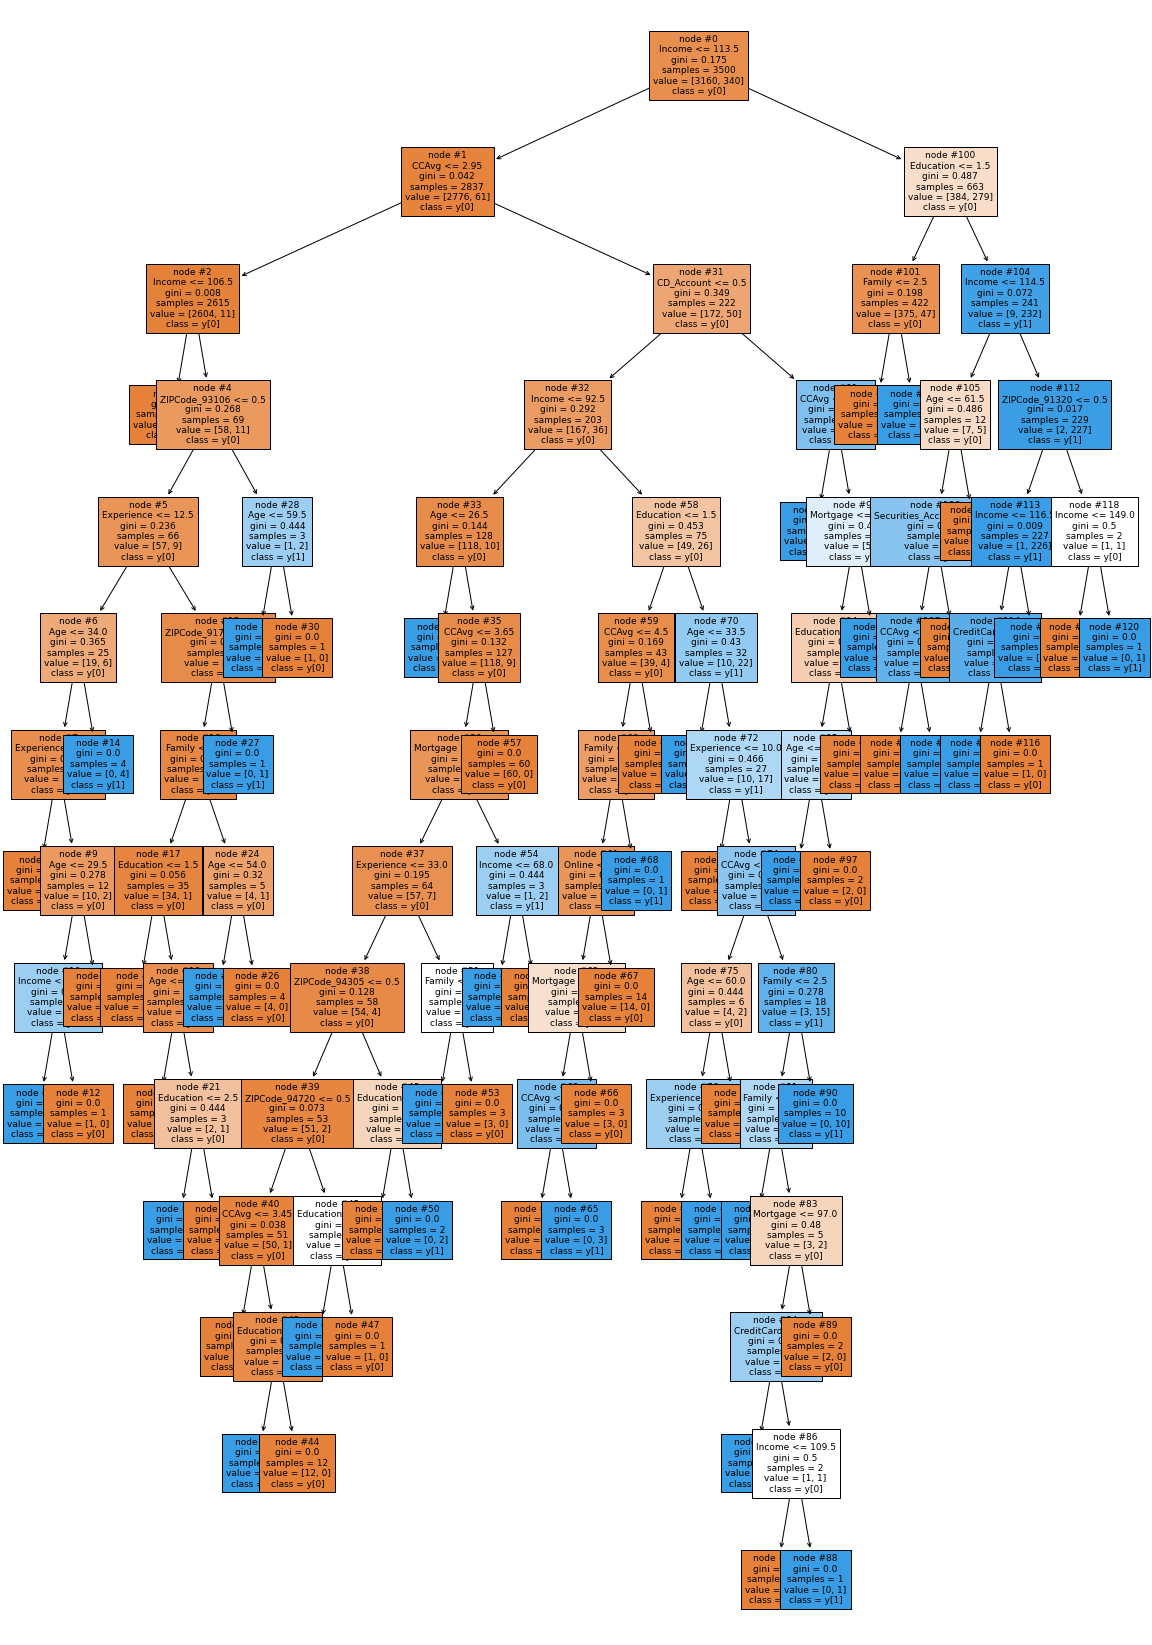

In [135]:
plt.figure(figsize=(20,30))
tree.plot_tree(dtree_default,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

In [136]:
# Text report showing the rules of a decision tree -

print(tree.export_text(dtree_default,feature_names=feature_names,show_weights=True))

|--- Income <= 113.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [2546.00, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- ZIPCode_93106 <= 0.50
|   |   |   |   |--- Experience <= 12.50
|   |   |   |   |   |--- Age <= 34.00
|   |   |   |   |   |   |--- Experience <= 3.50
|   |   |   |   |   |   |   |--- weights: [9.00, 0.00] class: 0
|   |   |   |   |   |   |--- Experience >  3.50
|   |   |   |   |   |   |   |--- Age <= 29.50
|   |   |   |   |   |   |   |   |--- Income <= 112.50
|   |   |   |   |   |   |   |   |   |--- weights: [0.00, 2.00] class: 1
|   |   |   |   |   |   |   |   |--- Income >  112.50
|   |   |   |   |   |   |   |   |   |--- weights: [1.00, 0.00] class: 0
|   |   |   |   |   |   |   |--- Age >  29.50
|   |   |   |   |   |   |   |   |--- weights: [9.00, 0.00] class: 0
|   |   |   |   |   |--- Age >  34.00
|   |   |   |   |   |   |--- weights: [0.00, 4.00] class: 1
|   |   |   |   |--- Experience >  12.50
|   |   |   |  

In [137]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(dtree_default.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                      Imp
Education          0.3964
Income             0.3161
Family             0.1479
CCAvg              0.0477
Age                0.0334
CD_Account         0.0177
Experience         0.0117
Mortgage           0.0106
CreditCard         0.0033
ZIPCode_91711      0.0029
Online             0.0028
ZIPCode_93106      0.0026
ZIPCode_94305      0.0020
Securities_Account 0.0019
ZIPCode_91320      0.0016
ZIPCode_94720      0.0014
ZIPCode_92037      0.0000
ZIPCode_93943      0.0000
ZIPCode_94025      0.0000
ZIPCode_95616      0.0000
ZIPCode_Others     0.0000


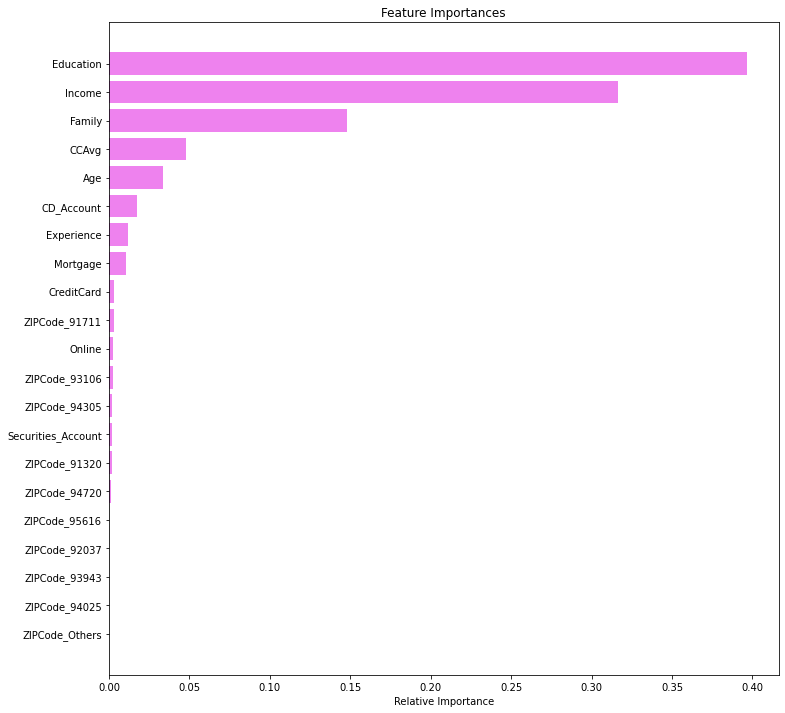

In [138]:
importances = dtree_default.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Default decision tree model will typically be overfitted and definitely most complex. 
Need to find ways to improve the model without sacrificing on the evaluation metrics too much.

## 12b. Decision Tree Model - Performance Evaluation and Improvements

Techniques used to improve the model are -
1. Pre-pruning using max depth and class weights
2. Pre-pruning using hyperparatemer tuning
3. Post-pruning using Cost Complexity Pruning



### Pre-pruning#1 - Decision Tree with various maximum depths

In [139]:
# Check for F1 values by varying the Max Depth of the Decision Tree

for i in np.arange(1,25):
  #dtree_preprun1 = DecisionTreeClassifier(criterion = 'gini',max_depth=i,random_state=1, class_weight='balanced)
  dtree_preprun1 = DecisionTreeClassifier(criterion = 'gini',max_depth=i,random_state=1)
  dtree_preprun1.fit(X_train, y_train)
  print('For ' , i)
  get_f1_score(dtree_preprun1)
  #get_recall_score(dtree_preprun1)

For  1
F1 on TRAIN set :  0.0
F1 on TEST set :  0.0
For  2
F1 on TRAIN set :  0.7986230636833047
F1 on TEST set :  0.7818930041152263
For  3
F1 on TRAIN set :  0.9070866141732283
F1 on TEST set :  0.917910447761194
For  4
F1 on TRAIN set :  0.9144634525660965
F1 on TEST set :  0.9044117647058825
For  5
F1 on TRAIN set :  0.9445277361319341
F1 on TEST set :  0.921985815602837
For  6
F1 on TRAIN set :  0.957037037037037
F1 on TEST set :  0.935251798561151
For  7
F1 on TRAIN set :  0.967359050445104
F1 on TEST set :  0.9314079422382672
For  8
F1 on TRAIN set :  0.9746646795827124
F1 on TEST set :  0.9295774647887323
For  9
F1 on TRAIN set :  0.9852941176470589
F1 on TEST set :  0.9187279151943463
For  10
F1 on TRAIN set :  0.9940828402366864
F1 on TEST set :  0.923076923076923
For  11
F1 on TRAIN set :  0.9985272459499264
F1 on TEST set :  0.9268292682926829
For  12
F1 on TRAIN set :  0.9985272459499264
F1 on TEST set :  0.9198606271777003
For  13
F1 on TRAIN set :  1.0
F1 on TEST set :  

F1 with Max Depth = 6 seems to be the best. Let's check that model.

In [140]:
# Recall with 6 features was the best

#Tried this, but this actually reduced F1
#dtree_preprun1 = DecisionTreeClassifier(criterion = 'gini',max_depth=6,random_state=1,class_weight='balanced')

dtree_preprun1 = DecisionTreeClassifier(criterion = 'gini',max_depth=6,random_state=1)
dtree_preprun1.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, random_state=1)

In [141]:
# Some characteristics of the Pre-pruned model

print('Some characteristics of the Pre-puned model: dtree_preprun1')
print('Number of Features are : ', dtree_preprun1.tree_.max_depth)
print('Max Depth is : ', dtree_preprun1.tree_.max_depth)
print('Node Counts are :', dtree_preprun1.tree_.node_count)
print('Leaf Node Counts are :', dtree_preprun1.tree_.n_leaves)

Some characteristics of the Pre-puned model: dtree_preprun1
Number of Features are :  6
Max Depth is :  6
Node Counts are : 57
Leaf Node Counts are : 29


In [142]:
# Print evaluation metrics from the model

print('Some characteristics of the Pre-puned model: dtree_preprun1')
print('Accuracy :')
get_accuracy_score(dtree_preprun1)
print('*' *50, '\n')

print('Recall :')
get_recall_score(dtree_preprun1)
print('*' *50, '\n')

print('Precision :')
get_precision_score(dtree_preprun1)
print('*' *50, '\n')

print('F1 :')
get_f1_score(dtree_preprun1)
print('*' *50, '\n')

Some characteristics of the Pre-puned model: dtree_preprun1
Accuracy :
Accuracy on TRAIN set: 0.9917142857142857
Accuracy on TEST set: 0.988
************************************************** 

Recall :
Recall on TRAIN set :  0.95
Recall on TEST set :  0.9285714285714286
************************************************** 

Precision :
Precision on TRAIN set :  0.9641791044776119
Precision on TEST set :  0.9420289855072463
************************************************** 

F1 :
F1 on TRAIN set :  0.957037037037037
F1 on TEST set :  0.935251798561151
************************************************** 



In [143]:
# Print metrics for Pre-puned model 

print('Metrics for Pre-puned model: dtree_preprun1')
comparison_frame = pd.DataFrame({'Metric':['Accuracy','Precision','Recall', 'F1'], 
                                 
                                 'TRAIN_Dataset':[dtree_preprun1.score(X_train, y_train), 
                                                  metrics.precision_score(y_train,dtree_preprun1.predict(X_train)), 
                                                  metrics.recall_score(y_train,dtree_preprun1.predict(X_train)),
                                                  metrics.f1_score(y_train,dtree_preprun1.predict(X_train))], 
                                                                  
                                 'TEST_Dataset':[dtree_preprun1.score(X_test, y_test), 
                                                  metrics.precision_score(y_test,dtree_preprun1.predict(X_test)), 
                                                  metrics.recall_score(y_test,dtree_preprun1.predict(X_test)),
                                                  metrics.f1_score(y_test,dtree_preprun1.predict(X_test))]
                                 }) 
comparison_frame

Metrics for Pre-puned model: dtree_preprun1


Metric  TRAIN_Dataset  TEST_Dataset
0   Accuracy         0.9917        0.9880
1  Precision         0.9642        0.9420
2     Recall         0.9500        0.9286
3         F1         0.9570        0.9353

In [144]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(dtree_preprun1.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                      Imp
Education          0.4156
Income             0.3327
Family             0.1467
CCAvg              0.0464
CD_Account         0.0191
Age                0.0172
Experience         0.0096
ZIPCode_91711      0.0031
Mortgage           0.0030
ZIPCode_93106      0.0028
Securities_Account 0.0021
ZIPCode_91320      0.0017
ZIPCode_94025      0.0000
ZIPCode_95616      0.0000
ZIPCode_94720      0.0000
ZIPCode_94305      0.0000
CreditCard         0.0000
ZIPCode_93943      0.0000
ZIPCode_92037      0.0000
Online             0.0000
ZIPCode_Others     0.0000


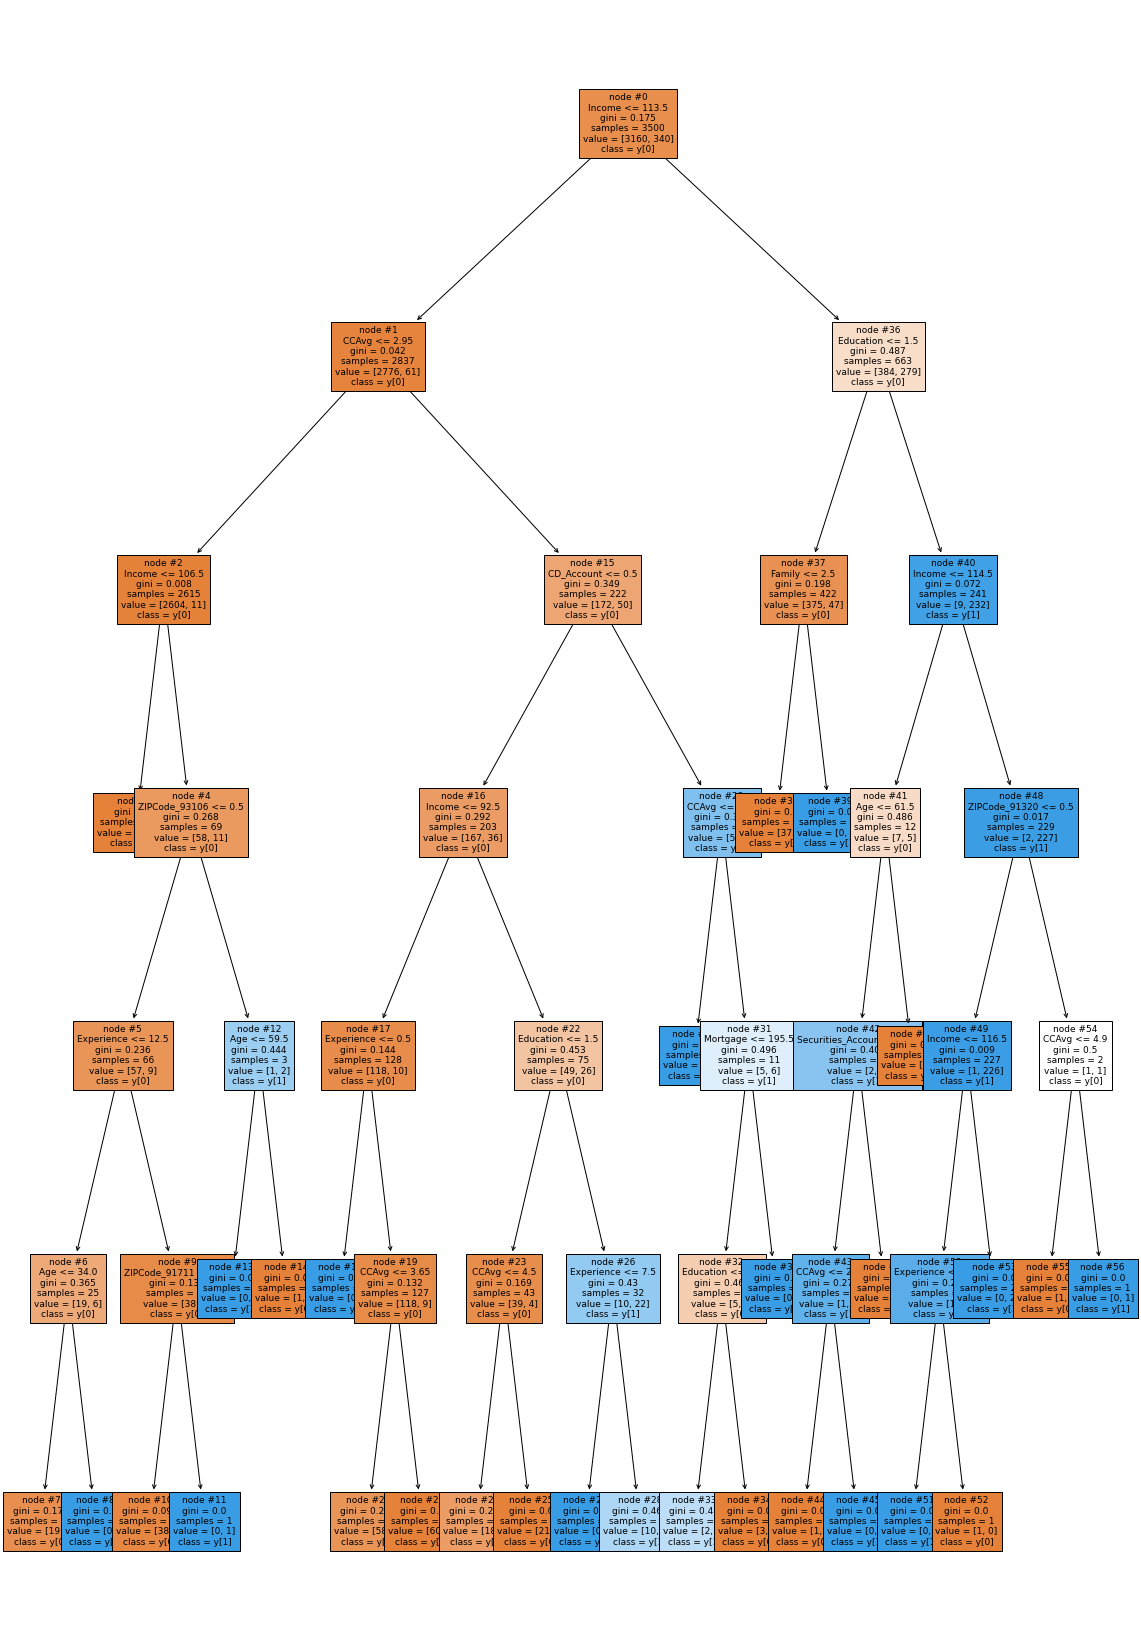

In [145]:
plt.figure(figsize=(20,30))
tree.plot_tree(dtree_preprun1,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

### Pre-pruning#2 - Decision Tree with hyperparameter tuning with GridSearchCV

In [ ]:
# Choose the type of classifier. 
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {'max_depth': [4,5,6,7,8,10,11,12,None],
              'criterion': ['gini','entropy'],
              'splitter': ['best','random'],
              'class_weight': ['balanced', {0:0.1,1:0.9}],
              'min_samples_leaf': [1, 2, 5, 7, 10,15,20],
              'max_leaf_nodes' : [2, 3, 5, 10]
              }

# Type of scoring used to compare parameter combinations
#acc_scorer = metrics.make_scorer(metrics.recall_score)
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer,cv=10)

grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.1, 1: 0.9}, criterion='entropy',
                       max_depth=4, max_leaf_nodes=10, random_state=1)

In [ ]:
# Some characteristics of the Pre-puned model using Hyperparameter tuning

print('Some characteristics of the Pre-puned model using hyper parameter tuning: estimator')
print('Number of Features are : ', estimator.tree_.max_depth)
print('Max Depth is : ', estimator.tree_.max_depth)
print('Node Counts are :', estimator.tree_.node_count)
print('Leaf Node Counts are :', estimator.tree_.n_leaves)

Some characteristics of the Pre-puned model using hyper parameter tuning: estimator
Number of Features are :  4
Max Depth is :  4
Node Counts are : 19
Leaf Node Counts are : 10


In [ ]:
# Print evaluation metrics from the model

print('Metrics for Pre-puned model using hyper parameter tuning: estimator')
print('Accuracy :')
get_accuracy_score(estimator)
print('*' *50, '\n')

print('Recall :')
get_recall_score(estimator)
print('*' *50, '\n')

print('Precision :')
get_precision_score(estimator)
print('*' *50, '\n')

print('F1 :')
get_f1_score(estimator)
print('*' *50, '\n')

Metrics for Pre-puned model using hyper parameter tuning: estimator
Accuracy :
Accuracy on TRAIN set: 0.982
Accuracy on TEST set: 0.9826666666666667
************************************************** 

Recall :
Recall on TRAIN set :  0.9264705882352942
Recall on TEST set :  0.9285714285714286
************************************************** 

Precision :
Precision on TRAIN set :  0.8923512747875354
Precision on TEST set :  0.8904109589041096
************************************************** 

F1 :
F1 on TRAIN set :  0.9090909090909092
F1 on TEST set :  0.9090909090909091
************************************************** 



In [ ]:
# Print metrics for Pre-puned model using hyperparatemer tuning

print('Metrics for Pre-puned model: estimator')
comparison_frame = pd.DataFrame({'Metric':['Accuracy','Precision','Recall', 'F1'], 
                                 
                                 'TRAIN_Dataset':[estimator.score(X_train, y_train), 
                                                  metrics.precision_score(y_train,estimator.predict(X_train)), 
                                                  metrics.recall_score(y_train,estimator.predict(X_train)),
                                                  metrics.f1_score(y_train,estimator.predict(X_train))], 
                                                                  
                                 'TEST_Dataset':[estimator.score(X_test, y_test), 
                                                  metrics.precision_score(y_test,estimator.predict(X_test)), 
                                                  metrics.recall_score(y_test,estimator.predict(X_test)),
                                                  metrics.f1_score(y_test,estimator.predict(X_test))]
                                 }) 
comparison_frame

Metrics for Pre-puned model: estimator


Metric  TRAIN_Dataset  TEST_Dataset
0   Accuracy         0.9820        0.9827
1  Precision         0.8924        0.8904
2     Recall         0.9265        0.9286
3         F1         0.9091        0.9091

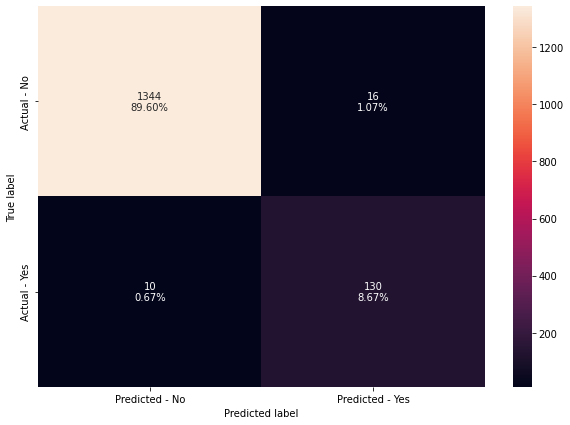

In [ ]:
make_confusion_matrix(estimator,y_test)

In [ ]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(estimator.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                      Imp
Income             0.6390
Education          0.1201
Family             0.1201
CCAvg              0.1134
CD_Account         0.0074
Age                0.0000
ZIPCode_92037      0.0000
ZIPCode_95616      0.0000
ZIPCode_94720      0.0000
ZIPCode_94305      0.0000
ZIPCode_94025      0.0000
ZIPCode_93943      0.0000
ZIPCode_93106      0.0000
CreditCard         0.0000
ZIPCode_91711      0.0000
ZIPCode_91320      0.0000
Experience         0.0000
Online             0.0000
Securities_Account 0.0000
Mortgage           0.0000
ZIPCode_Others     0.0000


### Post-pruning#1 - Decision Tree with post pruning

In [ ]:
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [ ]:
pd.DataFrame(path)

ccp_alphas  impurities
0       0.0000      0.0000
1       0.0002      0.0006
2       0.0002      0.0009
3       0.0003      0.0015
4       0.0003      0.0026
5       0.0003      0.0037
6       0.0003      0.0040
7       0.0003      0.0050
8       0.0004      0.0058
9       0.0004      0.0062
10      0.0004      0.0065
11      0.0004      0.0073
12      0.0004      0.0081
13      0.0004      0.0102
14      0.0005      0.0107
15      0.0005      0.0117
16      0.0005      0.0133
17      0.0005      0.0138
18      0.0006      0.0166
19      0.0006      0.0183
20      0.0008      0.0206
21      0.0009      0.0215
22      0.0010      0.0224
23      0.0022      0.0246
24      0.0028      0.0302
25      0.0031      0.0333
26      0.0057      0.0391
27      0.0239      0.0629
28      0.0562      0.1754

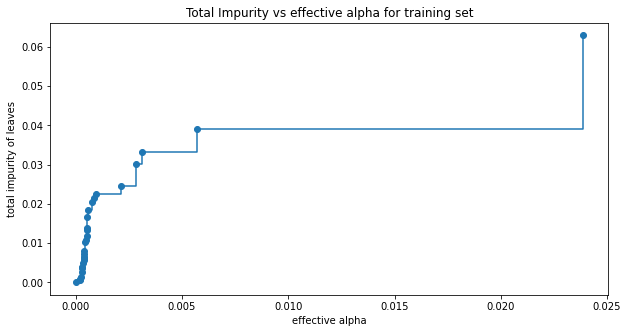

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.05624392059143621


For the remainder, we remove the last element in
``clfs`` and ``ccp_alphas``, because it is the trivial tree with only one
node. Here we show that the number of nodes and tree depth decreases as alpha
increases.

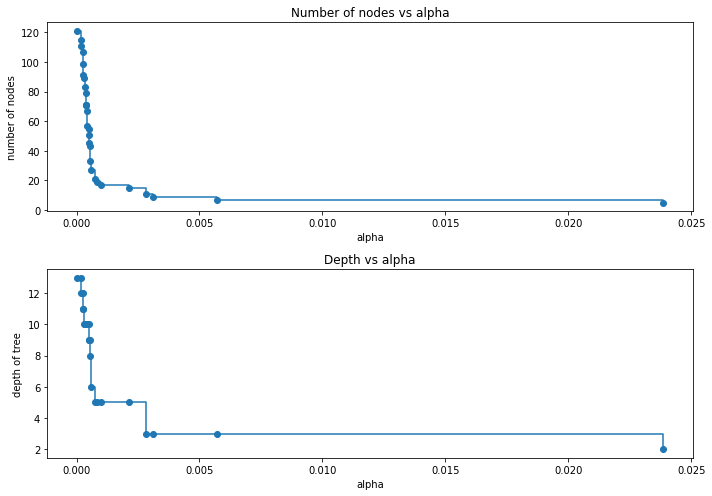

In [ ]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1,figsize=(10,7))
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [ ]:
recall_train=[]
for clf in clfs:
    pred_train3=clf.predict(X_train)
    values_train=metrics.recall_score(y_train,pred_train3)
    recall_train.append(values_train)

In [ ]:
f1_train=[]
for clf in clfs:
    pred_train3=clf.predict(X_train)
    values_train=metrics.f1_score(y_train,pred_train3)
    f1_train.append(values_train)

In [ ]:
recall_test=[]
for clf in clfs:
    pred_test3=clf.predict(X_test)
    values_test=metrics.recall_score(y_test,pred_test3)
    recall_test.append(values_test)

In [ ]:
f1_test=[]
for clf in clfs:
    pred_test3=clf.predict(X_test)
    values_test=metrics.f1_score(y_test,pred_test3)
    f1_test.append(values_test)

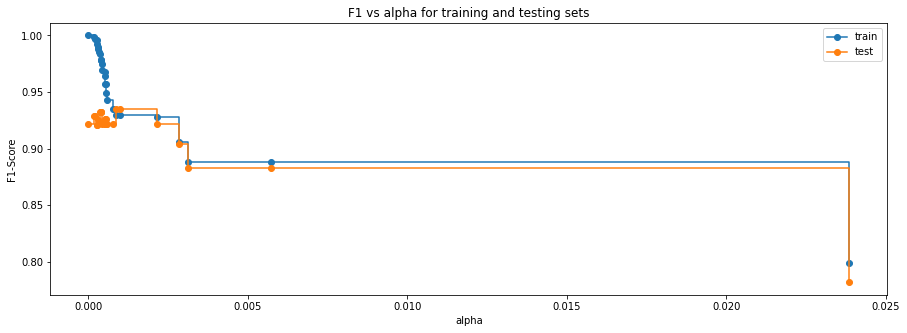

In [ ]:
fig, ax = plt.subplots(figsize=(15,5))
ax.set_xlabel("alpha")
ax.set_ylabel("F1-Score")
ax.set_title("F1 vs alpha for training and testing sets")
ax.plot(ccp_alphas, f1_train, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, f1_test, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [ ]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(f1_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.0008503401360544218, random_state=1)


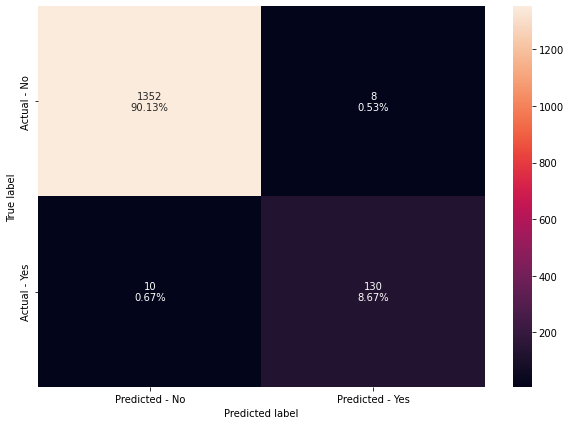

In [ ]:
make_confusion_matrix(best_model,y_test)

In [ ]:
# Some characteristics of the post-pruned model

print('Some characteristics of the Post-pruned model: best_model')
print('Number of Features are : ', best_model.tree_.max_depth)
print('Max Depth is : ', best_model.tree_.max_depth)
print('Node Counts are :', best_model.tree_.node_count)
print('Leaf Node Counts are :', best_model.tree_.n_leaves)

Some characteristics of the Post-pruned model: best_model
Number of Features are :  5
Max Depth is :  5
Node Counts are : 19
Leaf Node Counts are : 10


In [ ]:
# Print evaluation metrics from the model

print('Metrics for Post-pruned: best_model')
print('Accuracy :')
get_accuracy_score(best_model)
print('*' *50, '\n')

print('Recall :')
get_recall_score(best_model)
print('*' *50, '\n')

print('Precision :')
get_precision_score(best_model)
print('*' *50, '\n')

print('F1 :')
get_f1_score(best_model)
print('*' *50, '\n')

Metrics for Post-pruned: best_model
Accuracy :
Accuracy on TRAIN set: 0.9865714285714285
Accuracy on TEST set: 0.988
************************************************** 

Recall :
Recall on TRAIN set :  0.9117647058823529
Recall on TEST set :  0.9285714285714286
************************************************** 

Precision :
Precision on TRAIN set :  0.9480122324159022
Precision on TEST set :  0.9420289855072463
************************************************** 

F1 :
F1 on TRAIN set :  0.929535232383808
F1 on TEST set :  0.935251798561151
************************************************** 



In [ ]:
# Print metrics for Post-pruned 

print('Metrics for Post-pruned model: best_model')
comparison_frame = pd.DataFrame({'Metric':['Accuracy','Precision','Recall', 'F1'], 
                                 
                                 'TRAIN_Dataset':[best_model.score(X_train, y_train), 
                                                  metrics.precision_score(y_train,best_model.predict(X_train)), 
                                                  metrics.recall_score(y_train,best_model.predict(X_train)),
                                                  metrics.f1_score(y_train,best_model.predict(X_train))], 
                                                                  
                                 'TEST_Dataset':[best_model.score(X_test, y_test), 
                                                  metrics.precision_score(y_test,best_model.predict(X_test)), 
                                                  metrics.recall_score(y_test,best_model.predict(X_test)),
                                                  metrics.f1_score(y_test,best_model.predict(X_test))]
                                 }) 
comparison_frame

Metrics for Post-pruned model: best_model


Metric  TRAIN_Dataset  TEST_Dataset
0   Accuracy         0.9866        0.9880
1  Precision         0.9480        0.9420
2     Recall         0.9118        0.9286
3         F1         0.9295        0.9353

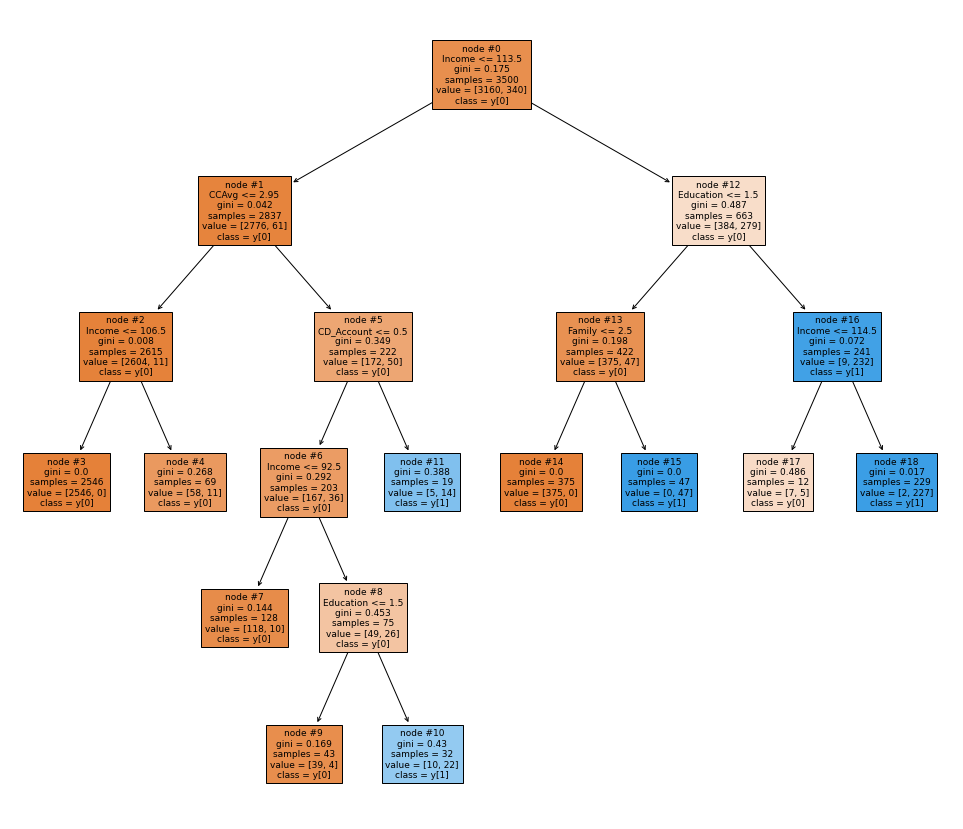

In [ ]:
plt.figure(figsize=(17,15))

tree.plot_tree(best_model,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

In [ ]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(best_model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                      Imp
Education          0.4367
Income             0.3510
Family             0.1550
CCAvg              0.0371
CD_Account         0.0202
Age                0.0000
ZIPCode_92037      0.0000
ZIPCode_95616      0.0000
ZIPCode_94720      0.0000
ZIPCode_94305      0.0000
ZIPCode_94025      0.0000
ZIPCode_93943      0.0000
ZIPCode_93106      0.0000
CreditCard         0.0000
ZIPCode_91711      0.0000
ZIPCode_91320      0.0000
Experience         0.0000
Online             0.0000
Securities_Account 0.0000
Mortgage           0.0000
ZIPCode_Others     0.0000


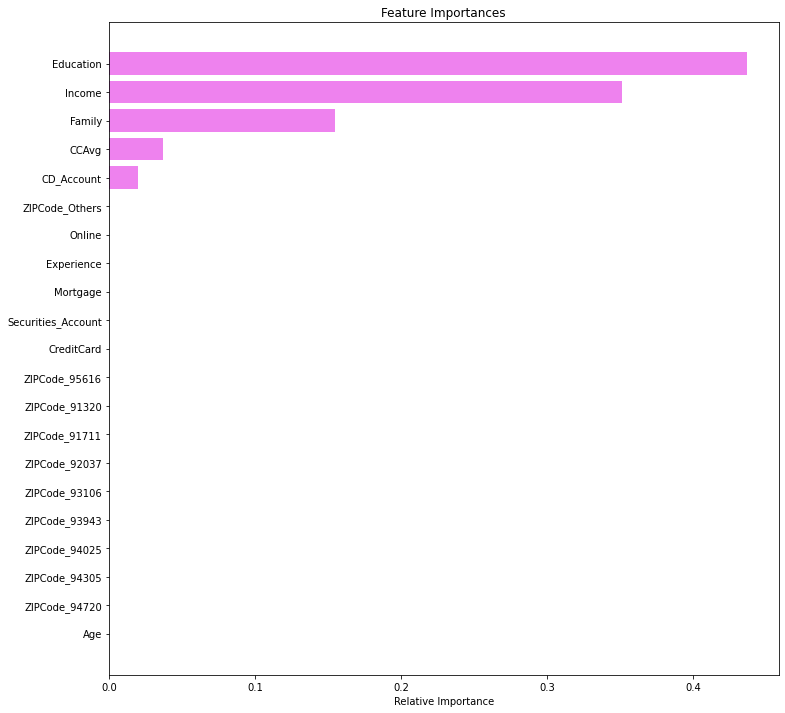

In [ ]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## 12c. Compare and Choose Best Decision Tree Model

In [ ]:
# Compare models - default, with max depth, pre-pruned using Gridsearch and Post-pruned

print('Metrics Comparison for Decision Trees')
comparison_frame = pd.DataFrame({'Decision Tree': ['Default', 'Pre-pruned with Max Depth', 'Pre-pruned with hyperparameter tuning', 'Post-pruned with CCP'],
                                 
                                 'TRAIN_Recall':[metrics.recall_score(y_train,dtree_default.predict(X_train)),
                                                 metrics.recall_score(y_train,dtree_preprun1.predict(X_train)),
                                                metrics.recall_score(y_train,estimator.predict(X_train)),
                                                 metrics.recall_score(y_train,best_model.predict(X_train))],
                                                 
                                  'TRAIN_F1' : [metrics.f1_score(y_train,dtree_default.predict(X_train)),
                                               metrics.f1_score(y_train,dtree_preprun1.predict(X_train)), 
                                               metrics.f1_score(y_train,estimator.predict(X_train)),
                                               metrics.f1_score(y_train,best_model.predict(X_train))],
                                                                  
                                 'TEST_Recall':[metrics.recall_score(y_test,dtree_default.predict(X_test)),
                                                metrics.recall_score(y_test,dtree_preprun1.predict(X_test)),
                                                metrics.recall_score(y_test,estimator.predict(X_test)),
                                                metrics.recall_score(y_test,best_model.predict(X_test))],
                                 
                                 'TEST_F1' : [ metrics.f1_score(y_test,dtree_default.predict(X_test)),
                                              metrics.f1_score(y_test,dtree_preprun1.predict(X_test)),                  
                                              metrics.f1_score(y_test,estimator.predict(X_test)),
                                              metrics.f1_score(y_test,best_model.predict(X_test))]
                                 
                    })

comparison_frame

Metrics Comparison for Decision Trees


Decision Tree  TRAIN_Recall  TRAIN_F1  TEST_Recall  \
0                                Default        1.0000    1.0000       0.9286   
1              Pre-pruned with Max Depth        0.9500    0.9570       0.9286   
2  Pre-pruned with hyperparameter tuning        0.9265    0.9091       0.9286   
3                   Post-pruned with CCP        0.9118    0.9295       0.9286   

   TEST_F1  
0   0.9220  
1   0.9353  
2   0.9091  
3   0.9353

Based on the above comparison, Decision Tree pre-pruned with Max Depth parameter performs best on F1 on TEST data. Corresponding Recall score is good as well. Model is not overfitting and is generalized.

# 13. Compare Logistic Regression and Decision Tree Models

Based on the best modela derived via Logistic Regression and Decision Tree, Decision Tree model as mentioned in section ??? is the best suited.

Best Logistic Regression Model (With threshold value of 0.38) - As per section 11c
        
        TRAIN F1-Score = 0.7455
        
        TEST F1-Score = 0.7399
        


Best Decision Tree Model (Pre-pruned with Max Depth=6) - As per section 12c

        TRAIN F1-Score = 0.9570
        
        TEST F1-Score = 0.9353

        

Decision Tree model is chosen.

Below is the model once again - 

In [ ]:
plt.figure(figsize=(40,30))
tree.plot_tree(dtree_preprun1,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

In [ ]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(dtree_preprun1.feature_importances_, columns = ["Importance"], index = X_train.columns).sort_values(by = 'Importance', ascending = False))

# 14. <b><font color="blue"> Description of the Recommended Model</b>

## 14a. Description of the Recommended Model

1. The task was to come up with a Machine Learning Model to predict features that will help identify potential customers who might avail personal loan from the Bank.

2. Terminology
    * Root Node (Node#0): Root node is from where the decision tree starts. It represents the entire dataset, which further gets divided into two or more homogeneous sets.

    * Leaf Node: Leaf nodes are the final output node, and the tree cannot be segregated further after getting a leaf node.

    * Splitting: Splitting is the process of dividing the decision node/root node into sub-nodes according to the given conditions. Arrow on left side is when the condition mentioned in the node is false. Arrow on the right side is when the condition is true.

    * Branch/Sub Tree: A tree formed by splitting the tree.

    * Pruning: Pruning is the process of removing the unwanted branches from the tree.

    * Gini Index - Its a measure of impurity or purity used while creating a decision tree in the CART(Classification and Regression Tree) algorithm. Minimum value can be 0 (most pure), maximum value can be 0.5 (most impure). Lower the value, better the composition of a node.

    * Details in each node
        node# - Sequential number of the node
        gini -Gini Index value for the node
        samples - Number of records in the node
        value - Number of Class 0 and 1 values
        class - Class with most values
    
    *Color coding of Nodes - 
        Orange - Node 0 has majority of the records (3160) in Class 0. Nodes with all shades of orange will have majority of class 0 samples. Darker the color, more pure the node will be, lower gini.
        Blue - Nodes with shaded of blue will have majority of class 1 samples. Darker the color, more pure the node will be, lower gini.

3. Feature that are important are - 

                                Importance
          Education               0.4156
          Income                  0.3327
          Family                  0.1467
          CCAvg                   0.0464
          CD_Account              0.0191
          Age                     0.0172
          Experience              0.0096
          ZIPCode_91711           0.0031
          Mortgage                0.0030
          ZIPCode_93106           0.0028
          Securities_Account      0.0021
          ZIPCode_91320           0.0017

4. Features that do NOT have influence (Zero importance value) - 

          ZIPCode_94025           0.0000
          ZIPCode_95616           0.0000
          ZIPCode_94720           0.0000
          ZIPCode_94305           0.0000
          CreditCard              0.0000
          ZIPCode_93943           0.0000
          ZIPCode_92037           0.0000
          Online                  0.0000
          ZIPCode_Others          0.0000
    
                
                

# 15. <b><font color="blue">Actionable Insights & Recommendations</b>

## 15a. Actionable Insights & Recommendations


<b><font color ="green">1. Customers spending sizably on credit cards but use other bank's credit card  are potential customers for the bank. Bank should market credit card in a better way to these customers.

<b><font color ="green">2. Of those who availed the loan, significant number of people do NOT use internet banking. Even overall, there is significant number of people not using Online banking. Probably, bank should promote Online banking more and / or investigate why people do not prefer online banking. May be some potential improvements needed to the customer's online experience. 

<b><font color ="green">3. Target customer group#1 - Customers having more than $116500 Income and Education level of Graduate or Advanced / Professional

<b><font color ="green">4. Target customer group#2 - Customers having more than $113500 Income and Education level of Undergrad and Family size of 3 or 4

<b><font color ="green">5. Target customer group#3 - Generally, Undergrads are the potential customers. Income levels are more, but yet untapped. Most of the loan custmers seem to be graduates or advanced.

#16. <b><font color="blue">Retrain the model with specific features

This is the final model with features that have influence on the dependent feature.

In [ ]:
# Create new dataframes just with required features

X_train_final = X_train.loc[:, ['Education', 'Income', 'Family','CCAvg','CD_Account','Age','Experience', 'ZIPCode_91711','Mortgage', 'ZIPCode_93106','Securities_Account','ZIPCode_91320']]
X_test_final = X_test.loc[:, ['Education', 'Income', 'Family','CCAvg','CD_Account','Age','Experience', 'ZIPCode_91711','Mortgage', 'ZIPCode_93106','Securities_Account','ZIPCode_91320']]

In [ ]:
# Check the dataframe

X_train_final.info()

In [ ]:
#Retrain the Decision Tree model

dtree_preprun1_final = DecisionTreeClassifier(criterion = 'gini',max_depth=6,random_state=1)
dtree_preprun1_final.fit(X_train_final, y_train)

In [ ]:
# Print metrics for Final model 

print('Metrics for final model')
comparison_frame = pd.DataFrame({'Metric':['Accuracy','Precision','Recall', 'F1'], 
                                 
                                 'TRAIN_Dataset':[dtree_preprun1_final.score(X_train_final, y_train), 
                                                  metrics.precision_score(y_train,dtree_preprun1_final.predict(X_train_final)), 
                                                  metrics.recall_score(y_train,dtree_preprun1_final.predict(X_train_final)),
                                                  metrics.f1_score(y_train,dtree_preprun1_final.predict(X_train_final))], 
                                                                  
                                 'TEST_Dataset':[dtree_preprun1_final.score(X_test_final, y_test), 
                                                  metrics.precision_score(y_test,dtree_preprun1_final.predict(X_test_final)), 
                                                  metrics.recall_score(y_test,dtree_preprun1_final.predict(X_test_final)),
                                                  metrics.f1_score(y_test,dtree_preprun1_final.predict(X_test_final))]
                                 }) 
comparison_frame

In [ ]:
# Print the final Decision Tree

plt.figure(figsize=(40,30))
tree.plot_tree(dtree_preprun1_final,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

In [ ]:
# Print final list of feature importances

print (pd.DataFrame(dtree_preprun1_final.feature_importances_, columns = ["Importance"], index = X_train_final.columns).sort_values(by = 'Importance', ascending = False))

In [ ]:
dtree_preprun1_final.get_depth()

## Steps to store the model on disk using PICKLE

In [ ]:
import os
os.curdir

In [ ]:
filename='/content/drive/My Drive/AI-ML/Module3_Classification/PROJECT-3/Project3_Model.pickle'

In [ ]:
import pickle

pickle.dump(dtree_preprun1_final, open(filename,'wb'))

## Use stored model from disk using PICKLE

In [ ]:
Loaded_Pickle_Model = pickle.load(open('/content/drive/My Drive/AI-ML/Module3_Classification/PROJECT-3/Project3_Model.pickle','rb'))

In [ ]:
metrics.f1_score(y_test,Loaded_Pickle_Model.predict(X_test_final))

## Steps to store the model on disk using JOBLIB

In [ ]:
!pip install mlxtend


In [ ]:
import joblib
import sys
sys.modules['sklearn.externals.joblib'] = joblib

In [ ]:
filename_joblib='/content/drive/My Drive/AI-ML/Module3_Classification/PROJECT-3/Project3_Model.joblib'

In [ ]:
joblib.dump(dtree_preprun1_final,filename_joblib)

In [ ]:
Loaded_Joblib_Model = joblib.load('/content/drive/My Drive/AI-ML/Module3_Classification/PROJECT-3/Project3_Model.joblib')

In [ ]:
metrics.f1_score(y_test,Loaded_Joblib_Model.predict(X_test_final))